# Binary classification between benign and malignant tumors

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
import biutils

## README / Utils 

Helper functions are defined in biutils.py

Restart the kernel for this notebook to reload any update made to the utils file (after you have saved and run the new changes to the util py file).

```python
- def update_tbl(new_df,tbl_name,drop=False):     
    """
    Save data to the quant.db database
        new_df: data
        tbl_name: data table name
        drop: set to True to drop existing table and update 
    """
    
- tbl = def get_tbl(tbl_name):
    """
    Retrieve data from the quant.db database
        tbl_name: data table name
    """

- def all_tbl():
    """
    Print out all existing table in the quant.db databse
    """
```

In [3]:
biutils.all_tbl()

('data',)
('no_out3',)
('binary',)
('bizdata',)
('zdata',)
('h_combine',)
('no_out',)
('bino_out',)


Retrieve all datasets: 

In [601]:
binary = biutils.get_tbl('binary')
no_out = biutils.get_tbl('bino_out')
zdata = biutils.get_tbl("bizdata")

The list of quantitated metabolites, metrics, etc
Rename the columns

In [198]:
mcolumns = list(binary.columns)
mcolumns.remove('voxel')
mcolumns.remove('label')
mcolumns.remove('dataset')
metlist = list(set([i.split(" ")[0] for i in mcolumns]))
len(metlist)
metrics = ['FAT14ratio','ratioWAT47_1d','ratioFAT14_1d','ratioFAT54_1d']
oned = ['nws_ffrac','nws_wfrac','nws_wfratio']
evars = ['methylenefat(FAT21) ratioFAT54_1d',
 'methylfat(FMETD10) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'methylenefat(FAT23) FAT14ratio',
 'triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'fat(2p06_1p32) FAT14ratio',
 'fat(4p2_3p9) FAT14ratio',
 'adc']

intervars =['triglycerylfatcrossp(TGFRupper) FAT14ratio', 
'methylfat(FMETD10) FAT14ratio', 
'olefinicfat(UFD54) FAT14ratio', 
'fat(4p2_3p9) FAT14ratio', 
'methylenefat(FAT21) FAT14ratio', 
'fat(2p06_1p32) ratioWAT47_1d', 
'adc', 'gly+myo FAT14ratio', 
'fat(1p32_0p9) FAT14ratio']

intername = ['TGFRupper/FAT14','FMETD/FAT14','UFD54/FAT14','CP8/FAT14',
'FAT21/FAT14','CP4/FAT14','ADC','mI+Gly/FAT14','CP2/FAT14']


evarsname = ['FAT21/FAT54_1d',
 'FMETD/FAT14',
 'FAT21/FAT14',
 'FAT23/FAT14',
 'TGFRupper/FAT14',
 'CP2/FAT14',
 'CP6/FAT14',
 'CP8/FAT14',
 'ADC']

finalvars =['gly+myo FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'fat(1p32_0p9) ratioWAT47_1d',
 'methylenefat(FAT23) FAT14ratio',
 'adc']
newname = ['mI+Gly/FAT14','CP2/FAT14','UFD54/FAT14','FMETD/FAT14','CP2/WAT_1d','FAT23/FAT14','ADC']
renamed = no_out[intervars+['voxel','dataset','label']]
renamed = renamed.rename(columns=dict(zip(intervars,intername)))


## Prelimary analysis

Class distributions
```python
maglinantd, benignd, healthyd = def data_const(data):
    '''
    Visualize the distributions of benign, healthy, and maglinant labels in all voxels & datasets
    Input: data (with labels)
    Output: the list of maglinant dataset, the list of benign dataset, the list of healthy dataset
    '''
```

number of malignant voxels:
241
number of benign voxels:
195


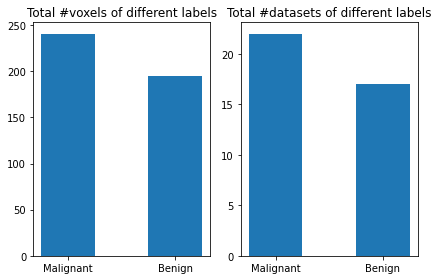

In [603]:
maglinantd, benignd = data_const(no_out)

In [461]:
#print lists of databases
print("matlinang datasets: "+str(len(maglinantd)))
print(maglinantd)
print("benign datasets: "+str(len(benignd)))
print(benignd)

matlinang datasets: 22
['dataAH', 'dataAM', 'dataAST', 'dataCJ', 'dataEC', 'dataEP', 'dataFS', 'dataGA', 'dataGS', 'dataHB', 'dataJH', 'dataKL', 'dataKM', 'dataLA', 'dataLK', 'dataLM', 'dataLN', 'dataLO', 'dataLW', 'dataMLT', 'dataSM', 'dataStB']
benign datasets: 17
['data005', 'data009', 'data012', 'data014', 'data015', 'data016', 'data018', 'data019', 'data022', 'data028', 'data032', 'data040', 'data044', 'dataBJF', 'dataDM', 'dataFN', 'dataMM']


Average age 

In [462]:
agepath = "/Users/linlin/Downloads/199data/Breast_recon_details_maybe_useful.xlsx"
additional = pd.read_excel(agepath,sheet_name='Sheet4',index_col=False,names=["ds","ADC","age"],header=None)
additional['ds'] = additional['ds'].apply(lambda x:"data"+x.split("-")[2])
age_dict = dict(zip(list(additional["ds"]),list(additional["age"])))
adc_dict = dict(zip(list(additional["ds"]),list(additional["ADC"])))

In [466]:
print("average ages")
mage = []
bage = []
for d in maglinantd:
    mage.append(age_dict.get(d))
for d in benignd:
    bage.append(age_dict.get(d))
print('malignant: '+str(np.mean(mage)))
print('benign: '+str(np.mean(bage)))

average ages
malignant: 52.72727272727273
benign: 37.8235294117647


### Distributions of metabolite ratios

Boxplot: 
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range  

Using nested boxplot to show metabolite concentrations among different groups

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def new_met_dist(df, met):
    """
    New version with the combined metabolite ratio, for one metabolite
    """
    # Using nested boxplot to show metabolite concentrations among different groups 
    r, c = divmod(len(met), 3)
    fig, ax = plt.subplots(r, 3, sharex=True, figsize=(15, 15))
    for i in range(len(met)):
        r, c = divmod(i, 3)
        sns.boxplot(
            y=met[i],
            x="label",
            hue="label",
            data=df,
            ax=ax[r, c],
            orient='v',
            whis=2
        )
        ax[r, c].get_legend().remove()
        ax[r, c].set_xlabel(met[i], fontsize=20)  # Set x-axis label font size
        ax[r, c].set_ylabel('z-score', fontsize=20)  # Set y-axis label font size
    fig.suptitle('Feature Statistics\n', fontsize=20)  # Set subtitle font size
    plt.tight_layout()


## Normalize based on label and remove outliers

In [ ]:
for var in mcolumns:
    zdata.loc[zdata.label == 'malignant',var] = binary.loc[binary.label == 'malignant',var].apply(lambda x: (x - binary.loc[binary.label == 'malignant',var].mean()) / binary.loc[binary.label == 'malignant',var].std())
    zdata.loc[zdata.label == 'benign',var] = binary.loc[binary.label == 'benign',var].apply(lambda x: (x - binary.loc[binary.label == 'benign',var].mean()) / binary.loc[binary.label == 'benign',var].std())

In [475]:
rez = renamed
for var in evarsname:
    rez.loc[rez.label == 'malignant',var] = renamed.loc[renamed.label == 'malignant',var].apply(lambda x: (x - renamed.loc[renamed.label == 'malignant',var].mean()) / renamed.loc[renamed.label == 'malignant',var].std())
    rez.loc[rez.label == 'benign',var] = renamed.loc[renamed.label == 'benign',var].apply(lambda x: (x - renamed.loc[renamed.label == 'benign',var].mean()) / renamed.loc[renamed.label == 'benign',var].std())

In [192]:
re_dict = dict(zip(intervars,intername))
re_dict

{'triglycerylfatcrossp(TGFRupper) FAT14ratio': 'TGFRupper/FAT14',
 'methylfat(FMETD10) FAT14ratio': 'FMETD/FAT14',
 'olefinicfat(UFD54) FAT14ratio': 'UFD54/FAT14',
 'fat(4p2_3p9) FAT14ratio': 'CP8/FAT14',
 'methylenefat(FAT21) FAT14ratio': 'FAT21/FAT14',
 'fat(2p06_1p32) ratioWAT47_1d': 'CP4/FAT14',
 'adc': 'ADC',
 'gly+myo FAT14ratio': 'mI+Gly/FAT14',
 'fat(1p32_0p9) FAT14ratio': 'CP2/FAT14'}

In [199]:
features = renamed.drop(['label','dataset','voxel'], axis=1)
labels = renamed['label']

In [200]:
rez = renamed
for var in intername:
    rez.loc[rez.label == 'malignant',var] = renamed.loc[renamed.label == 'malignant',var].apply(lambda x: (x - renamed.loc[renamed.label == 'malignant',var].mean()) / renamed.loc[renamed.label == 'malignant',var].std())
    rez.loc[rez.label == 'benign',var] = renamed.loc[renamed.label == 'benign',var].apply(lambda x: (x - renamed.loc[renamed.label == 'benign',var].mean()) / renamed.loc[renamed.label == 'benign',var].std())

<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
<ipython-input-699-ba19d323904b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=30

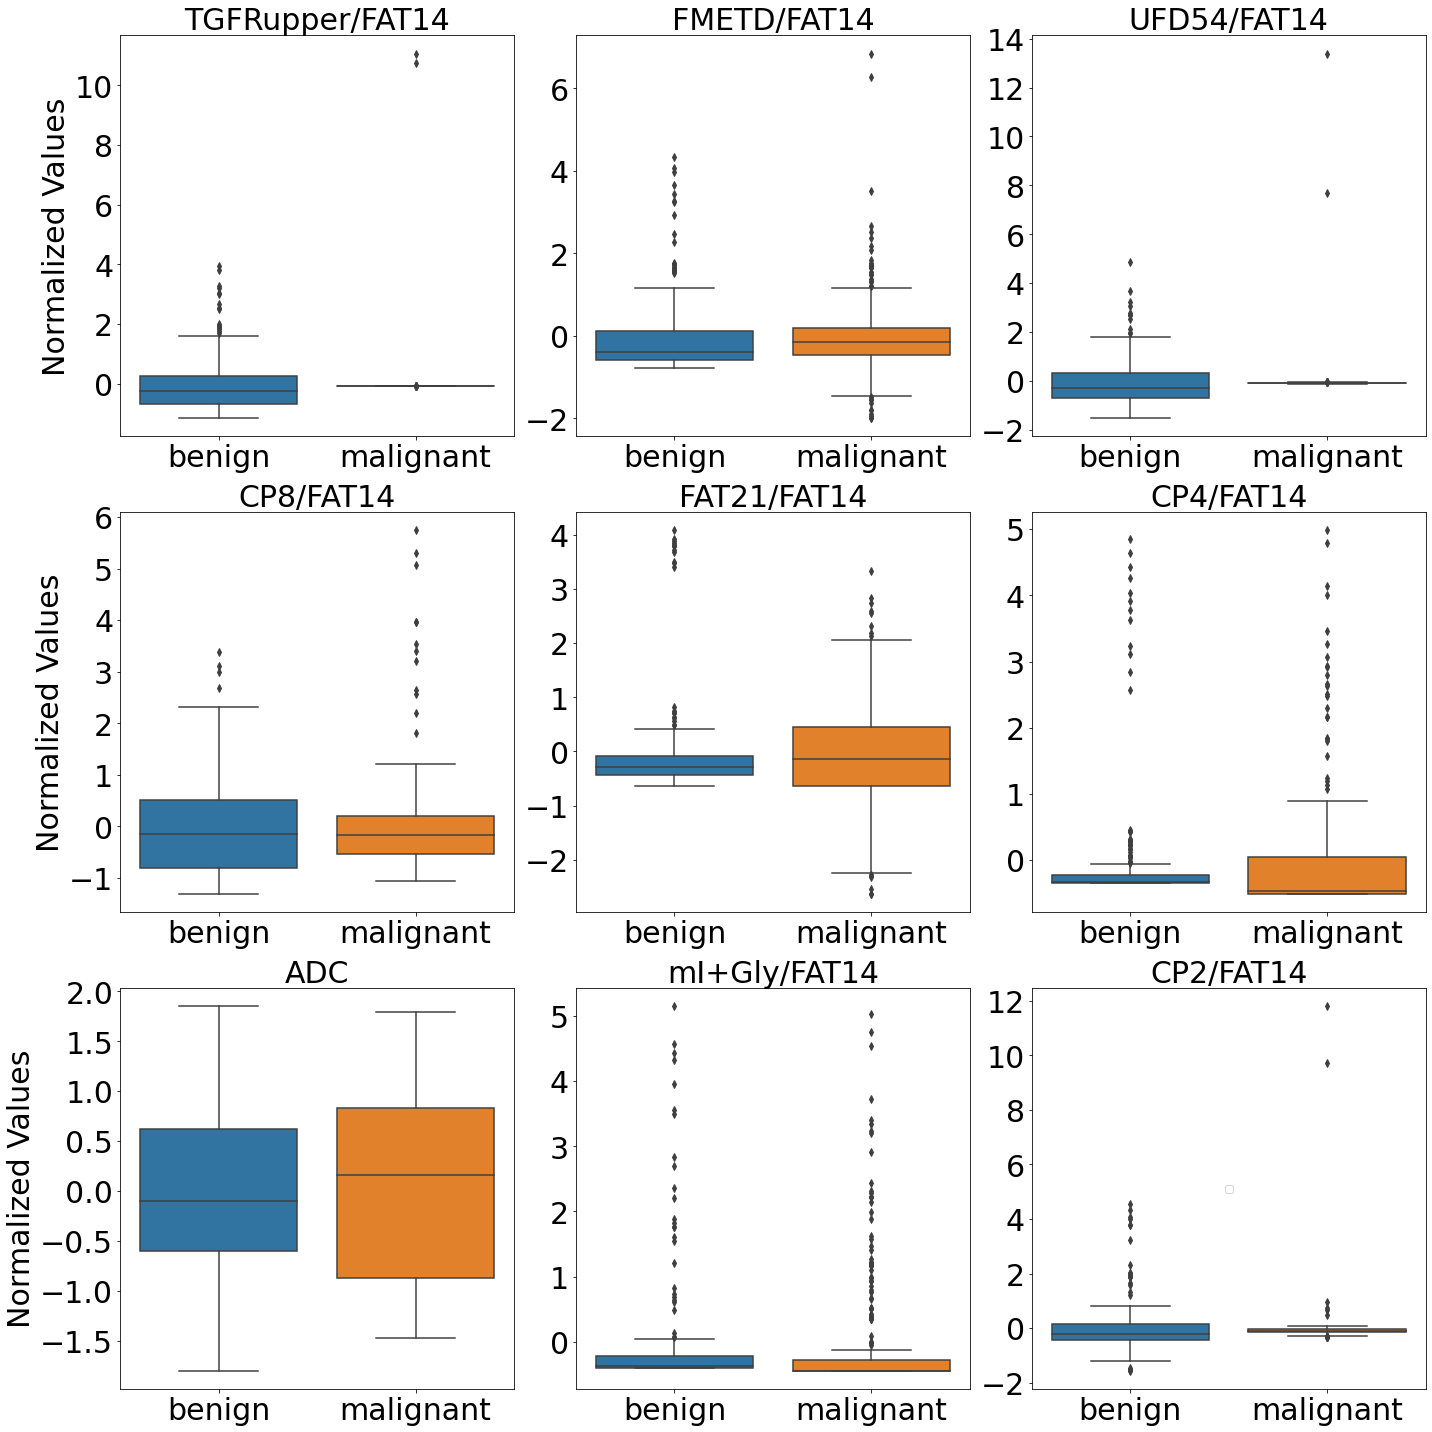

In [699]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

# Iterate over each feature and create boxplots
for i, column in enumerate(intername):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=renamed.label.values, y=rez[column], ax=ax)
    ax.set_xlabel('',fontsize=30)
    ax.set_ylabel('',fontsize=30)
    ax.set_title(column,fontsize=30)
    ax.tick_params(axis='x', labelsize=30)  # Set the desired tick size for x-axis
    #ax.tick_params(axis='y', labelsize=15) 
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=30)
    

axes[0,0].set_ylabel('Normalized Values')
axes[1,0].set_ylabel('Normalized Values')
axes[2,0].set_ylabel('Normalized Values')
# Remove the last empty subplot
#fig.delaxes(axes[1, 3])

# Place the legend in the last subplot
ax_legend = axes[2, 2]
handles, labels = ax_legend.get_legend_handles_labels()
ax_legend.legend(handles, labels, loc='center', ncol=3)

plt.tight_layout()
plt.show()


In [215]:
#source of outliers
outsrc = list(zdata[abs((zdata.loc[:,mcolumns])>8).any(axis=1)].voxel.values)
no_out = binary[~binary.voxel.isin(outsrc)]
#biutils.update_tbl(no_out,'bino_out',drop=True)

In [216]:
outsrc

['data028-17-15-9',
 'data028-17-16-9',
 'dataEP-12-17-10',
 'dataEP-13-17-9',
 'dataGS-11-21-10',
 'dataGS-11-21-11',
 'dataTN-24-28-10',
 'dataTN-26-29-10']

number of malignant voxels:
241
number of benign voxels:
195


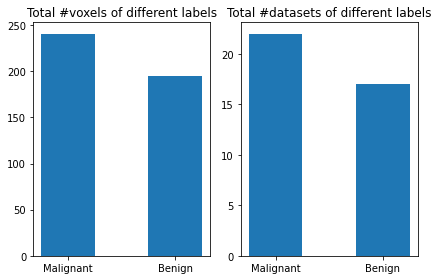

In [487]:
#outlier removed, class distributions
maglinantd, benignd = biutils.data_const(no_out)

## Statistical tests

### Assumption checks  
Check for equal variances using leneve's test

#### Homegeneity of variance assumptions   
If the data is normally didstributed, we could perform Bartlett's Test for homogeneity of variances.  
However, in this case, this condition does not hold strictly, so we use Levene's Test instead.   ( Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.)
```python
def group_lenv(dat,metric,metlist):
    """
    perform leneve tests among different label groups 
    with given data, metric, and metabolite lists
    """
```


In [88]:
lenv = biutils.group_lenv(no_out,mcolumns)

## two-sided t-tests between maglinant and benign corrected for unequal variances
https://pingouin-stats.org/build/html/generated/pingouin.mwu.html 

In [492]:
tt = pd.DataFrame()
for i in range(len(mcolumns)):
    var = mcolumns[i]
    ev = lenv.equal_var[i]
    bn = no_out.loc[no_out['label']=='benign',var]
    ml = no_out.loc[no_out['label']=='malignant',var]
    update = pg.ttest(bn,ml, paired=False,confidence = 0.95, alternative='two-sided', correction=ev) #bonf
    tt = pd.concat([tt,update])
tt['met'] = mcolumns
tt['valid'] = tt['p-val'] < 0.01
varstt = list(tt[tt.valid].met)
print(len(tt[tt.valid].met.unique()))
print("metabolite failing Welch's t-tests")
tt[~tt.valid].met


39
metabolite failing Welch's t-tests


T-test                  methylfat(FMETD10) ratioFAT54_1d
T-test                 methylenefat(FAT29) ratioFAT54_1d
T-test                        fat39(fat39) ratioFAT54_1d
T-test    methyleneglycerolbackbone(MGB42) ratioFAT54_1d
T-test                  olefinicfat(UFD54) ratioFAT54_1d
T-test       unsatfatrightcrossp(UFRlower) ratioFAT54_1d
T-test        unsatfatleftcrossp(UFLlower) ratioFAT54_1d
T-test       unsatfatrightcrossp(UFRupper) ratioFAT54_1d
T-test        unsatfatleftcrossp(UFLupper) ratioFAT54_1d
T-test     triglycerylfatcrossp(TGFRlower) ratioFAT54_1d
T-test     triglycerylfatcrossp(TGFRupper) ratioFAT54_1d
T-test                       fat(0p9_1p32) ratioFAT54_1d
T-test                      fat(1p64_2p36) ratioFAT54_1d
T-test                      fat(2p36_1p64) ratioFAT54_1d
T-test                        fat(3p9_4p3) ratioFAT54_1d
T-test                             gly+myo ratioFAT54_1d
T-test                     olefinicfat(UFD54) FAT14ratio
T-test           unsatfatleftcr

## Mann-Whitney U

In [67]:
mwu = pd.DataFrame()
for i in range(len(mcolumns)):
    var = mcolumns[i]
    df = no_out.loc[:,[var,'label']]
    update = pg.mwu(x = df[df.label == 'benign'][var],y = df[df.label == 'malignant'][var]) 
    mwu = pd.concat([mwu,update])
mwu['met'] = mcolumns
mwu['valid'] = mwu['p-val'] < 0.01
varsmwu = list(mwu[mwu.valid].met)
print(len(mwu[mwu.valid].met.unique()))


86


In [68]:

print("metabolite failing MWU's tests")
mwu[~mwu.valid].met

metabolite failing MWU's tests


MWU                 tcholine(CHO32) ratioFAT54_1d
MWU                    fat39(fat39) ratioFAT54_1d
MWU                    fat(4p2_3p9) ratioFAT54_1d
MWU                         gly+myo ratioFAT54_1d
MWU       unsatfatleftcrossp(UFLlower) FAT14ratio
MWU      unsatfatrightcrossp(UFRupper) FAT14ratio
MWU    triglycerylfatcrossp(TGFRlower) FAT14ratio
MWU                      fat(0p9_1p32) FAT14ratio
MWU                       fat(3p9_4p3) FAT14ratio
MWU                 tcholine(CHO32) ratioFAT14_1d
MWU                         gly+myo ratioFAT14_1d
MWU                    fat39(fat39) ratioWAT47_1d
MWU                    fat(4p2_3p9) ratioWAT47_1d
Name: met, dtype: object

MWU for selected variables

In [219]:
mwue = pd.DataFrame()
for i in range(len(intervars)):
    var = inter[i]
    df = no_out.loc[:,[var,'label']]
    update = pg.mwu(x = df[df.label == 'benign'][var],y = df[df.label == 'malignant'][var]) 
    mwue = pd.concat([mwue,update])
mwue['met'] = intername
mwue['valid'] = mwue['p-val'] < 0.01
mwue.sort_values(['p-val']).to_clipboard()


In [77]:
# variables that fail the mann-whitney u's 
mwu[~mwu.valid][['p-val','met']]

p-val                                         met
MWU  0.047315               tcholine(CHO32) ratioFAT54_1d
MWU  0.076737                  fat39(fat39) ratioFAT54_1d
MWU  0.037560                  fat(4p2_3p9) ratioFAT54_1d
MWU  0.445204                       gly+myo ratioFAT54_1d
MWU  0.678907     unsatfatleftcrossp(UFLlower) FAT14ratio
MWU  0.010735    unsatfatrightcrossp(UFRupper) FAT14ratio
MWU  0.229895  triglycerylfatcrossp(TGFRlower) FAT14ratio
MWU  0.882110                    fat(0p9_1p32) FAT14ratio
MWU  0.667208                     fat(3p9_4p3) FAT14ratio
MWU  0.603634               tcholine(CHO32) ratioFAT14_1d
MWU  0.810996                       gly+myo ratioFAT14_1d
MWU  0.147139                  fat39(fat39) ratioWAT47_1d
MWU  0.241717                  fat(4p2_3p9) ratioWAT47_1d

## Univariate selection 

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

In [173]:
selector = SelectKBest(f_classif, k=20)
selector.fit(X_train, y_train)
selector.get_feature_names_out(varsmwu)

array(['fat(1p32_0p9) ratioFAT54_1d', 'fat(2p06_1p32) ratioFAT54_1d',
       'methylfat(FMETD10) FAT14ratio', 'methylenefat(FAT21) FAT14ratio',
       'methylenefat(FAT23) FAT14ratio', 'methylenefat(FAT29) FAT14ratio',
       'tcholine(CHO32) FAT14ratio', 'fat39(fat39) FAT14ratio',
       'methyleneglycerolbackbone(MGB42) FAT14ratio',
       'unsatfatrightcrossp(UFRlower) FAT14ratio',
       'fat(2p36_1p64) FAT14ratio', 'fat(2p06_1p32) FAT14ratio',
       'fat(4p2_3p9) FAT14ratio', 'fat(2p06_1p32) ratioFAT14_1d',
       'tcholine(CHO32) ratioWAT47_1d', 'fat(2p06_1p32) ratioWAT47_1d',
       'gly+myo ratioWAT47_1d', 'nws_ffrac', 'nws_wfrac', 'adc'],
      dtype=object)

In [174]:
# Mutual information for sparse data
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=20)
selector.fit(X_train, y_train)
selector.get_feature_names_out(varsmwu)

array(['methylenefat(FAT14) ratioFAT54_1d',
       'methylenefat(FAT29) ratioFAT54_1d',
       'unsatfatrightcrossp(UFRlower) ratioFAT54_1d',
       'unsatfatleftcrossp(UFLlower) ratioFAT54_1d',
       'fat(1p32_0p9) ratioFAT54_1d', 'methylfat(FMETD10) FAT14ratio',
       'methylenefat(FAT21) FAT14ratio', 'methylenefat(FAT23) FAT14ratio',
       'fat(1p32_0p9) FAT14ratio', 'fat(1p32_2p06) FAT14ratio',
       'methylfat(FMETD10) ratioFAT14_1d',
       'methyleneglycerolbackbone(MGB42) ratioFAT14_1d',
       'unsatfatrightcrossp(UFRlower) ratioFAT14_1d',
       'fat(2p36_1p64) ratioFAT14_1d', 'methylfat(FMETD10) ratioWAT47_1d',
       'methylenefat(FAT29) ratioWAT47_1d',
       'unsatfatleftcrossp(UFLupper) ratioWAT47_1d',
       'fat(1p64_2p36) ratioWAT47_1d', 'gly+myo ratioWAT47_1d', 'adc'],
      dtype=object)

## Correlation heatmap

<Axes: >

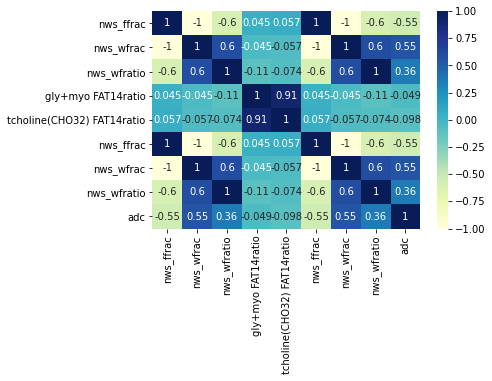

In [79]:
var_test = ['nws_ffrac',
 'nws_wfrac',
 'nws_wfratio',
 'gly+myo FAT14ratio',
 'tcholine(CHO32) FAT14ratio']+oned
cor_dat = no_out[var_test+['adc']]
sns.heatmap(cor_dat.corr(),cmap="YlGnBu",annot=True)


<Axes: >

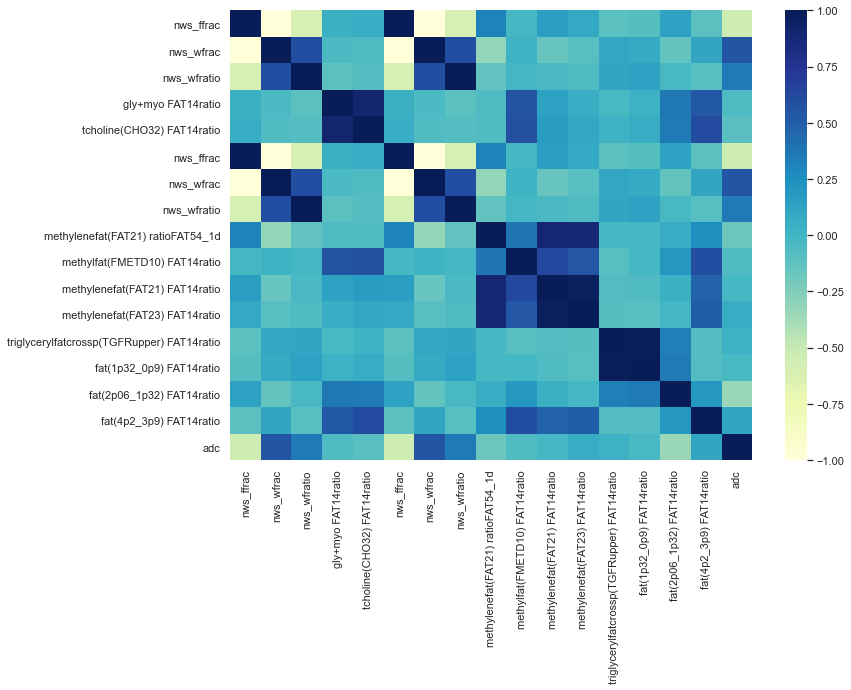

In [178]:

sns.heatmap(no_out[var_test+evars].corr(),cmap="YlGnBu")


## PCA

In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [180]:
pcaX = zdata[varsmwu]
pcaX = StandardScaler().fit_transform(pcaX)
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(pcaX)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))



Explained variation per principal component: [0.69216469 0.07622946]


<Figure size 842.4x595.44 with 0 Axes>

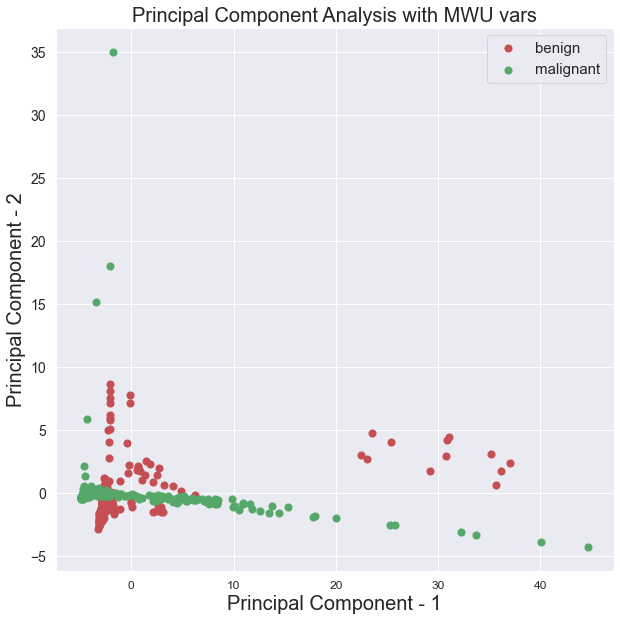

In [181]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis with MWU vars",fontsize=20)
targets = ['benign', 'malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = zdata['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep.values, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep.values, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [182]:
pca_breast.explained_variance_

array([59.66053349,  6.57053217])

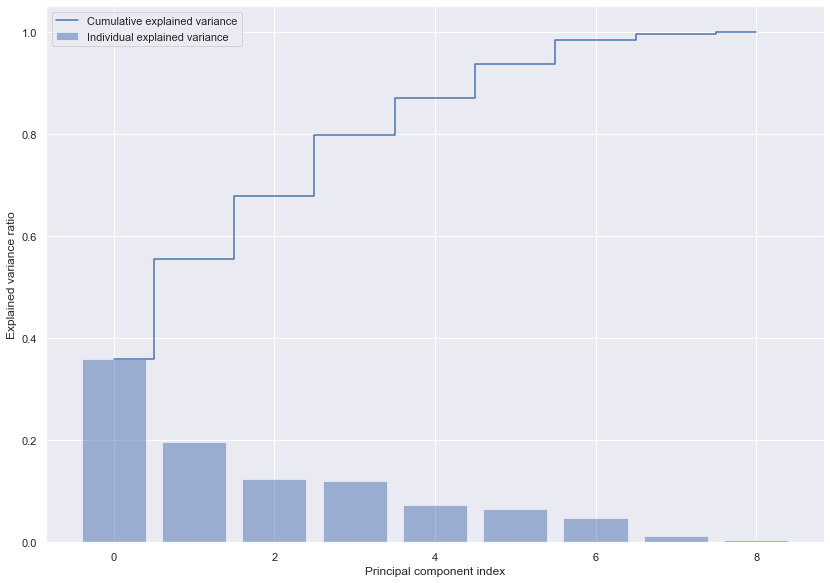

In [184]:

# Instantiate PCA
pca = PCA()
pcaX = zdata[evars]
pcaX = StandardScaler().fit_transform(pcaX)
X_train_pca = pca.fit_transform(pcaX)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Explained variation per principal component: [0.33441803 0.19579634]


<Figure size 842.4x595.44 with 0 Axes>

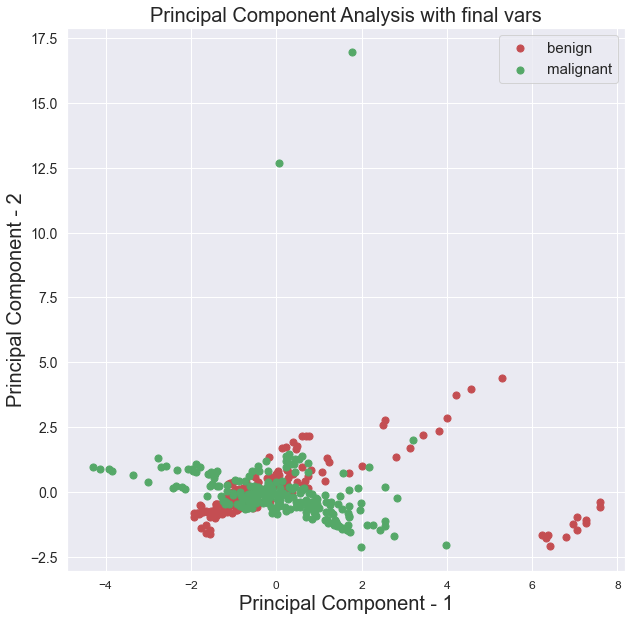

In [185]:

pcaX = renamed[evarsname]
pcaX = StandardScaler().fit_transform(pcaX)
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(pcaX)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis with final vars",fontsize=20)
targets = ['benign', 'malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = no_out['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep.values, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep.values, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


# Machine learning  


In [220]:

from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,StratifiedGroupKFold, StratifiedShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import scikitplot as skplt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score


## Train-test split

Getting train and test sets based on selected variables. 

To prevent repeated inclusion of data in the test sets:

we split based on dataset names, such that test and train sets do not share voxels from same datasets, by setting groups = dataset in the GroupShuffleSplit and (Stratified)GroupKFold methods. 

In [223]:
def tts(dat,vars, train_size = 0.8,rs=np.random.RandomState()):
    X = dat[vars]
    y = LabelEncoder().fit_transform(dat.label)
    groups = dat[['dataset']]
    group_dict = dict(zip(dat.dataset,dat.label))
    gps = list(group_dict.keys())
    gl = list(group_dict.values())

    sss = StratifiedShuffleSplit(n_splits=1,train_size=train_size,random_state=rs)
    for i, (train_index, test_index) in enumerate(sss.split(gps, gl)):
        #print(i)
        trds = [gps[idx] for idx in train_index] 
        teds = [gps[idx] for idx in test_index]
        g_train = groups[groups.dataset.isin(trds)].dataset
        g_test = groups[groups.dataset.isin(teds)].dataset
        #print(set(g_train).intersection(set(g_test)))
        X_train = X.loc[dat.dataset.isin(g_train),vars]
        X_test = X.loc[dat.dataset.isin(g_test),vars]
        y_train = y[dat.dataset.isin(g_train)]
        y_test = y[dat.dataset.isin(g_test)]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test,g_train,g_test


In [722]:
X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,mcolumns,rs=42)
print(len(X_train))
print(len(X_test))

350
86


In [723]:
print('==train==')
print('#malignant')
print(len(set(g_train).intersection(set(maglinantd))))
print('#benign')
print(len(set(g_train).intersection(set(benignd))))
print('==test==')
print('#malignant')
print(len(set(g_test).intersection(set(maglinantd))))
print('#benign')
print(len(set(g_test).intersection(set(benignd))))

==train==
#malignant
17
#benign
14
==test==
#malignant
5
#benign
3


In [724]:
#This code is just run to get train and test set index
train = no_out[no_out.dataset.isin(g_train.values)]
test = no_out[no_out.dataset.isin(g_test.values)]

In [725]:
print('#train voxels')
print(len(train))
print('#test voxels')
print(len(test))

#train voxels
350
#test voxels
86


Text(0.5, 0.98, 'Label distributions')

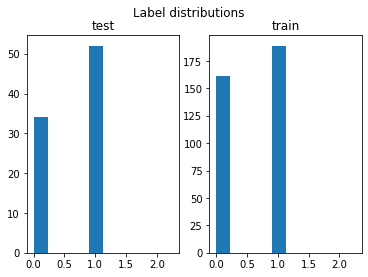

In [726]:
#visualize label distributions 
plt.subplot(1,2,1)
plt.hist(y_test,range=(0,2.25),align='mid')
plt.title('test')
plt.subplot(1,2,2)
plt.hist(y_train,range=(0,2.25),align='mid')
plt.title('train')
plt.suptitle('Label distributions')

In [98]:
#this is t tests on the train data
tt = pd.DataFrame()
for i in range(len(mcolumns)):
    var = mcolumns[i]
    ev = lenv.equal_var[i]
    bn = train.loc[no_out['label']=='benign',var]
    ml = train.loc[no_out['label']=='malignant',var]
    update = pg.ttest(bn,ml, paired=False,confidence = 0.99, alternative='two-sided', correction=ev) #bonf
    tt = pd.concat([tt,update])
tt['met'] = mcolumns
tt['valid'] = tt['p-val'] < 0.01
ttvars = list(tt[tt.valid].met)
len(tt[tt.valid].met.unique())


43

In [229]:


#mwu tests on the train data
mwu = pd.DataFrame()
for i in range(len(mcolumns)):
    var = mcolumns[i]
    df = train.loc[:,[var,'label']]
    update = pg.mwu(x = df[df.label == 'benign'][var],y = df[df.label == 'malignant'][var]) 
    mwu = pd.concat([mwu,update])
mwu['met'] = mcolumns
mwu['valid'] = mwu['p-val'] < 0.01
varsmwu = list(mwu[mwu.valid].met)
print(len(mwu[mwu.valid].met.unique()))

#sanity check 350x87 for train, 86x87  for test
print(X_train.shape)
print(X_test.shape)


87
(350, 99)
(86, 99)


In [230]:
#350x87, 86x87
X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,varsmwu,rs=42)
print(X_train.shape)
print(X_test.shape)

(350, 87)
(86, 87)


## List of models and hyperparameter grid

## Simple base learner  
(None of the base learners show perticularly promising results. The highest score is achieved by linear SVM)

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [231]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
   # "Gaussian Process",
    "Decision Tree",
    #"Random Forest",
    "Neural Net",
    "Naive Bayes",
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025,random_state = 42),
    SVC(gamma=2, C=1,random_state = 42),
   # GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),#took toolong
    DecisionTreeClassifier(max_depth=5),#,random_state = 42
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,random_state = 42),
    MLPClassifier(alpha=1, max_iter=1000,random_state = 42),
    #AdaBoostClassifier(random_state = 42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score =clf.score(X_test, y_test)
    print(name+" "+str(score))

    

Nearest Neighbors 0.5697674418604651
Linear SVM 0.7558139534883721
RBF SVM 0.6046511627906976
Decision Tree 0.813953488372093
Neural Net 0.7558139534883721
Naive Bayes 0.5581395348837209
QDA 0.627906976744186


/Users/linlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [27]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

### Model 0: linear svm

In [199]:
# Optimize linear SVM
lsvc = SVC(kernel="linear", random_state = 42)
svm_grid = {'C': [0.01,0.02,0.05,0.1,0.15,0.2]} 
svm_gridcv = GridSearchCV(lsvc, svm_grid, verbose = 0,cv = StratifiedGroupKFold(5))
svm_gridcv.fit(X_train,y_train,groups=g_train)
print(svm_gridcv.best_estimator_)
print(svm_gridcv.best_score_)


SVC(C=0.02, kernel='linear', random_state=42)
0.9012132433867229


In [197]:

sc = []
cc = []
C = np.arange(0.01,1,0.01)
for i in C:
    svct = SVC(kernel="linear",C = i, random_state = 42)
    scc = np.mean(cross_val_score(svct,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)


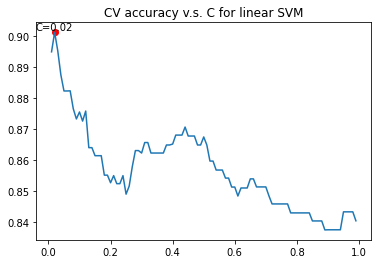

In [198]:

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'C='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. C for linear SVM')
plt.show()


In [169]:
svc_opt = SVC(kernel="linear", C = 0.02,random_state = 42)

## Bagging method

### Bagging Classifier

Aim at reducing variances by combining the predictions of multiple independent estimators (homogenous)

Decision Tree-based Bagging Clssifier performs better than the random forest based one, attaining 88.75% accuracy on test sets.

In [27]:
from sklearn.ensemble import BaggingClassifier


In [204]:
# random forests
rbfsvm = SVC(gamma=2, C=1,random_state = 42)
baggingsvm = BaggingClassifier(SVC(gamma=2, C=1,random_state = 42),random_state = 42)
baggingsvm.fit(X_train,y_train)
svmsc = baggingsvm.score(X_test,y_test)
# lm bagg
bagginglm = BaggingClassifier(SVC(kernel="linear", C = 0.0015,random_state = 42),random_state = 42)
bagginglm.fit(X_train,y_train)
lmsc = bagginglm.score(X_test,y_test)
# decision tree
dt = DecisionTreeClassifier(max_depth=5,random_state = 42)
baggingdt = BaggingClassifier(dt,random_state = 42)
baggingdt.fit(X_train,y_train)
dtsc = baggingdt.score(X_test,y_test)
# get test accuracies
print("RBG SVM based :"+str(svmsc))
print("DT based :"+str(dtsc))
print("Linear SVM based :"+str(lmsc))


RBG SVM based :0.4943820224719101
DT based :0.7528089887640449
Linear SVM based :1.0


### Model 1: DT based bagging classifier

In [ ]:
dt_grid ={'bootstrap': [True, False],
'bootstrap_features': [True, False],    
'n_estimators': [5, 10, 15],
'max_samples' : [0.6, 0.8, 1.0],   
'base_estimator__max_depth' : [1, 2, 3, 4, 5, 10, 20, 50],
'base_estimator__max_features' : [0.6, 0.8, 1.0]}


dtc = DecisionTreeClassifier(random_state = 42)
baggingdt = BaggingClassifier(dtc,random_state = 42)
bagdt_cv = GridSearchCV(baggingdt,dt_grid, verbose = 0,cv = StratifiedGroupKFold(5))
bagdt_cv.fit(X_train,y_train,groups=g_train)
print(bagdt_cv.best_estimator_)
print(bagdt_cv.best_score_)

In [321]:
#Grid for svc-based bagging classifier
lm_grid ={'bootstrap': [True, False],
'bootstrap_features': [True, False],    
'n_estimators': [5, 10, 15],
'max_samples' : [0.6, 0.8, 1.0],   
'base_estimator__C':[0.0001,0.005,0.02,0.0015,0.025,0.01,0.1, 0.25,1]}

bagginglm = BaggingClassifier(SVC(kernel="linear", C = 0.0015,random_state = 42),random_state = 42)


In [207]:
baglm_cv = GridSearchCV(bagginglm,lm_grid, verbose = 0,cv = StratifiedGroupKFold(5))
baglm_cv.fit(X_train,y_train,groups=g_train)
print(baglm_cv.best_estimator_)
print(baglm_cv.best_score_)

BaggingClassifier(base_estimator=SVC(C=0.02, kernel='linear', random_state=42),
                  bootstrap=False, bootstrap_features=True, max_samples=0.6,
                  n_estimators=5, random_state=42)
0.8473295972142545


In [ ]:
#bt_opt = BaggingClassifier(base_estimator=SVC(C=0.02, kernel='linear', random_state=42),
  #                bootstrap=False, bootstrap_features=True, max_samples=0.6,
   #               n_estimators=5, random_state=42)

In [34]:
sc = []
steps = np.arange(1,20,2)
for i in steps:
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        max_features=1.0,
                                                        random_state=42),
                  bootstrap_features=True, max_samples=0.6, n_estimators=i,
                  random_state=42)
    scc = np.mean(cross_val_score(model,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)




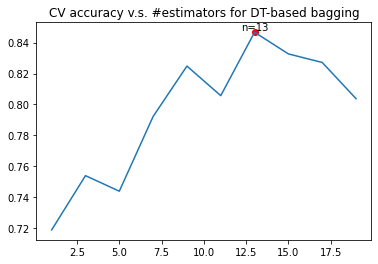

In [36]:

plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for DT-based bagging')
plt.show()

In [324]:
bt_opt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        max_features=1.0,
                                                        random_state=42),
                  bootstrap_features=True, max_samples=0.6, n_estimators=13,
                  random_state=42)

### Random Forest Classifier

 a meta estimator that fits a number of base tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting  

Doesn't seem promising. 

In [28]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


In [211]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train,y_train)
rfcsc = rfc.score(X_test,y_test)
#extra random forest 
exrfc = ExtraTreesClassifier(n_estimators=200, max_depth=None,
    min_samples_split=2, random_state=42)
exrfc.fit(X_train,y_train)
exrfcsc = exrfc.score(X_test,y_test)
print("Extra RandomForest: "+str(exrfcsc))
print("RandomForest: "+str(rfcsc))


Extra RandomForest: 0.8202247191011236
RandomForest: 0.8539325842696629


### Model 2: Random Forest


In [39]:
n_estimators = np.arange(1,200,50)
# Maximum nucmber of levels in tree
max_depth = [1,3,5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(random_state=42)
r_cv = GridSearchCV(rfc, random_grid, verbose = 0,cv = StratifiedGroupKFold(5))
r_cv.fit(X_train,y_train,groups=g_train)
print(r_cv.best_estimator_)
print(r_cv.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_split=10,
                       n_estimators=1, random_state=42)
0.8048732688790174


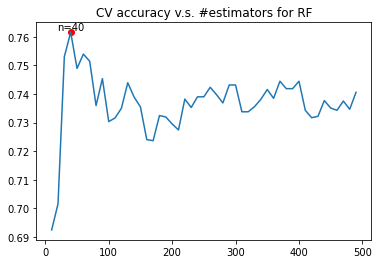

In [40]:
sc = []
steps = np.arange(10,500,10)
for i in steps:
    classifier = RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_split=10,
                       n_estimators=i, random_state=42)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)



plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for RF')
plt.show()

In [343]:
rf_opt = RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_split=10,
                       n_estimators=40, random_state=42)

### Voting Classifier
Combine conceptually different machine learning algorithms using a majority vote or soft vote to average performance (heterogenous) 

With other choices of based learners, voting classifier could potentially reach higher classification accuracies. 

In [50]:
from sklearn.ensemble import VotingClassifier

In [255]:
rbfsvc = SVC(gamma=2, C=1,random_state = 42)
dt = DecisionTreeClassifier(max_depth=5,random_state = 42)
nb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=200,random_state=42)

eclf = VotingClassifier(
    estimators=[('rbf svc', rbfsvc), ('dt', dt), ('nb', nb),('rfc', rfc)],
    voting='hard')

for clf, label in zip([rbfsvc,dt,nb,rfc, eclf], ['RBF SVC', 'Decision Tree', 'Naive Bayes','Random Forest', 'Ensemble']):
    clf.fit(X_train,y_train)
    print(label)
    print(clf.score(X_test,y_test))


RBF SVC
0.48314606741573035
Decision Tree
0.5730337078651685
Naive Bayes
0.550561797752809
Random Forest
0.8539325842696629
Ensemble
0.7303370786516854


## Boosting method  

Aim at reducing bias by sequentially combining weak base learners that learn from previous mistakes (also homogenous)

Gradient Boosting and Extra Gradient Boosting methods show potentials. 

https://datascience.stackexchange.com/questions/74488/tuning-parameters-for-gradient-boosting-xgboost

### Adaboost: SVC base learners

In [30]:
from sklearn.ensemble import AdaBoostClassifier


In [125]:
# SVC AS BASE

rbfsvc2 = SVC(gamma=2,random_state = 42)
clf = AdaBoostClassifier(n_estimators=100,base_estimator = rbfsvc2,algorithm='SAMME') #SVC above
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6046511627906976

In [218]:

clf = AdaBoostClassifier(n_estimators=30) #SVC above
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9887640449438202

### Model 3: Ada Boost

In [ ]:
ada_grid = dict()

# estimator till 500
ada_grid['n_estimators'] = np.arange(10,200,10)

# defining learning rate
ada_grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.5]


ada_grid['base_estimator__max_depth']= [1, 3, 5, 10, 20]
ada_grid['base_estimator__max_features']=[0.6, 0.8, 1.0]
adamdl = AdaBoostClassifier(DecisionTreeClassifier(),random_state = 42)
ada_gridcv = GridSearchCV(estimator=adamdl, param_grid=ada_grid,cv=StratifiedGroupKFold(5))
ada_gridcv.fit(X_train,y_train,groups=g_train)
print(ada_gridcv.best_estimator_)
print(ada_gridcv.best_score_)

In [518]:
sc = []
steps = np.arange(10,200,10)
for i in steps:
    classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.6),
                   learning_rate=0.1, n_estimators=i, random_state=42)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)


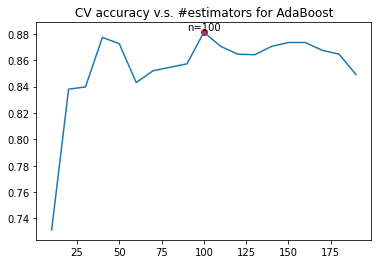

In [519]:
plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for AdaBoost')
plt.show()

In [221]:
ada_opt =  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.6),
                   learning_rate=0.1, n_estimators=100, random_state=42)



### Gradient boost:
 trees based, can't alter

In [31]:
from sklearn.ensemble import GradientBoostingClassifier


In [50]:

glf = GradientBoostingClassifier(n_estimators=100, random_state=42,warm_start=False)

glf.fit(X_train, y_train)
glf.score(X_test, y_test)

0.7209302325581395

### Model 4: Gradient Boost


In [52]:
learning_rates = [1, 0.5,0.1]
n_estimators = np.arange(10,200,10)
max_depths = [2, 3, 5, 10,20,30]
min_samples_split = np.linspace(0.1, 1.0, 3, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 3, endpoint=True)


# Define the grid of hyperparameters to search
glf_grid = {
    'max_depth':max_depths,
    'learning_rate':learning_rates,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leafs
    }

    #parameters = {
    #"loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
   # "min_samples_split": np.linspace(0.1, 0.5, 12),
   # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
   # "max_depth":[3,5],
   # "max_features":["log2","sqrt"],
   # "criterion": ["friedman_mse",  "mae"],
   # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #"n_estimators":[10,50,200]
    #}


glf = GradientBoostingClassifier(random_state=42,warm_start=False)
glf_gridcv = GridSearchCV(glf, glf_grid,cv=StratifiedGroupKFold(5))
glf_gridcv.fit(X_train,y_train,groups=g_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': array([0.1, 0.3, 0.5]),
                         'min_samples_split': array([0.1 , 0.55, 1.  ])})

In [53]:
print(glf_gridcv.best_estimator_)
print(glf_gridcv.best_score_)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           random_state=42)
0.8917500744519689


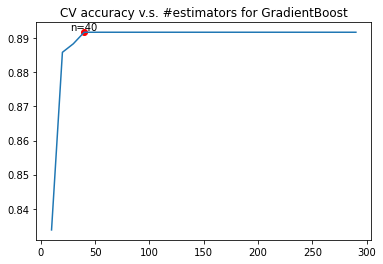

In [55]:
sc = []
steps = np.arange(10,300,10)
for i in steps:
    classifier = GradientBoostingClassifier(n_estimators = i,learning_rate=0.5, max_depth=10,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           random_state=42)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)



plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for GradientBoost')
plt.show()

In [106]:
glf_opt = GradientBoostingClassifier(n_estimators =50 ,learning_rate=0.5, max_depth=10,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           random_state=42)

### XGBoost    

https://datascience.stackexchange.com/questions/35713/i-got-100-accuracy-on-my-test-set-is-there-something-wrong   # good advice  

1) xgb rf https://xgboost.readthedocs.io/en/stable/tutorials/rf.html
    prevent overfitting
2) stratified kboost https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
    mediate class balance 

In [32]:
import xgboost as xgb 


In [230]:
xgbrf = xgb.XGBRFClassifier(objective="binary:logistic",random_state = 42)

xgbrf.fit(X_train, y_train)
xgbrf.score(X_test, y_test)

0.5955056179775281

In [58]:
xgbc = xgb.XGBClassifier(objective="binary:logistic",random_state = 42)
xgbc.fit(X_train, y_train)
xgbc.score(X_test, y_test)

0.813953488372093

### Model 5: XGBoost



In [97]:
# xgb grid
#base_score=[0.25,0.5,1]
n_estimators = np.arange(10,200,20)
max_depth = [2, 3, 5, 10]
booster=['gbtree']
learning_rate=[0.1,0.5,1]
min_child_weight=[1,2,3]

# Define the grid of hyperparameters to search
xgb_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    #'base_score':base_score
    }

xgbc = xgb.XGBClassifier(random_state = 42,)
xgb_gridcv = GridSearchCV(xgbc, xgb_grid,cv=StratifiedGroupKFold(5))
xgb_gridcv.fit(X_train,y_train,groups=g_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     import...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [2, 3, 5, 10],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])})

In [98]:
print(xgb_gridcv.best_estimator_)
print(xgb_gridcv.best_score_)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
0.8629378380949753


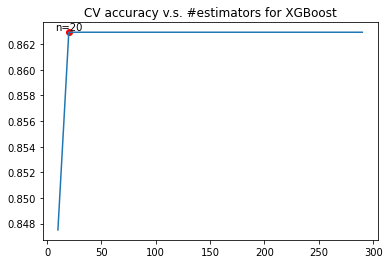

In [101]:
sc = []
steps = np.arange(10,300,10)
for i in steps:
    classifier = xgb.XGBClassifier(booster='gbtree', learning_rate=0.5, 
              min_child_weight=3,
              n_estimators=i,random_state=42)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)



plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for XGBoost')
plt.show()

In [100]:
xgb_opt = xgb.XGBClassifier(booster='gbtree', learning_rate=0.5, 
              min_child_weight=3,
              n_estimators=20,random_state=42)

### Catboost

In [33]:
from catboost import CatBoostClassifier


In [64]:

cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
cat.score(X_test, y_test)
#'Wilcoxon', 'IncToDec', 'Iter'. 
#https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier 

0.7441860465116279

### Model 6: Catboost


In [29]:
catm = CatBoostClassifier(verbose=0)
grid = {'learning_rate': [0.03, 0.1,0.1],
        'n_estimators': [10, 50, 100, 150, 200]
        }

grid_search_result = catm.grid_search(grid, 
                                      cv = StratifiedGroupKFold(5),
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7085938657
bestIteration = 0

0:	loss: 0.7085939	best: 0.7085939 (0)	total: 131ms	remaining: 5.77s

bestTest = 0.7565295475
bestIteration = 0

1:	loss: 0.7565295	best: 0.7085939 (0)	total: 173ms	remaining: 3.73s

bestTest = 0.7565295475
bestIteration = 0

2:	loss: 0.7565295	best: 0.7085939 (0)	total: 202ms	remaining: 2.83s

bestTest = 0.7085938657
bestIteration = 0

3:	loss: 0.7085939	best: 0.7085939 (0)	total: 369ms	remaining: 3.78s

bestTest = 0.7565295475
bestIteration = 0

4:	loss: 0.7565295	best: 0.7085939 (0)	total: 534ms	remaining: 4.27s

bestTest = 0.7565295475
bestIteration = 0

5:	loss: 0.7565295	best: 0.7085939 (0)	total: 716ms	remaining: 4.65s

bestTest = 0.7085938657
bestIteration = 0

6:	loss: 0.7085939	best: 0.7085939 (0)	total: 1.03s	remaining: 5.6s

bestTest = 0.7565295475
bestIteration = 0

7:	loss: 0.7565295	best: 0.7085939 (0)	total: 1.57s	remaining: 7.29s

bestTest = 0.7565295475
bestIteration = 0

8:	loss: 0.7565295	best: 0.7085939 (0)	total: 1.99s	r

: 

: 

In [ ]:
catm = CatBoostClassifier(verbose=0)
grid = {'learning_rate': [0.03, 0.1,0.1],
        'n_estimators': [10, 50, 100, 150, 200]
        }

grid_search_result = catm.grid_search(grid, 
                                      cv = StratifiedGroupKFold(5),
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)
grid_search_result['params']

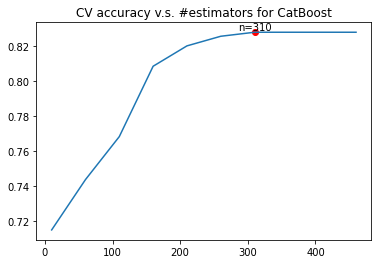

In [66]:
sc = []
steps = np.arange(10,500,50)
for i in steps:
    classifier = CatBoostClassifier(**{'n_estimators':i,'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},random_state=42,verbose=0)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)



plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for CatBoost')
plt.show()

In [67]:
cat_opt = CatBoostClassifier(**{'n_estimators':310,'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},random_state=42,verbose=0)

### Light Gradient Boost   
(Faster ver. of gradient boost)

See external notebook: 
https://colab.research.google.com/drive/1cjJutDZvMGfTFOcr_URfSQEq8Pe3LlF3?usp=sharing  

There is also a lightGBM inspired regression tree based gradient boosting classifier called [HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier) that is basically a faster implementation that could impute missing values.  


## Stacking method

fitting many different models types on the same data and using another model to learn how to best combine the predictions. (heterogenous)

In [127]:
from sklearn.ensemble import StackingClassifier

In [241]:
ests = [('svc', SVC(gamma=2, C=1,random_state = 42)),
        ('dt',DecisionTreeClassifier(max_depth=5,random_state = 42)),
        ('rfc',ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=42))
        ] #tuple(name,model)
stc = StackingClassifier(estimators=ests, final_estimator=SVC())
stc.fit(X_train,y_train)
stc.score(X_test,y_test)

0.7752808988764045

## Decision tree

In [238]:
tree = DecisionTreeClassifier(max_depth=5),#,random_state = 42
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15,20,30,40,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=StratifiedGroupKFold(5))
grid_search.fit(X_train, y_train,groups=g_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print(grid_search.best_estimator_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.7426939771688136
DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=2,
                       min_samples_split=10)


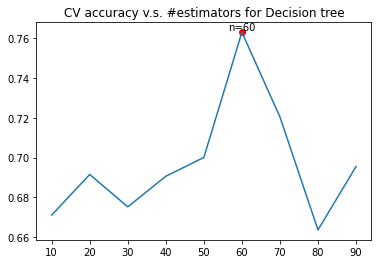

In [239]:

sc = []
steps = np.arange(10,100,10)
for i in steps:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=2,
                       min_samples_split=10)
    scc = np.mean(cross_val_score(classifier,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)

plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. #estimators for Decision tree')
plt.show()

In [241]:
tree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=60, min_samples_leaf=2,
                       min_samples_split=10)

## Feature selection


About order:

 https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m 

Implementing StratifiedGroupKFold + recursive feature selection (with a minimum feature # of 5)

### Recursive feature elimination

In [40]:
from sklearn.feature_selection import RFECV

min_features_to_select = 5  # Minimum number of features to consider
cv =  StratifiedGroupKFold(5)
rfecv = RFECV(
    estimator=glf_opt,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train,
    groups = g_train)


RFECV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=10,
                                           min_samples_leaf=0.1,
                                           min_samples_split=0.1,
                                           n_estimators=50, random_state=42),
      min_features_to_select=5, n_jobs=2, scoring='accuracy')

/Users/linlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


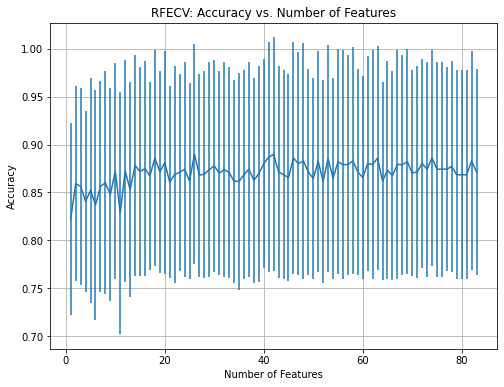

In [602]:
num_features = range(1, len(rfecv.grid_scores_) + 1)

# Plot accuracy versus number of features
plt.figure(figsize=(8, 6))
plt.errorbar(num_features, rfecv.cv_results_['mean_test_score'],
             yerr=rfecv.cv_results_['std_test_score'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('RFECV: Accuracy vs. Number of Features')
plt.grid(True)
plt.show()

In [625]:
# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)
rfevar = []
# Get the selected feature indices
selected_features = rfecv.support_

# Print the selected feature indices or names
feature_indices = [i for i, selected in enumerate(selected_features) if selected]
selected_feature_names = [varsmwu[i] for i in feature_indices]

# Print the selected feature names
print("Selected feature names: ")
for feature_name in selected_feature_names:
    print(feature_name)
    rfevar.append(feature_name)

Optimal number of features:  30
Selected feature names: 
fat(1p32_0p9) ratioFAT54_1d
fat(2p06_1p32) ratioFAT54_1d
fat(3p9_4p3) ratioFAT54_1d
methylfat(FMETD10) FAT14ratio
methylenefat(FAT21) FAT14ratio
methylenefat(FAT23) FAT14ratio
methylenefat(FAT29) FAT14ratio
fat39(fat39) FAT14ratio
methyleneglycerolbackbone(MGB42) FAT14ratio
olefinicfat(UFD54) FAT14ratio
unsatfatrightcrossp(UFRlower) FAT14ratio
unsatfatleftcrossp(UFLupper) FAT14ratio
triglycerylfatcrossp(TGFRupper) FAT14ratio
fat(1p32_0p9) FAT14ratio
fat(1p64_2p36) FAT14ratio
fat(1p32_2p06) FAT14ratio
fat(2p06_1p32) FAT14ratio
fat(4p2_3p9) FAT14ratio
gly+myo FAT14ratio
methylenefat(FAT29) ratioFAT14_1d
unsatfatleftcrossp(UFLlower) ratioFAT14_1d
triglycerylfatcrossp(TGFRlower) ratioFAT14_1d
fat(4p2_3p9) ratioFAT14_1d
methylfat(FMETD10) ratioWAT47_1d
tcholine(CHO32) ratioWAT47_1d
unsatfatleftcrossp(UFLlower) ratioWAT47_1d
fat(2p06_1p32) ratioWAT47_1d
fat(3p9_4p3) ratioWAT47_1d
gly+myo ratioWAT47_1d
adc


### correlation + rfe

In [ ]:
from scipy.stats import spearmanr
feature_names = varsmwu
# Perform correlation analysis
correlation_matrix = spearmanr(X_train).correlation
correlation_matrix

In [666]:


# Calculate Spearman rank correlation and p-value for each variable
spear_results = []
for var in combovar:
    corr, p_value = spearmanr(train[var], y_train)
    spear_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# Create a DataFrame from the results
results_df = pd.DataFrame(spear_results)
results_df[results_df["P-value"]>0.05]


Variable  Correlation   P-value
11              methylenefat(FAT21) ratioWAT47_1d     0.079548  0.137481
25                     fat(4p2_3p9) ratioFAT14_1d     0.076211  0.154811
34  triglycerylfatcrossp(TGFRlower) ratioFAT14_1d     0.101547  0.057712
36     unsatfatleftcrossp(UFLlower) ratioWAT47_1d     0.103234  0.053659

In [651]:


# Calculate Spearman rank correlation and p-value for each variable
spear_results = []
for var1 in combovar:
    for var2 in combovar:
        corr, p_value = spearmanr(train[var1], train[var2])
        var = str(set(sorted([var1,var2])))

        spear_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# Create a DataFrame from the results
results_df = pd.DataFrame(spear_results)
print(results_df)


                                               Variable  Correlation  \
0        {'unsatfatleftcrossp(UFLupper) ratioWAT47_1d'}     1.000000   
1     {'unsatfatrightcrossp(UFRupper) ratioWAT47_1d'...     0.959425   
2     {'fat(1p32_2p06) ratioWAT47_1d', 'unsatfatleft...     0.895867   
3     {'fat(3p9_4p3) ratioWAT47_1d', 'unsatfatleftcr...     0.888821   
4     {'unsatfatleftcrossp(UFLupper) ratioWAT47_1d',...     0.874736   
...                                                 ...          ...   
1676  {'methylfat(FMETD10) ratioWAT47_1d', 'unsatfat...     0.869437   
1677  {'fat39(fat39) FAT14ratio', 'methylfat(FMETD10...     0.144165   
1678  {'methylfat(FMETD10) ratioWAT47_1d', 'methylen...     0.001369   
1679  {'methylfat(FMETD10) ratioWAT47_1d', 'gly+myo ...    -0.156063   
1680               {'methylfat(FMETD10) ratioWAT47_1d'}     1.000000   

            P-value  
0      0.000000e+00  
1     2.066770e-193  
2     1.194037e-124  
3     5.580931e-120  
4     1.592813e-111  
...

In [658]:
results_df[(results_df['P-value']>0.05) & (results_df['Correlation']<=0.6)].sort_values('Correlation').tail()

Variable  Correlation   P-value
101   {'tcholine(CHO32) ratioWAT47_1d', 'fat(1p32_2p...     0.100859  0.059435
119   {'fat(1p32_2p06) ratioWAT47_1d', 'fat39(fat39)...     0.101861  0.056938
1519  {'fat(1p32_2p06) ratioWAT47_1d', 'fat39(fat39)...     0.101861  0.056938
1127  {'methylenefat(FAT21) FAT14ratio', 'unsatfatri...     0.103747  0.052475
847   {'methylenefat(FAT21) FAT14ratio', 'unsatfatri...     0.103747  0.052475

Text(0.5, 1.0, 'Correlation P-value Heatmap')

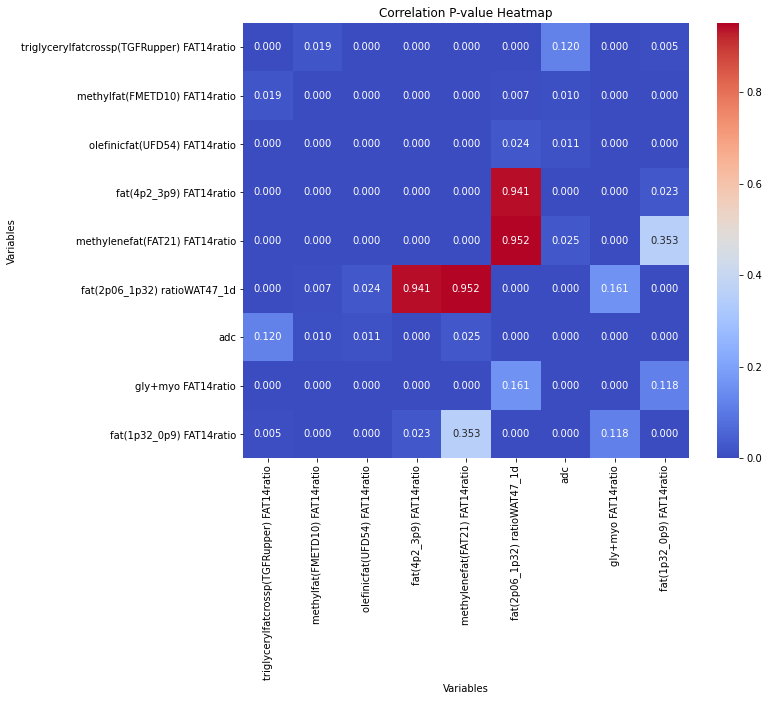

In [625]:
correlation_matrix = pd.DataFrame(index=intervars, columns=intervars)

# Calculate p-values for each pair of variables
for var1 in combovar:
    for var2 in combovar:
        corr, p_value = spearmanr(train[var1], train[var2])
        correlation_matrix.loc[var1, var2] = p_value

# Convert p-values to numeric values
correlation_matrix = correlation_matrix.astype(float)

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation P-value Heatmap')

In [626]:
intervars

['triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio',
 'fat(4p2_3p9) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'fat(2p06_1p32) ratioWAT47_1d',
 'adc',
 'gly+myo FAT14ratio',
 'fat(1p32_0p9) FAT14ratio']

In [402]:
re_dict

{'triglycerylfatcrossp(TGFRupper) FAT14ratio': 'TGFRupper/FAT14',
 'methylfat(FMETD10) FAT14ratio': 'FMETD/FAT14',
 'olefinicfat(UFD54) FAT14ratio': 'UFD54/FAT14',
 'fat(4p2_3p9) FAT14ratio': 'CP8/FAT14',
 'methylenefat(FAT21) FAT14ratio': 'FAT21/FAT14',
 'fat(2p06_1p32) ratioWAT47_1d': 'CP4/FAT14',
 'adc': 'ADC',
 'gly+myo FAT14ratio': 'mI+Gly/FAT14',
 'fat(1p32_0p9) FAT14ratio': 'CP2/FAT14'}

Retained Features: ['ADC', 'mI+Gly/FAT14', 'FAT21/FAT14', 'CP4/FAT14', 'UFD54/FAT14', 'CP8/FAT14', 'CP2/FAT14', 'FMETD/FAT14', 'TGFRupper/FAT14']
Number of reatined features:  9


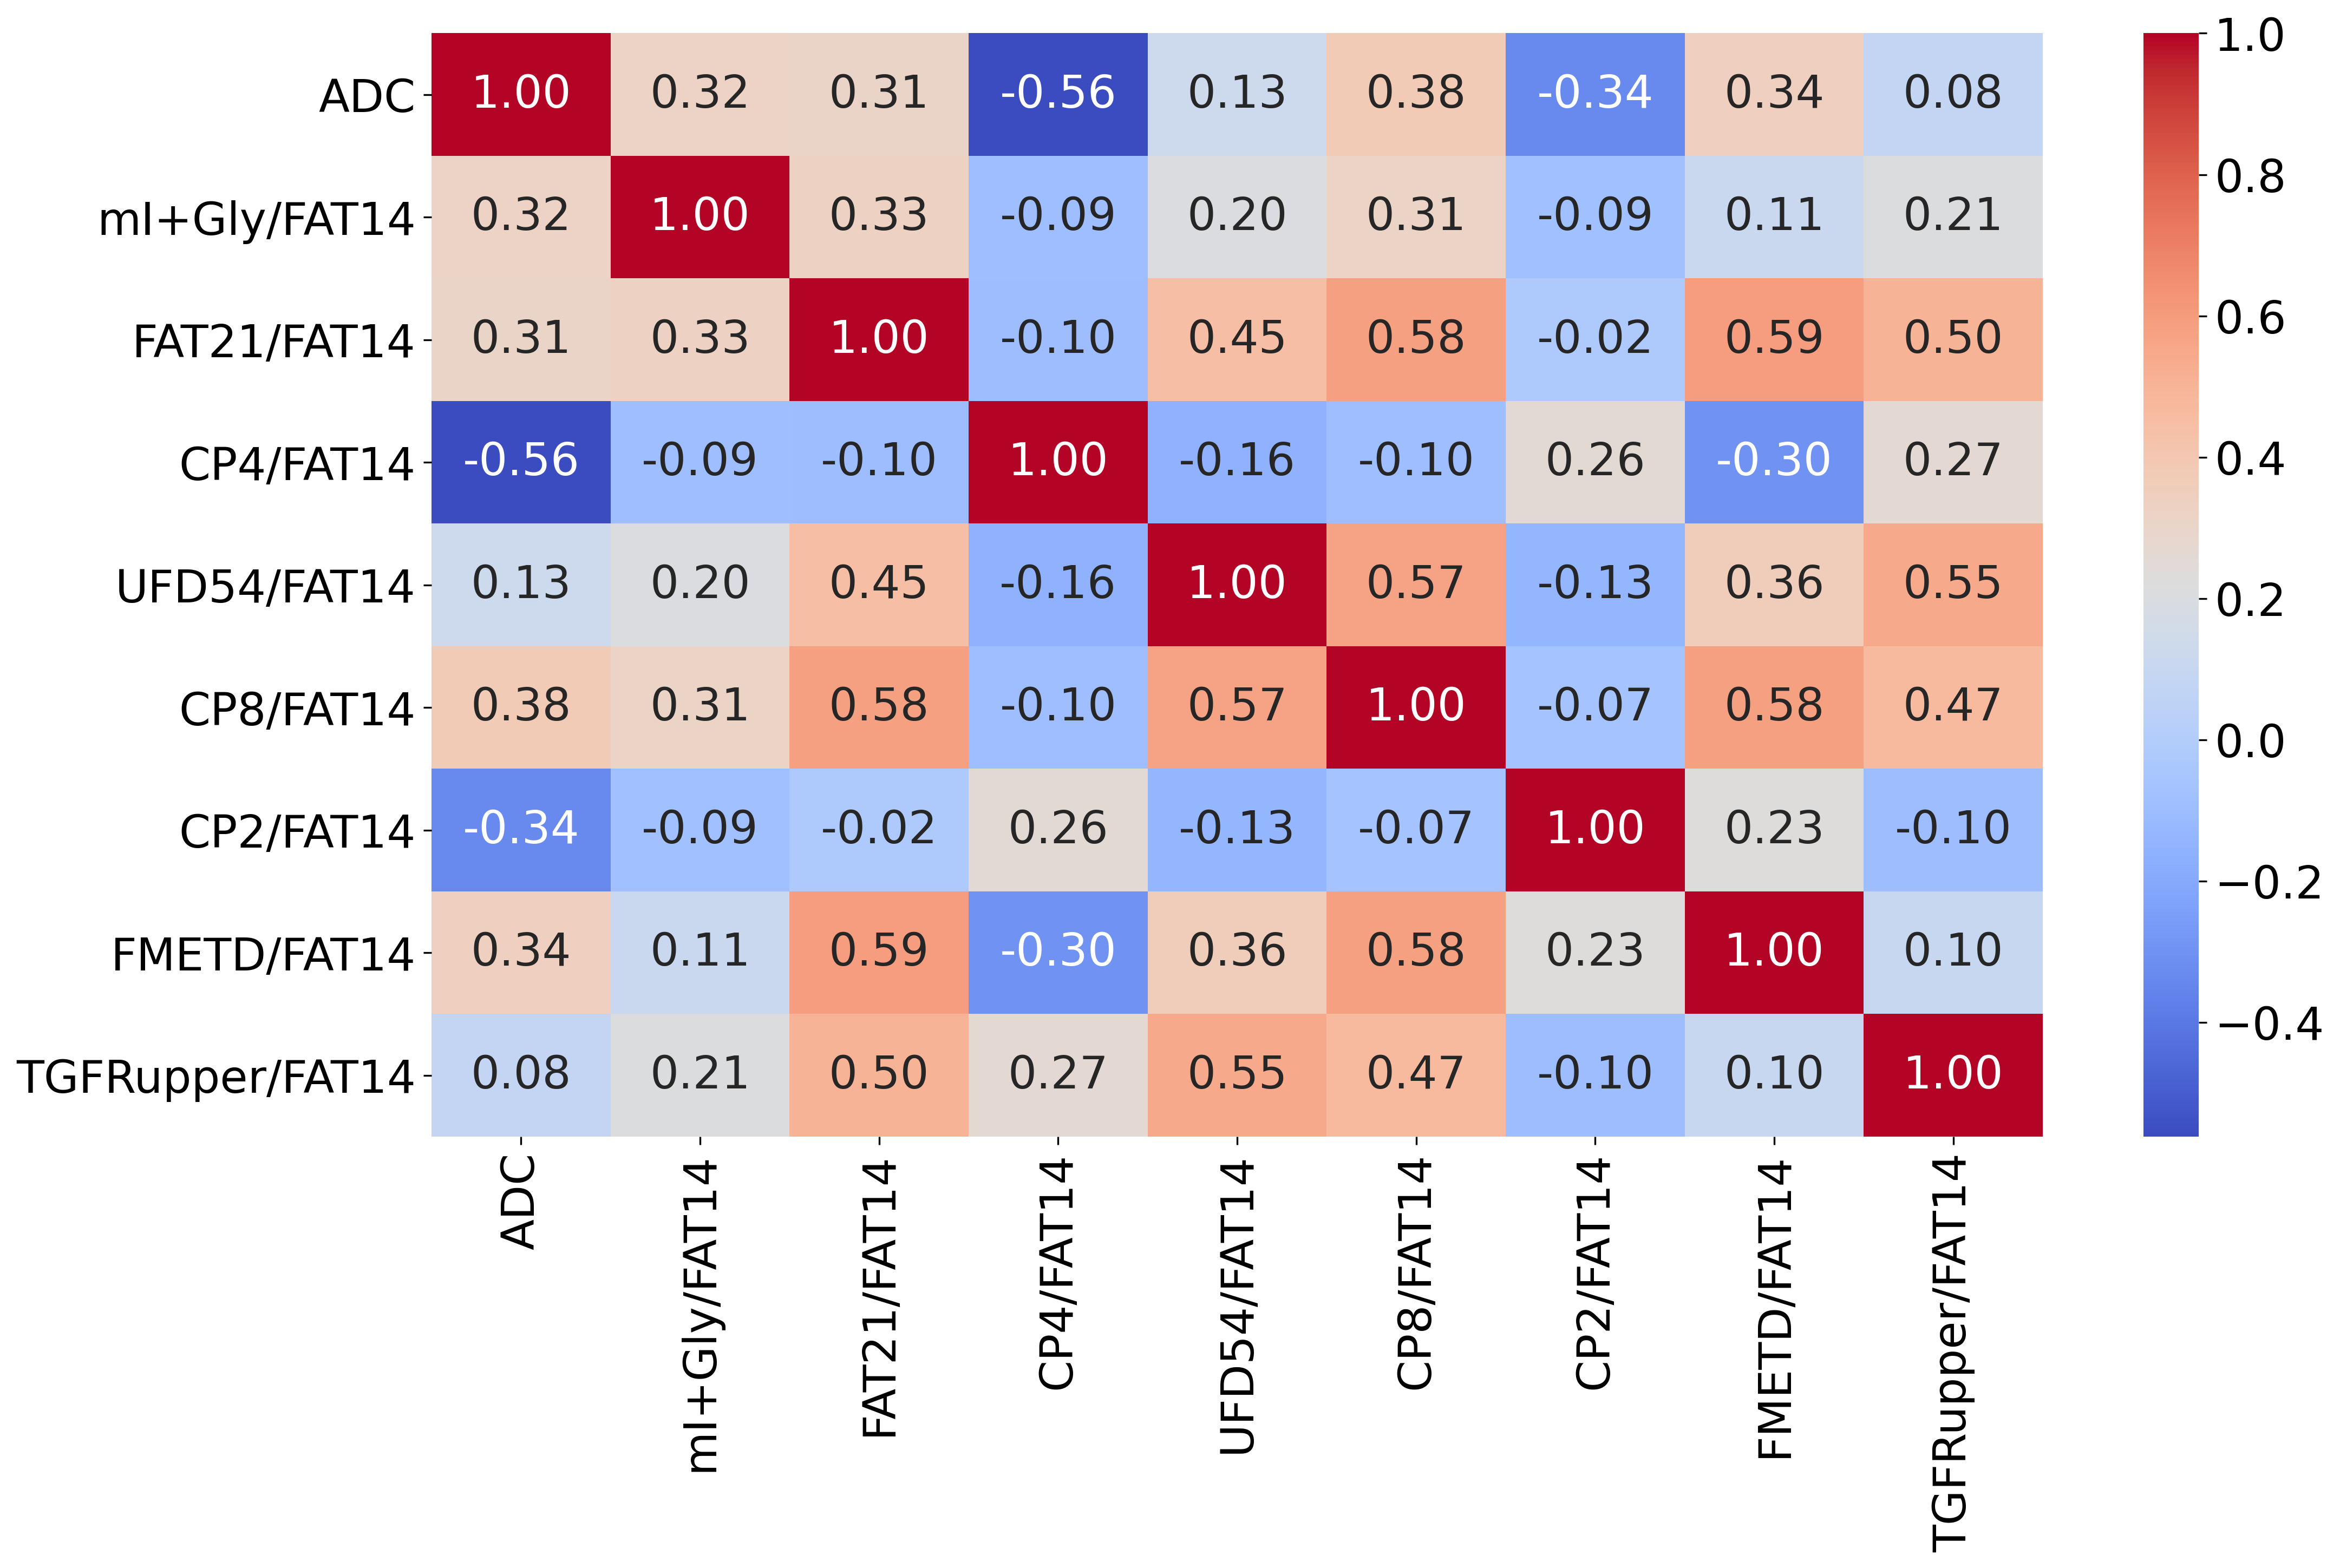

In [727]:

from scipy.stats import spearmanr
plt.figure(figsize=(16, 9), dpi=300)

selected_vars = train[inter]
selected_vars = selected_vars.rename(columns = re_dict)
corr_matrix = selected_vars.corr(method='spearman')
retained_features = []
correlation_threshold = 0.6

cols = intername
correlation_values = []
for feature in cols:
    correlation, _ = spearmanr(selected_vars[feature], y_train)
    correlation_values.append(correlation)
sorted_features = sorted(zip(cols, correlation_values), key=lambda x: x[1], reverse=False)
sorted_feature_list = [feature for feature, _ in sorted_features]
cols = sorted_feature_list
while len(cols) >0:
    #print(cols)
    col = cols[0]
    #for each feature, find any other features strongly correalted with it
    correlated_features = corr_matrix[abs(corr_matrix[col]) >= correlation_threshold].index.tolist() #which would incude itself, rho=1
    #retained the one that is the most correlated with the target
    max_corr_feature = max(correlated_features, key=lambda x: abs(spearmanr(selected_vars[x], y_train)[0]))
    retained_features.append(max_corr_feature)
    #get rid of everything already went thru
    cols = list(set(cols) - set(correlated_features))

# Remove duplicate features and retain the unique set
retained_features = list(set(retained_features))

# Filter the selected variables based on the retained features
selected_vars_filtered = selected_vars[retained_features]

# Print the retained features
print("Retained Features:", retained_features)
print("Number of reatined features: ",len(retained_features))
ax = sns.heatmap(selected_vars[retained_features].corr(method='spearman'),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.gcf().axes[1].tick_params(labelsize=20)
# Set the title and labels

In [392]:

# Print the retained features
print("Retained Features:", retained_features)
print("Number of reatined features: ",len(retained_features))
sns.heatmap(train[intername].corr(method='spearman'),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Set the title and labels
plt.title("Spearman Rank Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

Retained Features: ['triglycerylfatcrossp(TGFRupper) FAT14ratio', 'methylfat(FMETD10) FAT14ratio', 'olefinicfat(UFD54) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'adc', 'gly+myo FAT14ratio', 'fat(1p32_0p9) FAT14ratio']
Number of reatined features:  9


KeyError: "None of [Index(['TGFRupper/FAT14', 'FMETD/FAT14', 'UFD54/FAT14', 'CP8/FAT14',\n       'FAT21/FAT14', 'CP4/FAT14', 'ADC', 'mI+Gly/FAT14', 'CP2/FAT14'],\n      dtype='object')] are in the [columns]"

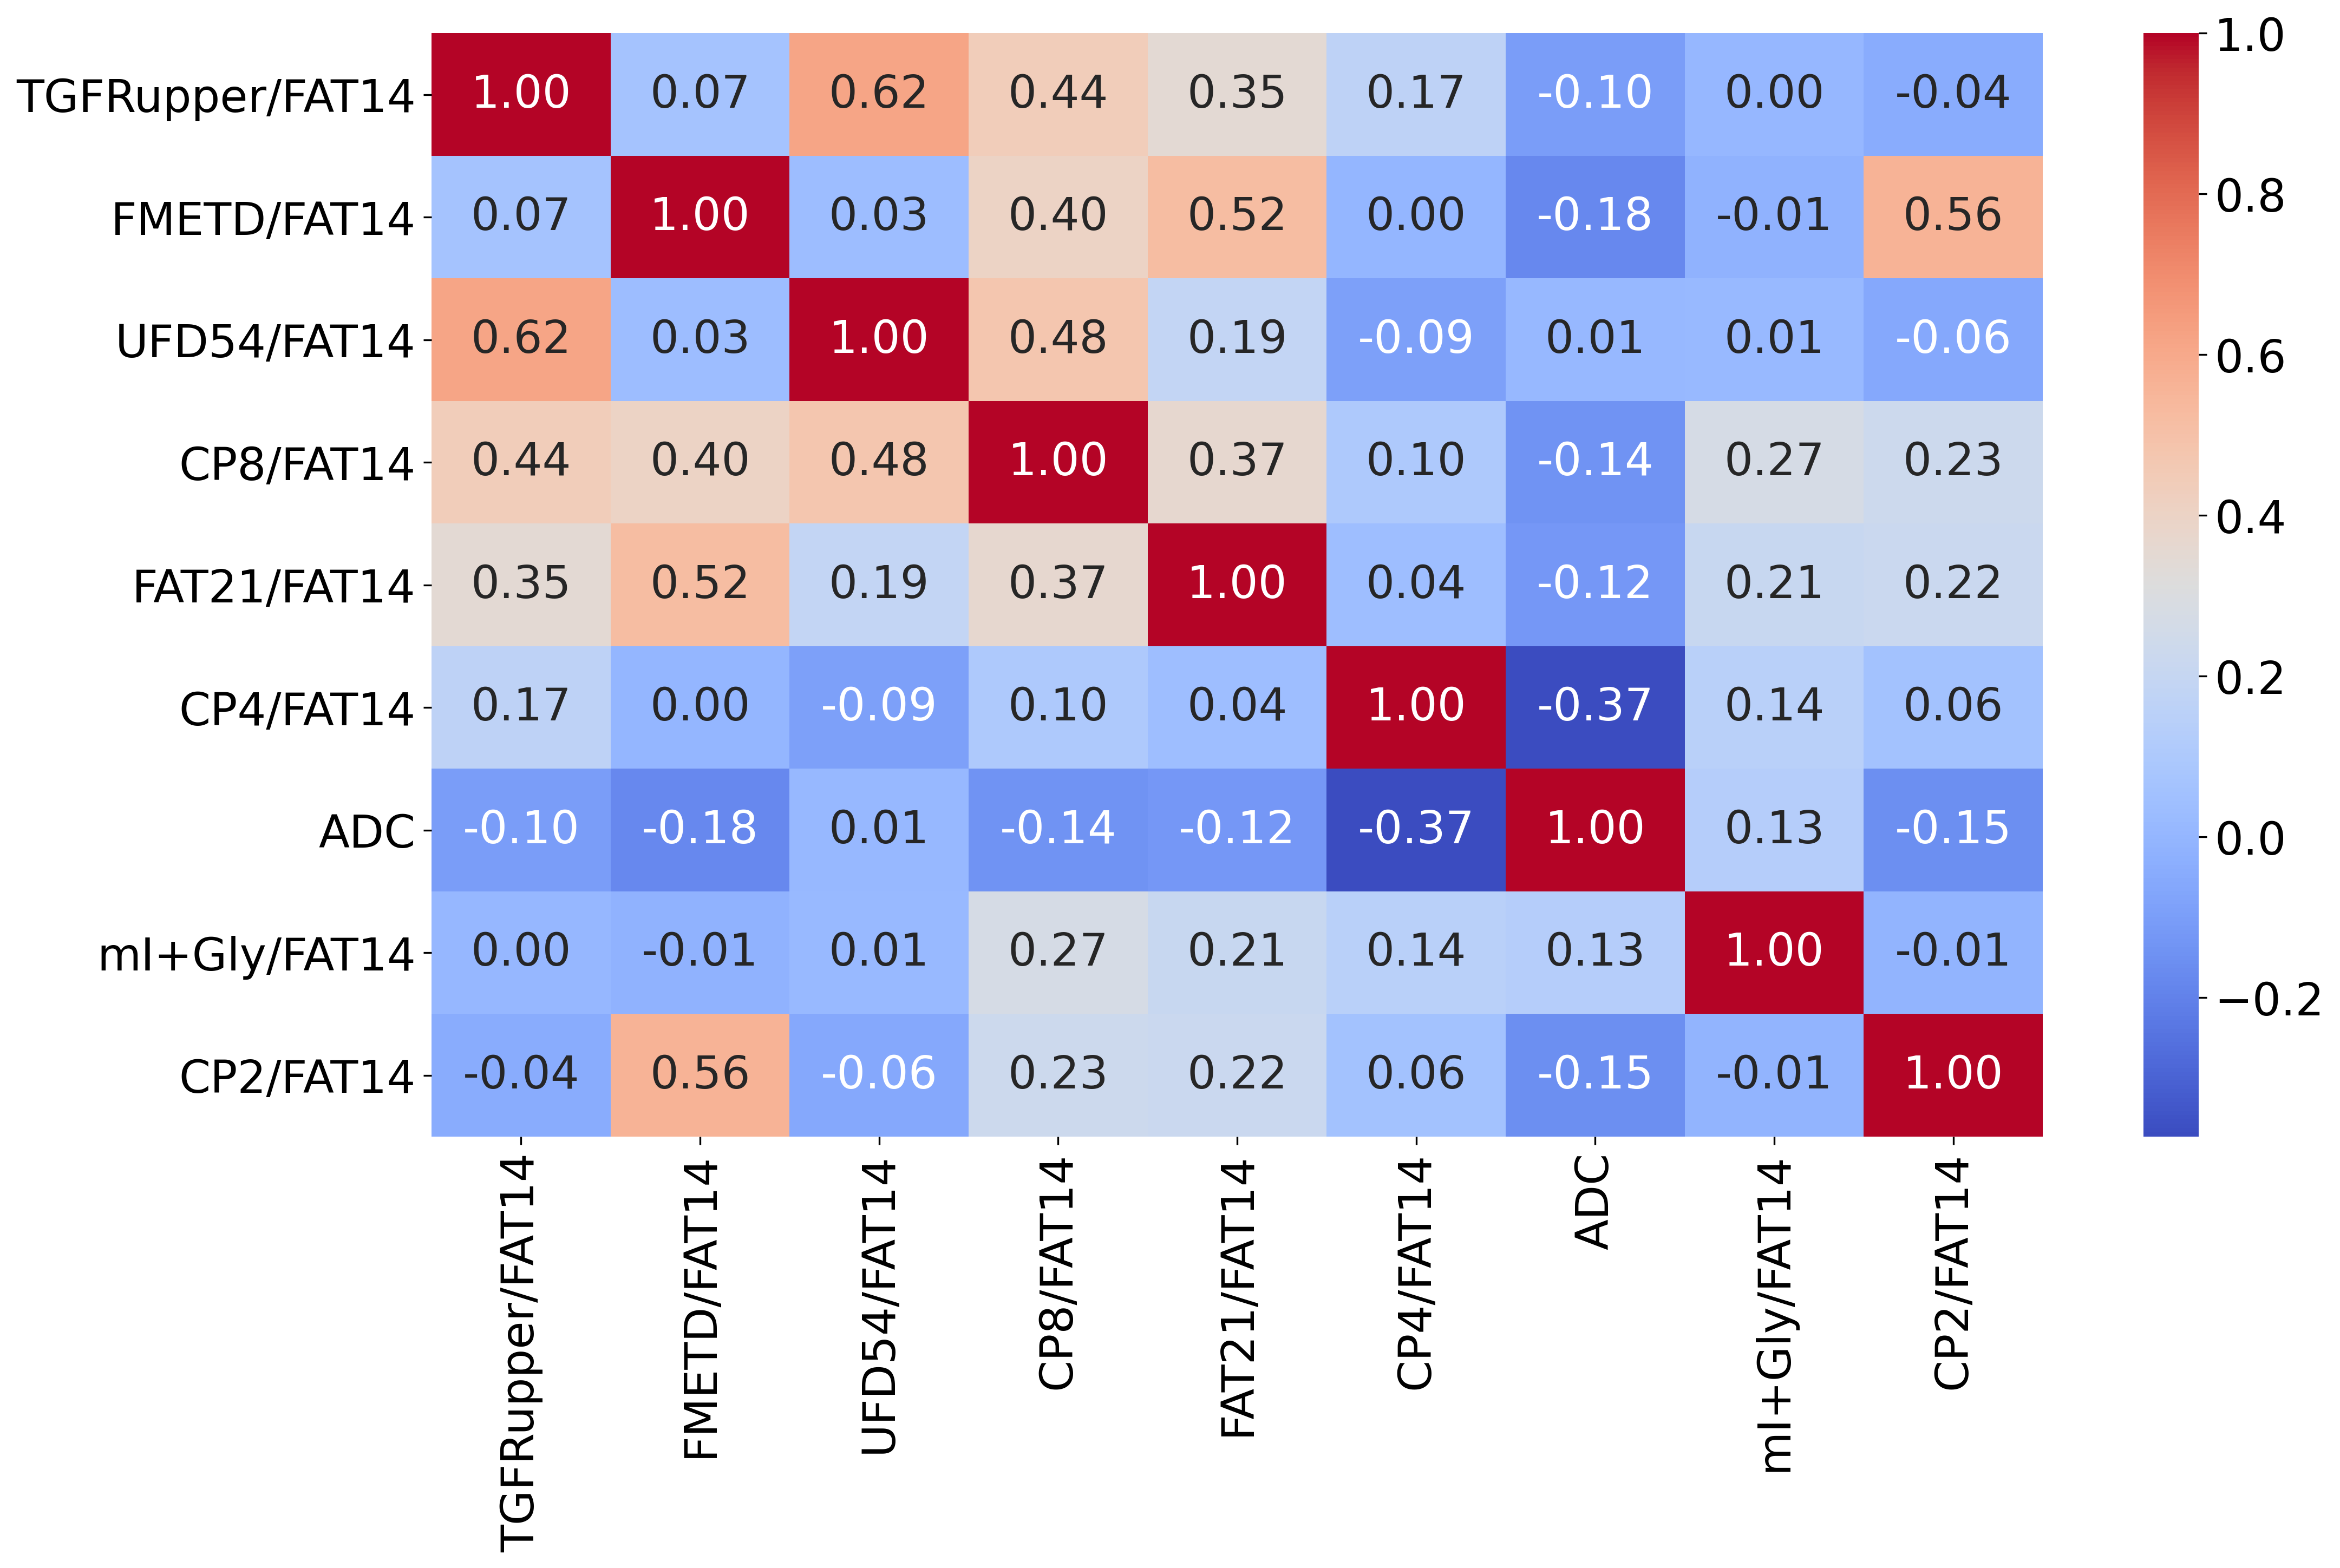

In [718]:

plt.figure(figsize=(16, 9), dpi=300)
ax = sns.heatmap(renamed[intername].corr(method='spearman'),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.gcf().axes[1].tick_params(labelsize=20)
# Set the title and labels

In [129]:
intervars =['triglycerylfatcrossp(TGFRupper) FAT14ratio', 'methylfat(FMETD10) FAT14ratio', 'olefinicfat(UFD54) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'adc', 'gly+myo FAT14ratio', 'fat(1p32_0p9) FAT14ratio']

### Sequential Feature Selection  



In [74]:
from sklearn.feature_selection import SequentialFeatureSelector

In [108]:

ldict = dict(zip(list(no_out.dataset.values),list(no_out.label.values)))
ldict

{'data005': 'benign',
 'data009': 'benign',
 'data012': 'benign',
 'data014': 'benign',
 'data015': 'benign',
 'data016': 'benign',
 'data018': 'benign',
 'data019': 'benign',
 'data022': 'benign',
 'data028': 'benign',
 'data032': 'benign',
 'data040': 'benign',
 'data044': 'benign',
 'dataBJF': 'benign',
 'dataDM': 'benign',
 'dataFN': 'benign',
 'dataMM': 'benign',
 'dataAH': 'malignant',
 'dataAM': 'malignant',
 'dataAST': 'malignant',
 'dataCJ': 'malignant',
 'dataEC': 'malignant',
 'dataEP': 'malignant',
 'dataFS': 'malignant',
 'dataGA': 'malignant',
 'dataGS': 'malignant',
 'dataHB': 'malignant',
 'dataJH': 'malignant',
 'dataKL': 'malignant',
 'dataKM': 'malignant',
 'dataLA': 'malignant',
 'dataLK': 'malignant',
 'dataLM': 'malignant',
 'dataLN': 'malignant',
 'dataLO': 'malignant',
 'dataLW': 'malignant',
 'dataMLT': 'malignant',
 'dataSM': 'malignant',
 'dataStB': 'malignant'}

In [102]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold



def get_tf(fold, ldict, groups, X, y):
    gs = set(groups)
    labels = [ldict[g] for g in gs]

    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=np.random.RandomState())

    test_fold = np.zeros(len(groups))
    for fold_index, (_, test_index) in enumerate(skf.split(np.zeros(len(gs)), labels)):
        selected_groups = [list(gs)[i] for i in test_index]
        selected_group_indices = np.where(np.isin(groups, selected_groups))[0]
        test_fold[selected_group_indices] = fold_index
        
        # Calculate and print the ratio of groups belonging to the two classes in the test set
        test_labels = [ldict[g] for g in selected_groups]
        unique_labels, label_counts = np.unique(test_labels, return_counts=True)
        ratio = label_counts / len(test_labels)
        print(f"Fold {fold_index + 1}: Class Ratio - Class 0: {ratio[0]}, Class 1: {ratio[1]},total length: {len(selected_group_indices)}")

    return test_fold.astype(int)


In [103]:

def plot_class_distribution(test_fold, y, fold):
    unique_folds = np.unique(test_fold)
    num_classes = np.unique(y)

    fig, axes = plt.subplots(len(unique_folds), 1, figsize=(8, 4 * len(unique_folds)), sharex=True)

    for i, fold_idx in enumerate(unique_folds):
        fold_data = y[test_fold == fold_idx]
        class_counts = np.bincount(fold_data, minlength=len(num_classes))

        axes[i].bar(num_classes, class_counts)
        axes[i].set_xticks(num_classes)
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'Class Distribution - Fold {fold_idx}')

    plt.tight_layout()
    plt.show()


Fold 1: Class Ratio - Class 0: 0.42857142857142855, Class 1: 0.5714285714285714,total length: 80
Fold 2: Class Ratio - Class 0: 0.3333333333333333, Class 1: 0.6666666666666666,total length: 65
Fold 3: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 69
Fold 4: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 64
Fold 5: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 72


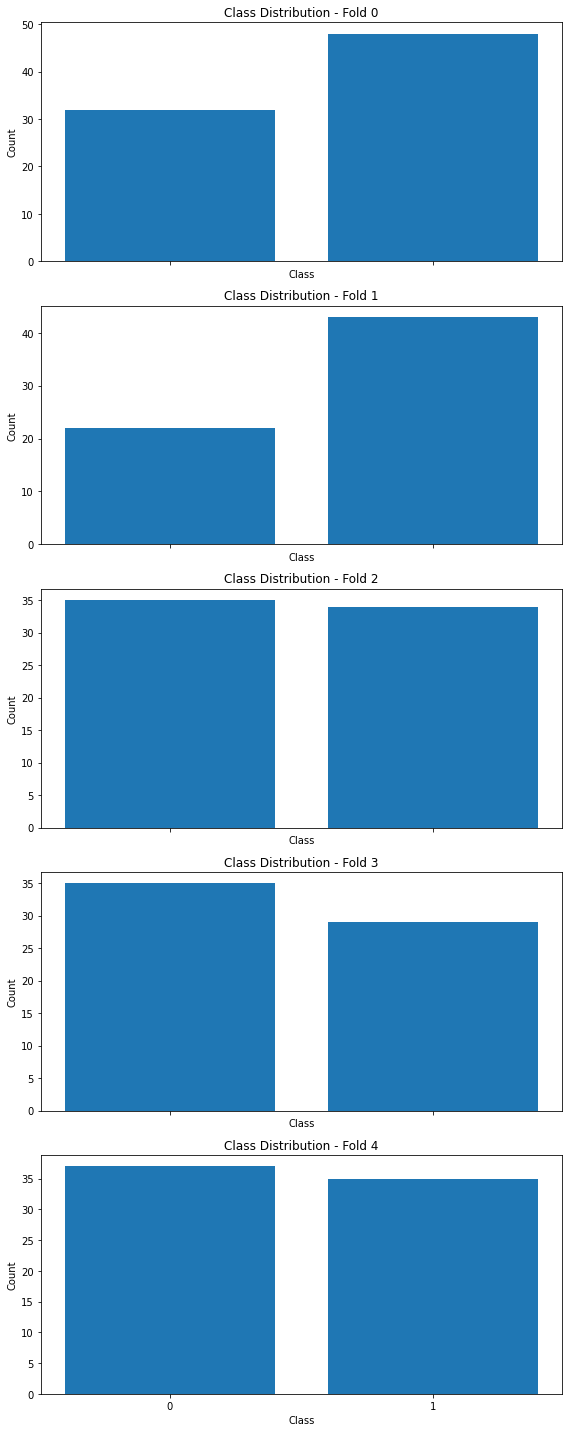

In [87]:
plot_class_distribution(get_tf(5,ldict,g_train,X_train,y_train),y_train,5)

In [109]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import PredefinedSplit

ps = PredefinedSplit(get_tf(5,ldict,g_train,X_train,y_train))
sfs = SFS(glf_opt, 
          k_features=30, 
          forward=True, 
          floating=False,
          scoring='accuracy',
          cv=ps)

sfs = sfs.fit(X_train, y_train)



Fold 1: Class Ratio - Class 0: 0.42857142857142855, Class 1: 0.5714285714285714,total length: 77
Fold 2: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 64
Fold 3: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 66
Fold 4: Class Ratio - Class 0: 0.5, Class 1: 0.5,total length: 72
Fold 5: Class Ratio - Class 0: 0.3333333333333333, Class 1: 0.6666666666666666,total length: 71


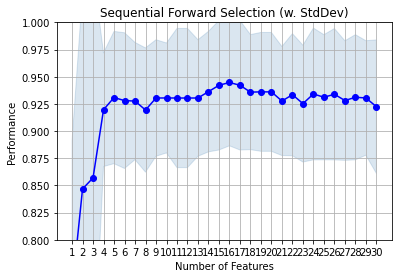

In [110]:

# Print selected features and importance
selected_features = []
importance_values = []
for idx,subset in sfs.subsets_.items():
    selected_features.append(subset['feature_names'])
    importance_values.append(subset['avg_score'])

# Plot the sequential feature selection results
fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [120]:
k = 30
sfsvar = []
metric_dict = sfs.get_metric_dict()
info = metric_dict[k]
print('----feature names-----')
for i in list(info['feature_idx']):
    print(varsmwu[i])
    sfsvar.append(varsmwu[i])


----feature names-----
methylenefat(FAT14) ratioFAT54_1d
methylenefat(FAT21) ratioFAT54_1d
unsatfatrightcrossp(UFRlower) ratioFAT54_1d
fat(1p32_0p9) ratioFAT54_1d
fat(1p64_2p36) ratioFAT54_1d
fat(2p36_1p64) ratioFAT54_1d
methylfat(FMETD10) FAT14ratio
methylenefat(FAT21) FAT14ratio
methylenefat(FAT29) FAT14ratio
fat39(fat39) FAT14ratio
olefinicfat(UFD54) FAT14ratio
unsatfatrightcrossp(UFRlower) FAT14ratio
triglycerylfatcrossp(TGFRupper) FAT14ratio
fat(1p32_0p9) FAT14ratio
fat(1p32_2p06) FAT14ratio
fat(4p2_3p9) FAT14ratio
gly+myo FAT14ratio
unsatfatrightcrossp(UFRupper) ratioFAT14_1d
triglycerylfatcrossp(TGFRlower) ratioFAT14_1d
fat(4p2_3p9) ratioFAT14_1d
methylenefat(FAT21) ratioWAT47_1d
unsatfatleftcrossp(UFLlower) ratioWAT47_1d
unsatfatrightcrossp(UFRupper) ratioWAT47_1d
unsatfatleftcrossp(UFLupper) ratioWAT47_1d
fat(1p32_2p06) ratioWAT47_1d
fat(2p06_1p32) ratioWAT47_1d
fat(3p9_4p3) ratioWAT47_1d
gly+myo ratioWAT47_1d
nws_wfratio
adc


In [631]:
sfsvar = ['methylenefat(FAT14) ratioFAT54_1d', 'methylenefat(FAT21) ratioFAT54_1d', 'unsatfatrightcrossp(UFRlower) ratioFAT54_1d', 'fat(1p32_0p9) ratioFAT54_1d', 'fat(1p64_2p36) ratioFAT54_1d', 'fat(2p36_1p64) ratioFAT54_1d', 'methylfat(FMETD10) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'methylenefat(FAT29) FAT14ratio', 'fat39(fat39) FAT14ratio', 'olefinicfat(UFD54) FAT14ratio', 'unsatfatrightcrossp(UFRlower) FAT14ratio', 'triglycerylfatcrossp(TGFRupper) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'fat(1p32_2p06) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'gly+myo FAT14ratio', 'unsatfatrightcrossp(UFRupper) ratioFAT14_1d', 'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d', 'fat(4p2_3p9) ratioFAT14_1d', 'methylenefat(FAT21) ratioWAT47_1d', 'unsatfatleftcrossp(UFLlower) ratioWAT47_1d', 'unsatfatrightcrossp(UFRupper) ratioWAT47_1d', 'unsatfatleftcrossp(UFLupper) ratioWAT47_1d', 'fat(1p32_2p06) ratioWAT47_1d', 'fat(2p06_1p32) ratioWAT47_1d', 'fat(3p9_4p3) ratioWAT47_1d', 'gly+myo ratioWAT47_1d', 'nws_wfratio', 'adc']

In [632]:
rfevar = [
'fat(1p32_0p9) ratioFAT54_1d',
'fat(2p06_1p32) ratioFAT54_1d',
'fat(3p9_4p3) ratioFAT54_1d',
'methylfat(FMETD10) FAT14ratio',
'methylenefat(FAT21) FAT14ratio',
'methylenefat(FAT23) FAT14ratio',
'methylenefat(FAT29) FAT14ratio',
'fat39(fat39) FAT14ratio',
'methyleneglycerolbackbone(MGB42) FAT14ratio',
'olefinicfat(UFD54) FAT14ratio',
'unsatfatrightcrossp(UFRlower) FAT14ratio',
'unsatfatleftcrossp(UFLupper) FAT14ratio',
'triglycerylfatcrossp(TGFRupper) FAT14ratio',
'fat(1p32_0p9) FAT14ratio',
'fat(1p64_2p36) FAT14ratio',
'fat(1p32_2p06) FAT14ratio',
'fat(2p06_1p32) FAT14ratio',
'fat(4p2_3p9) FAT14ratio',
'gly+myo FAT14ratio',
'methylenefat(FAT29) ratioFAT14_1d',
'unsatfatleftcrossp(UFLlower) ratioFAT14_1d',
'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d',
'fat(4p2_3p9) ratioFAT14_1d',
'methylfat(FMETD10) ratioWAT47_1d',
'tcholine(CHO32) ratioWAT47_1d',
'unsatfatleftcrossp(UFLlower) ratioWAT47_1d',
'fat(2p06_1p32) ratioWAT47_1d',
'fat(3p9_4p3) ratioWAT47_1d',
'gly+myo ratioWAT47_1d',
'adc']

In [122]:
inter = list(set(sfsvar).intersection(rfevar))
inter


['fat(3p9_4p3) ratioWAT47_1d',
 'adc',
 'methylenefat(FAT29) FAT14ratio',
 'fat(1p32_0p9) ratioFAT54_1d',
 'fat(4p2_3p9) FAT14ratio',
 'gly+myo ratioWAT47_1d',
 'triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio',
 'fat(4p2_3p9) ratioFAT14_1d',
 'methylenefat(FAT21) FAT14ratio',
 'fat(2p06_1p32) ratioWAT47_1d',
 'fat(1p32_2p06) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d',
 'unsatfatrightcrossp(UFRlower) FAT14ratio',
 'unsatfatleftcrossp(UFLlower) ratioWAT47_1d',
 'fat39(fat39) FAT14ratio',
 'gly+myo FAT14ratio']

### mRMR


In [ ]:
combovar = list(set(sfsvar+rfevar))
combovar
print(len(combovar))

In [107]:
set(sfsvar).intersection(set(rfevar))

{'fat(1p32_0p9) FAT14ratio',
 'fat(3p9_4p3) ratioWAT47_1d',
 'fat(4p2_3p9) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'methylfat(FMETD10) ratioWAT47_1d',
 'olefinicfat(UFD54) FAT14ratio',
 'tcholine(CHO32) ratioWAT47_1d',
 'unsatfatleftcrossp(UFLupper) FAT14ratio'}

In [635]:
for i in combovar:
    print(i)

fat(3p9_4p3) ratioWAT47_1d
triglycerylfatcrossp(TGFRupper) FAT14ratio
gly+myo FAT14ratio
fat(4p2_3p9) ratioFAT14_1d
adc
methylenefat(FAT21) FAT14ratio
gly+myo ratioWAT47_1d
fat(1p32_2p06) FAT14ratio
triglycerylfatcrossp(TGFRlower) ratioFAT14_1d
fat(1p32_0p9) FAT14ratio
fat(3p9_4p3) ratioFAT54_1d
methylfat(FMETD10) ratioWAT47_1d
olefinicfat(UFD54) FAT14ratio
fat(2p06_1p32) ratioWAT47_1d
unsatfatrightcrossp(UFRlower) ratioWAT47_1d
fat(2p06_1p32) ratioFAT54_1d
fat(4p2_3p9) FAT14ratio
unsatfatleftcrossp(UFLlower) ratioFAT14_1d
unsatfatleftcrossp(UFLupper) FAT14ratio
methylenefat(FAT23) FAT14ratio
unsatfatrightcrossp(UFRlower) FAT14ratio
methylenefat(FAT29) ratioFAT14_1d
fat(1p32_0p9) ratioFAT54_1d
fat(2p06_1p32) FAT14ratio
tcholine(CHO32) ratioWAT47_1d
fat39(fat39) FAT14ratio
unsatfatrightcrossp(UFRupper) ratioFAT54_1d
methylfat(FMETD10) FAT14ratio
methyleneglycerolbackbone(MGB42) FAT14ratio
unsatfatleftcrossp(UFLlower) ratioWAT47_1d
methylenefat(FAT29) FAT14ratio
fat(1p64_2p36) FAT14ratio

In [642]:
!pip install mrmr-selection

     |████████████████████████████████| 81 kB 121 kB/s eta 0:00:01


In [647]:
!pip install polars

     |████████████████████████████████| 17.7 MB 1.4 MB/s eta 0:00:01


In [103]:


# Assuming X is your feature matrix, y is the target variable, and combovar is the DataFrame containing feature names
Xmrmr = train[varsmwu]
ymrmr = y_train
features = varsmwu



In [106]:
Xmrmr.shape

(350, 87)

In [132]:

from mrmr import mrmr_classif
#selected_features = mrmr_classif(X=Xmrmr, y=ymrmr, K=30)
(selected_features, relevance, redundancy) = mrmr_classif(X=Xmrmr, y=ymrmr, K=30, return_scores=True)



100%|██████████| 30/30 [00:00<00:00, 30.08it/s]


In [105]:

print("Selected Features:")
for i in selected_features:
    print(i)

Selected Features:
adc
tcholine(CHO32) FAT14ratio
methylenefat(FAT21) FAT14ratio
fat(4p2_3p9) FAT14ratio
fat(2p06_1p32) FAT14ratio
nws_wfrac
methyleneglycerolbackbone(MGB42) FAT14ratio
fat(1p64_2p36) FAT14ratio
nws_ffrac
fat39(fat39) FAT14ratio
fat(1p32_0p9) FAT14ratio
methylenefat(FAT23) FAT14ratio
olefinicfat(UFD54) FAT14ratio
methylfat(FMETD10) FAT14ratio
fat(1p32_2p06) FAT14ratio
fat(2p06_1p32) ratioFAT54_1d
nws_wfratio
fat(1p32_0p9) ratioFAT54_1d
fat(2p06_1p32) ratioWAT47_1d
tcholine(CHO32) ratioWAT47_1d
unsatfatrightcrossp(UFRlower) FAT14ratio
fat(2p06_1p32) ratioFAT14_1d
triglycerylfatcrossp(TGFRupper) FAT14ratio
fat(1p32_0p9) ratioWAT47_1d
methylenefat(FAT29) FAT14ratio
fat(1p32_0p9) ratioFAT14_1d
methylenefat(FAT14) ratioFAT54_1d
methylenefat(FAT14) ratioWAT47_1d
fat(1p32_2p06) ratioFAT54_1d
methylenefat(FAT21) ratioFAT14_1d


In [134]:
relevance

methylfat(FMETD10) ratioFAT54_1d       1.746866
methylenefat(FAT14) ratioFAT54_1d     14.627346
methylenefat(FAT21) ratioFAT54_1d      7.107215
methylenefat(FAT23) ratioFAT54_1d      6.724344
methylenefat(FAT29) ratioFAT54_1d      2.058143
                                        ...    
gly+myo ratioWAT47_1d                  1.083895
nws_ffrac                             76.227866
nws_wfratio                           26.835626
nws_wfrac                             76.227868
adc                                  314.772300
Length: 87, dtype: float64

### auc analysis

In [653]:
#sanity check
print(train.shape)
print(test.shape)

(350, 102)
(86, 102)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Initialize an empty dictionary to store cross-validated AUC scores
auc_scores = {}

# Iterate over the features in combovar
for feature in combovar:
    X_selected = np.array(train[[feature]])
    cv_scores = cross_val_score(glf_opt, X_selected.reshape(-1, 1), y_train, groups=g_train, scoring='roc_auc', cv=StratifiedGroupKFold(5))

    # Calculate the average AUC score for the current feature
    avg_auc = cv_scores.mean()

    # Store the average AUC score in the dictionary
    auc_scores[feature] = avg_auc
    sorted_auc_scores = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)


In [661]:

# Print the average AUC scores for each feature
for feature, auc in sorted_auc_scores:
    print(f"Feature: {feature}, Average AUC: {auc}")


Feature: methylenefat(FAT23) FAT14ratio, Average AUC: 0.8598926970365313
Feature: fat(4p2_3p9) FAT14ratio, Average AUC: 0.8061738796998714
Feature: adc, Average AUC: 0.7417899252724345
Feature: methylenefat(FAT21) FAT14ratio, Average AUC: 0.7394211976545375
Feature: fat(1p32_0p9) FAT14ratio, Average AUC: 0.7056716090241594
Feature: fat(2p06_1p32) FAT14ratio, Average AUC: 0.6981610297395914
Feature: fat(1p32_0p9) ratioFAT54_1d, Average AUC: 0.6705584813206467
Feature: methyleneglycerolbackbone(MGB42) FAT14ratio, Average AUC: 0.6672563443982243
Feature: fat(1p64_2p36) FAT14ratio, Average AUC: 0.6483609342256987
Feature: methylfat(FMETD10) FAT14ratio, Average AUC: 0.6481851472089893
Feature: fat39(fat39) FAT14ratio, Average AUC: 0.6443148718261089
Feature: fat(2p06_1p32) ratioFAT54_1d, Average AUC: 0.620685646351564
Feature: fat(1p32_2p06) FAT14ratio, Average AUC: 0.6146309686665363
Feature: methylenefat(FAT29) ratioFAT14_1d, Average AUC: 0.6144913039211456
Feature: fat(2p06_1p32) ratioWA

### auc = 0.65 in train

In [ ]:
top_features = [feature for feature, _ in sorted_auc_scores[:8]]

In [44]:
combovar = ['methylenefat(FAT23) FAT14ratio','fat(4p2_3p9) FAT14ratio','adc','methylenefat(FAT21) FAT14ratio',
'fat(1p32_0p9) FAT14ratio','fat(2p06_1p32) FAT14ratio','fat(1p32_0p9) ratioFAT54_1d',
'methyleneglycerolbackbone(MGB42) FAT14ratio',
'fat(1p64_2p36) FAT14ratio','methylfat(FMETD10) FAT14ratio']


### heatmap

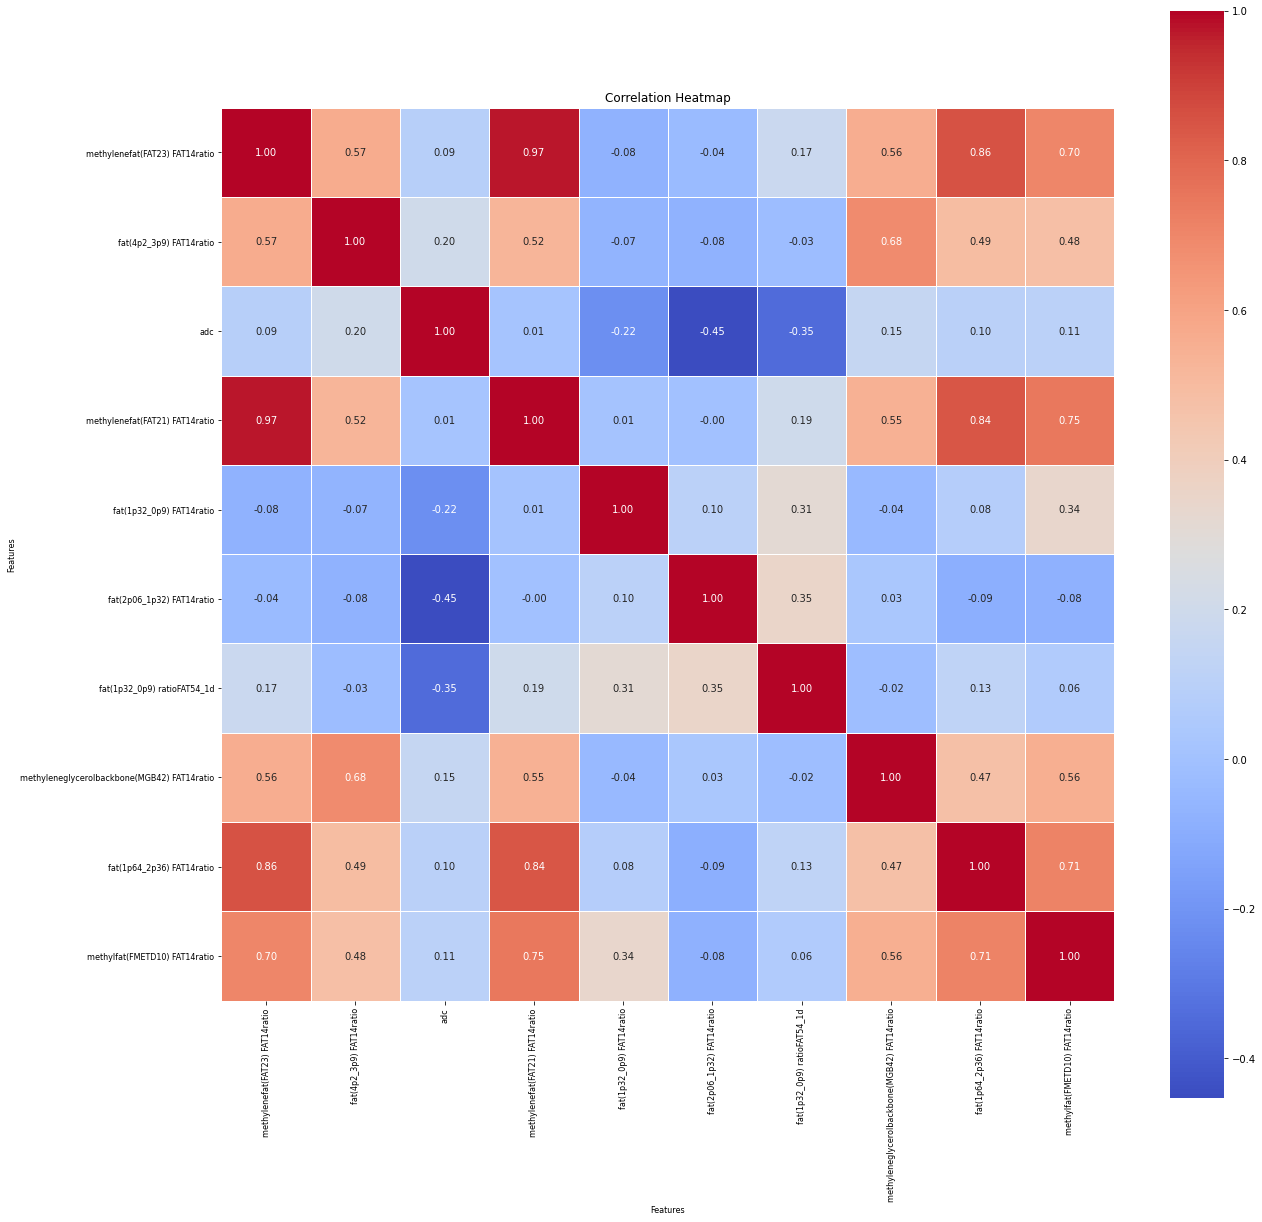

In [49]:


# Assuming `combovar` is a correlation matrix or DataFrame
topvar = train[combovar]


# Assuming `combovar` is a correlation matrix or DataFrame

plt.figure(figsize=(20,20))
sns.heatmap(topvar.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.xlabel("Features", fontsize=8)
plt.ylabel("Features", fontsize=8)
plt.xticks(np.arange(len(combovar))+0.5, combovar, rotation=90, fontsize=8)
plt.yticks(np.arange(len(combovar))+0.5, combovar, rotation=0, fontsize=8)
plt.show()


### (SKIP) Repeated feature selection 
```{python}
def rep_refcv(dat,vars,rep,mdl,name):
    ct_dict = dict()
    for i in range(rep):
        X_train,X_test,y_train,y_test,g_train,g_test = biutils.tts(dat,vars)
        cv =  StratifiedGroupKFold(5)
        
        rfecv = RFECV(
            estimator=mdl,
            step=1,
            cv=cv,
            scoring="accuracy",
            min_features_to_select=min_features_to_select,
            n_jobs=2,
        )
        rfecv.fit(X_train, y_train,
            groups = g_train)
    
        feat = dat[vars].columns[rfecv.get_support(1)]
        for i in range(len(feat)):
            feature = feat[i]
            ct_dict.update({feature:ct_dict.get(feature,0)+1})

    ct_dict = sorted(ct_dict.items(), key=lambda x:x[1],reverse=True)
    print(ct_dict)
    return ct_dict

        

names = ["Linear SVM","Random Forest","Extra Tree","GradientBoost","XGBoost"]
mdls = [SVC(kernel="linear", random_state = 42),
     RandomForestClassifier(n_estimators=200,random_state=42),
    ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2,random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42,warm_start=False),
    xgb.XGBRFClassifier(objective="binary:logistic",random_state = 42),
    ]

f_dict= dict()
for i in range(len(mdls)):
print(i)
f_dict.update(rep_refcv(no_out,varsmwu,50,mdls[i],names[i]))
f_dict
```


### (SKIP) Boruta feature selection algorithm
``` python
from boruta import BorutaPy
# define Boruta feature selection method
gglf = glf_opt
feat_selector = BorutaPy(gglf, n_estimators='auto', verbose=2, random_state=1)
# find all relevant features
feat_selector.fit(X_train,y_train,groups=g_train)

feature_ranks = list(zip(X.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
```

## Hyperparameter Optimization II 

### SVC

In [130]:
intervars

['triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio',
 'fat(4p2_3p9) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'fat(2p06_1p32) ratioWAT47_1d',
 'adc',
 'gly+myo FAT14ratio',
 'fat(1p32_0p9) FAT14ratio']

In [131]:
# Optimize linear SVM
lsvc = SVC(kernel="linear", random_state = 42)
svm_grid = {'C': [0.01,0.02,0.05,0.1,0.15,0.2]} 
svm_gridcv = GridSearchCV(lsvc, svm_grid, verbose = 0,cv = StratifiedGroupKFold(5))
svm_gridcv.fit(train[intervars],y_train,groups=g_train)
print(svm_gridcv.best_estimator_)
print(svm_gridcv.best_score_)


SVC(C=0.05, kernel='linear', random_state=42)
0.838823197263095


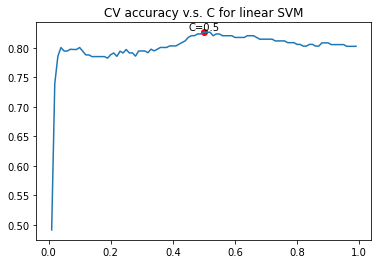

In [132]:

sc = []
cc = []
C = np.arange(0.01,1,0.01)
for i in C:
    svct = SVC(kernel="linear",C = i, random_state = 42)
    scc = np.mean(cross_val_score(svct,train[finalvars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'C='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. C for linear SVM')
plt.show()


In [ ]:
fsvm_opt = SVC(C=0.5, kernel='linear', random_state=42)

### Ada

In [134]:
ada_grid = dict()

# estimator till 500
ada_grid['n_estimators'] = np.arange(10,200,10)

# defining learning rate
ada_grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.5]


ada_grid['base_estimator__max_depth']= [1, 3, 5, 10, 20]
ada_grid['base_estimator__max_features']=[0.6, 0.8, 1.0]
adamdl = AdaBoostClassifier(DecisionTreeClassifier(),random_state = 42)
ada_gridcv = GridSearchCV(estimator=adamdl, param_grid=ada_grid,cv=StratifiedGroupKFold(5))
ada_gridcv.fit(train[intervars],y_train,groups=g_train)
print(ada_gridcv.best_estimator_)
print(ada_gridcv.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.8),
                   learning_rate=0.01, n_estimators=180, random_state=42)
0.9182206626872629


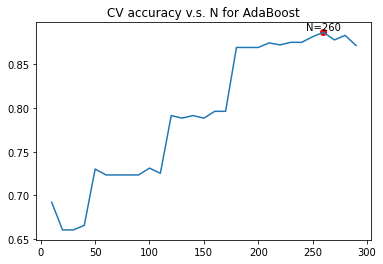

In [139]:

sc = []
cc = []
n = np.arange(10,300,10)
for i in n:
    mdl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.8),
                   learning_rate=0.01, n_estimators=i, random_state=42)
    scc = np.mean(cross_val_score(mdl,X_train,y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'N='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for AdaBoost')
plt.show()


In [ ]:
fada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.8),
                   learning_rate=1.5, n_estimators=260, random_state=42)
                   

### RF

In [135]:
n_estimators = np.arange(1,200,50)
# Maximum number of levels in tree
max_depth = [1,3,5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc = RandomForestClassifier(random_state=42)
r_cv = GridSearchCV(rfc, random_grid, verbose = 0,cv = StratifiedGroupKFold(5))
r_cv.fit(train[intervars],y_train,groups=g_train)
print(r_cv.best_estimator_)
print(r_cv.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=151, random_state=42)
0.8957820590552827


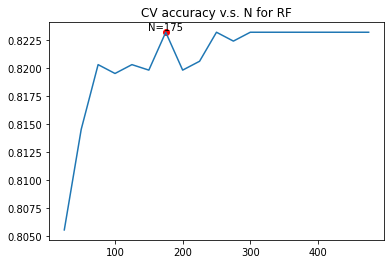

In [144]:

sc = []
cc = []
n = np.arange(25,500,25)
for i in n:
    mdl = RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=i, random_state=42)
    scc = np.mean(cross_val_score(mdl,train[finalvars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'N='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for RF')
plt.show()


In [435]:

frf_opt = RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=175,
                       random_state=42)

### GB

In [147]:
learning_rates = [1, 0.5,0.1]
n_estimators = np.arange(10,200,10)
max_depths = [2, 3, 5, 10,20,30]
min_samples_split = np.linspace(0.1, 1.0, 3, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 3, endpoint=True)


# Define the grid of hyperparameters to search
glf_grid = {
    'max_depth':max_depths,
    'learning_rate':learning_rates,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leafs
    }

    #parameters = {
    #"loss":["deviance"],
    #"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
   # "min_samples_split": np.linspace(0.1, 0.5, 12),
   # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
   # "max_depth":[3,5],
   # "max_features":["log2","sqrt"],
   # "criterion": ["friedman_mse",  "mae"],
   # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #"n_estimators":[10,50,200]
    #}


glf = GradientBoostingClassifier(random_state=42,warm_start=False)
glf_gridcv = GridSearchCV(glf, glf_grid,cv=StratifiedGroupKFold(5))
glf_gridcv.fit(train[intervars],y_train,groups=g_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': array([0.1, 0.3, 0.5]),
                         'min_samples_split': array([0.1 , 0.55, 1.  ])})

In [148]:
print(glf_gridcv.best_estimator_)
print(glf_gridcv.best_score_)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=1.0, random_state=42)
0.8998168115641783


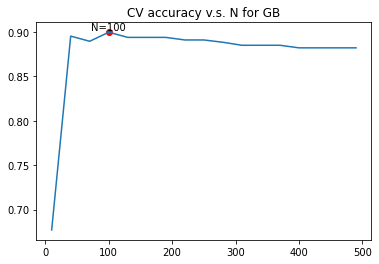

In [150]:

sc = []
cc = []
n = np.arange(10,500,30)
for i in n:
    mdl = GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=1.0, random_state=42,n_estimators=i)
    scc = np.mean(cross_val_score(mdl,train[intervars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'N='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for GB')
plt.show()


In [441]:

fglf_opt = GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=4,n_estimators=100)

### XGB

In [137]:
# xgb grid
#base_score=[0.25,0.5,1]
n_estimators = np.arange(10,200,20)
max_depth = [2, 3, 5, 10]
booster=['gbtree']
learning_rate=[0.1,0.5,1]
min_child_weight=[1,2,3]

# Define the grid of hyperparameters to search
xgb_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    #'base_score':base_score
    }

xgbc = xgb.XGBClassifier(random_state = 42)
xgb_gridcv = GridSearchCV(xgbc, xgb_grid,cv=StratifiedGroupKFold(5))
xgb_gridcv.fit(train[intervars],y_train,groups=g_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     import...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [2, 3, 5, 10],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])})

In [142]:
print(xgb_gridcv.best_estimator_)
print(xgb_gridcv.best_score_)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
0.8990075228858878


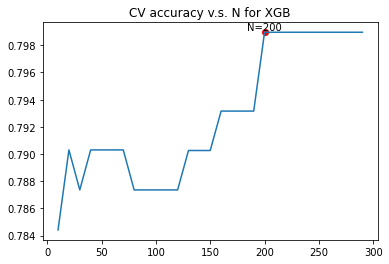

In [149]:

sc = []
cc = []
n = np.arange(10,300,10)
for i in n:
    mdl = xgb.XGBClassifier( booster='gbtree',  learning_rate=0.1, max_depth=3, max_leaves=None,
              min_child_weight=3, n_estimators=i, predictor=None, random_state=42)
    scc = np.mean(cross_val_score(mdl,train[finalvars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'N='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for XGB')
plt.show()


In [448]:

fxgb_opt = xgb.XGBClassifier( booster='gbtree',  learning_rate=0.1, max_depth=2, max_leaves=None,
              min_child_weight=3, 
              n_estimators=200,
              predictor=None, random_state=42)

### DT BAG

In [138]:
dt_grid ={'bootstrap': [True, False],
'bootstrap_features': [True, False],    
'n_estimators': [5, 10, 15],
'max_samples' : [0.6, 0.8, 1.0],   
'base_estimator__max_depth' : [1, 2, 3, 4, 5, 10, 20, 50],
'base_estimator__max_features' : [0.6, 0.8, 1.0]}


dtc = DecisionTreeClassifier(random_state = 42)
baggingdt = BaggingClassifier(dtc,random_state = 42)
bagdt_cv = GridSearchCV(baggingdt,dt_grid, verbose = 0,cv = StratifiedGroupKFold(5))
bagdt_cv.fit(train[intervars],y_train,groups=g_train)
print(bagdt_cv.best_estimator_)
print(bagdt_cv.best_score_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        max_features=0.6,
                                                        random_state=42),
                  bootstrap=False, bootstrap_features=True, max_samples=0.6,
                  n_estimators=15, random_state=42)
0.9165631939115835


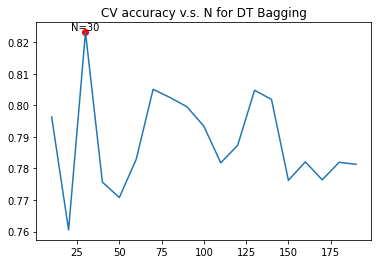

In [151]:

sc = []
cc = []
n = np.arange(10,200,10)
for i in n:
    mdl = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        max_features=0.6,
                                                        random_state=42),
                  bootstrap=False, bootstrap_features=True, max_samples=0.6,
                  n_estimators=i, random_state=42)
    scc = np.mean(cross_val_score(mdl,train[finalvars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)
    cc.append(i)

plt.scatter(cc[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(cc,sc)
plt.text(cc[sc.index(max(sc))], max(sc), 'N='+str(cc[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for DT Bagging')
plt.show()


In [451]:

fdt_opt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_features=0.6,
                                                        random_state=42),
                  bootstrap_features=True, max_samples=0.8, n_estimators=30,
                  random_state=42)

### CatBoost

In [564]:
X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,finalvars,rs=42)

In [565]:
X_train.shape

(350, 7)

In [453]:
catm = CatBoostClassifier(verbose=0)
grid = {'learning_rate': [0.03, 0.1,0.1],
        'n_estimators': [10, 50, 100, 150, 200]
        }

#grid_search_result = catm.grid_search(grid, cv = StratifiedGroupKFold(5),
                                      # X=X_train, 
                                      # y=y_train, 
                                       #plot=True)
#grid_search_result['params']

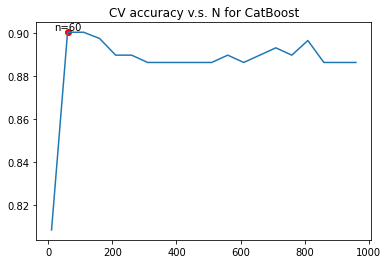

In [152]:
sc = []
steps = np.arange(10,1000,50)
for i in steps:
    classifier = CatBoostClassifier(**{'n_estimators':i},verbose=0)
    scc = np.mean(cross_val_score(classifier,train[intervars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)



plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. N for CatBoost')
plt.show()

In [456]:

fcat_opt =  CatBoostClassifier(**{'n_estimators':60},random_state=42,verbose=0)
    

### Decision tree

In [265]:
tree = DecisionTreeClassifier(max_depth=5),#,random_state = 42
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15,20,30,40,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=StratifiedGroupKFold(5))
grid_search.fit(train[intervars], y_train,groups=g_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print(grid_search.best_estimator_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7407824146607795
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


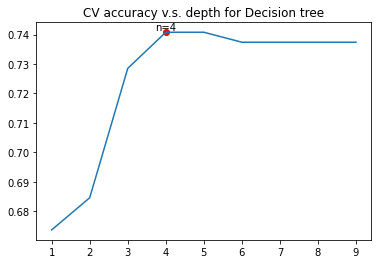

In [274]:
sc = []
steps = np.arange(1,10,1)
for i in steps:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    scc = np.mean(cross_val_score(classifier,train[intervars],y_train,cv=StratifiedGroupKFold(5),verbose=0,groups=g_train))
    sc.append(scc)

plt.scatter(steps[sc.index(max(sc))], max(sc), marker='o', color='red')
plt.plot(steps,sc)
plt.text(steps[sc.index(max(sc))], max(sc), 'n='+str(steps[sc.index(max(sc))]), ha='center', va='bottom')
plt.title('CV accuracy v.s. depth for Decision tree')
plt.show()

In [275]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## Repeated validations

The swarm plots (repetitions) consist of 
1) cross-val: repeated stratified k fold validations (10 repetitions, 5 fold), plotting all scores/all means
2) testing: random split test train differently. perhaps also 50, not specified, just *a large number of iterations*

models: 

evars (selected by running recursive feature elimination algorithm on the XGBoost) 

### Model comparisons

Specification: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Refitting and updating parameters parts. Calling fit more than once would overwrite previous memory of the same model


In [35]:
from sklearn.metrics import f1_score, accuracy_score,roc_auc_score

#original
```python
svc_opt = SVC(kernel="linear", C = 0.1,random_state=np.random.RandomState(),probability=True)
bt_opt = BaggingClassifier(DecisionTreeClassifier(max_depth=5),
                  bootstrap_features=True, max_samples=0.6, n_estimators=5,random_state=np.random.RandomState())
rf_opt = RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=10, random_state=np.random.RandomState())
ada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_features=0.6),
                   learning_rate=0.01, n_estimators=10, random_state=np.random.RandomState())
glf_opt = GradientBoostingClassifier(n_estimators=100, random_state=np.random.RandomState(),warm_start=False, min_samples_leaf=0.1,
                           min_samples_split=1.0)
xgb_opt = xgb.XGBClassifier(objective="binary:logistic",booster='gbtree', learning_rate=1,  max_depth=5,
              min_child_weight=2, 
              n_estimators=100,  random_state=np.random.RandomState())
cat_opt = CatBoostClassifier(**{'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},verbose=0)
```

#one time opt


In [248]:
svc_opt = SVC(kernel="linear", C = 0.02,random_state = np.random.RandomState())
bt_opt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        max_features=1.0,
                                                        random_state=np.random.RandomState()),
                  bootstrap_features=True, max_samples=0.6, n_estimators=13,
                  random_state=np.random.RandomState())
rf_opt = RandomForestClassifier(bootstrap=False, max_depth=5, 
        n_estimators = 40,min_samples_split=10, random_state=np.random.RandomState())
ada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.6),
                   learning_rate=0.1, n_estimators=100, random_state=np.random.RandomState())
glf_opt = GradientBoostingClassifier(n_estimators =50 ,learning_rate=0.5, max_depth=10,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           random_state=np.random.RandomState())
xgb_opt = xgb.XGBClassifier(booster='gblinear',learning_rate=0.1, max_depth=5, 
    max_leaves=None,min_child_weight=3,
              n_estimators=20,  random_state=np.random.RandomState())

cat_opt = CatBoostClassifier(**{'n_estimators':310,'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},
verbose=0)

In [251]:
mdls = [svc_opt,bt_opt,rf_opt,ada_opt,glf_opt,xgb_opt,cat_opt]
names = ["Linear SVM","DT-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]

#twice

In [256]:

fada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         max_features=0.6),
                   n_estimators=70, random_state=np.random.RandomState())
fsvm_opt = SVC(C=0.05, kernel='linear', random_state=np.random.RandomState())
frf_opt = RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=150,
                       random_state=np.random.RandomState())
fglf_opt = GradientBoostingClassifier(min_samples_leaf=0.1,n_estimators=40, min_samples_split=0.55,
                           random_state=np.random.RandomState())
fxgb_opt = xgb.XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, max_leaves=None,
              min_child_weight=3, 
              n_estimators=90, random_state=np.random.RandomState())
fdt_opt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        max_features=0.6,
                                                        random_state=np.random.RandomState()),
                  bootstrap_features=True, max_samples=0.8, n_estimators=20,
                  random_state=np.random.RandomState())
fcat_opt =  CatBoostClassifier(**{'n_estimators':60,'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},verbose=0)
    

In [257]:
mdls = [fsvm_opt,fdt_opt,frf_opt,fada_opt,fglf_opt,fxgb_opt,fcat_opt]
names = ["Linear SVM","DT-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]

#finalvars 7 

In [41]:
def randcat():
    rs = np.random.randint(43219)
    return CatBoostClassifier(**{'n_estimators':110},verbose=0,random_state = rs)
svc3 = SVC(C=0.5, kernel='linear', random_state=np.random.RandomState())
ada3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.8),
                   learning_rate=1.5, n_estimators=170, random_state=np.random.RandomState())

rf3 = RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=200,
                       random_state=np.random.RandomState())
gb3 = GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=np.random.RandomState(),n_estimators=100)
xgb3 =  xgb.XGBClassifier( booster='gbtree',  learning_rate=0.1, max_depth=2, max_leaves=None,
              min_child_weight=3, 
              n_estimators=200,
              predictor=None, random_state=np.random.RandomState())
dt3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_features=0.6,
                                                        random_state=np.random.RandomState()),
                  bootstrap_features=True, max_samples=0.8, n_estimators=30,
                  random_state=np.random.RandomState())
cat3 = randcat()
    

In [42]:
mdls = [svc3,ada3,rf3,gb3,xgb3,dt3,cat3]
names = ["Linear SVM","DT-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]

#four

In [472]:
def randcat4():
    rs = np.random.randint(43219)
    return CatBoostClassifier(**{'n_estimators':60},random_state=rs,verbose=0)
def randsvc(C):
    rs = np.random.RandomState()
    svcm = SVC(C=C, kernel='linear',probability = True,random_state = rs)
    return svcm

    
ada4 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.8),
                   learning_rate=1.5, n_estimators=260, random_state=np.random.RandomState())
svm4 = randsvc(0.5)

cat4 =  randcat4()
rf4 = RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=175,
                       random_state=np.random.RandomState())
glf4 = GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=4,n_estimators=100)
xgb4 = xgb.XGBClassifier( booster='gbtree',  learning_rate=0.1, max_depth=2, max_leaves=None,
              min_child_weight=3,  n_estimators=200, predictor=None, random_state=np.random.RandomState())
dt4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_features=0.6,
                                                        random_state=np.random.RandomState()),
                  bootstrap_features=True, max_samples=0.8, n_estimators=30,
                  random_state=np.random.RandomState())
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=np.random.RandomState())

In [473]:
glf4

GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=4)

In [474]:
mdls = [tree4,svm4,dt4,rf4,ada4,glf4,xgb4,cat4]
names = ["Decision Tree","Linear SVM","DT-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]

#### cross-validation repeat

In [279]:
X = no_out[intervars]
print(X.shape)
y =  LabelEncoder().fit_transform(no_out.label)

(436, 9)


reorder the models as how they would appear in the graph from left to right (1, 2, 3, ...)

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.metrics import confusion_matrix

# Empty lists to store scores
f1 = []
auc = []
acc = []
precision = []
recall = []
specificity = []
sensitivity = []
mdl_names = []

def confusion_matrix_scorer(clf, X, y):
       y_pred = clf.predict(X)
       cm = confusion_matrix(y, y_pred)
       return {'tn': cm[0, 0], 'fp': cm[0, 1],
              'fn': cm[1, 0], 'tp': cm[1, 1]}

for i in range(20):
    for k in range(len(names)):
        mdl = mdls[k]
        if names[k] != 'CatBoost':
            mdl.set_params(**{'random_state': np.random.randint(1000)})
        cvresult = cross_validate(mdl, X, y, groups=list(no_out.dataset), scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], cv=StratifiedGroupKFold(5), verbose=0)
        cm = cross_validate(mdl, X, y, groups=list(no_out.dataset), scoring=confusion_matrix_scorer, cv=StratifiedGroupKFold(5), verbose=0)
       
        tn = cm['test_tn']
        fp = cm['test_fp']
        fn = cm['test_fn']
        tp = cm['test_tp']
        
    
        f1 += list(cvresult['test_f1'])
        acc += list(cvresult['test_accuracy'])
        auc += list(cvresult['test_roc_auc'])
        precision += list(cvresult['test_precision'])
        recall += list(cvresult['test_recall'])
        mdl_names += [names[k] for i in range(5)]
        sensitivity += list(tp / (tp + fn))
        specificity += list(tn / (tn + fp))

# Create DataFrame
cvdf = pd.DataFrame({'F1_score': f1, 'Accuracy': acc, 'AUC': auc, 'Precision': precision, 'Recall': recall, 'Specificity': specificity, 'Sensitivity': sensitivity, 'Model': mdl_names})
melted = cvdf.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
melted.to_csv('fv_cv_4.csv')


In [305]:
colors = [
    (1.0, 0.85, 0.85),   # Very Light Red
    (1.0, 0.9, 0.8),     # Very Light Orange
    (1.0, 1.0, 0.85),    # Very Light Yellow
    (0.85, 1.0, 0.85),   # Very Light Green
    (0.85, 0.85, 1.0),   # Very Light Blue
    (0.9, 0.85, 1.0),    # Very Light Indigo
    (1.0, 0.85, 1.0),    # Very Light Violet
    (1.0,0.9,0.9)
]

colors2= [
    (1.0, 0.5, 0.5),   # Light Red
    (1.0, 0.75, 0.5),  # Light Orange
    (1.0, 1.0, 0.5),   # Light Yellow
    (0.5, 1.0, 0.5),   # Light Green
    (0.5, 0.5, 1.0),   # Light Blue
    (0.75, 0.5, 1.0),  # Light Indigo
    (1.0, 0.5, 1.0),    # Light Violet
     (1.0, 0.8, 0.8)  # Light Pink
]


<ipython-input-682-be229a25fd75>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-682-be229a25fd75>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, 0].set_yticklabels(ax[i//2, 0].get_yticklabels(),fontsize=15)
<ipython-input-682-be229a25fd75>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-682-be229a25fd75>:25: UserWarning: FixedFormatter should only be use

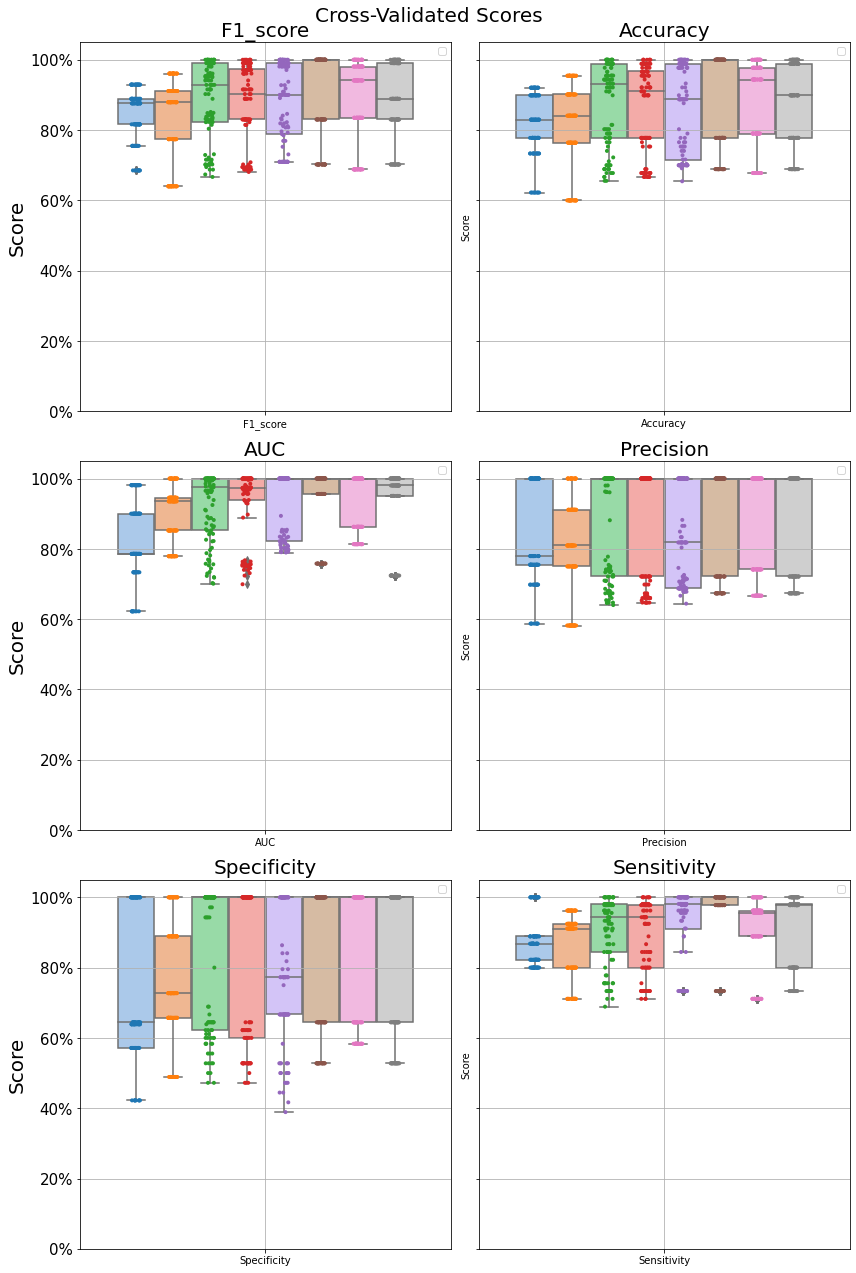

In [682]:
### with swarm plot cv
melted = pd.read_csv('fv_cv_4.csv')
fig, ax = plt.subplots(3, 2, figsize=(12,18), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision', 'Specificity','Sensitivity']
comp = [melted[melted.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    
    g = sns.stripplot(x="Metric", y="Score", hue='Model', dodge=True, data=comp[i], zorder=10, ax=ax[i//2, i%2], size = 4)
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[2,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, 0].set_ylabel('Score', fontsize=20)
    ax[i//2, i%2].set_ylim(0,1.05)
    ax[i//2, 0].set_yticklabels(ax[i//2, 0].get_yticklabels(),fontsize=15)
    ax[i//2, 0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    ax[i//2, i%2].set_xlabel('', fontsize=20)
    ax[i//2, i%2].set_title(met[i], fontsize=20)
    ax[i//2, i%2].grid(True)

plt.suptitle("Cross-Validated Scores", fontsize=20)
plt.tight_layout()
plt.show()


In [679]:

import matplotlib.ticker as mtick

<ipython-input-681-c2805c8dcad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-681-c2805c8dcad7>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, 0].set_yticklabels(ax[i//2, 0].get_yticklabels(),fontsize=15)
<ipython-input-681-c2805c8dcad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-681-c2805c8dcad7>:26: UserWarning: FixedFormatter should only be use

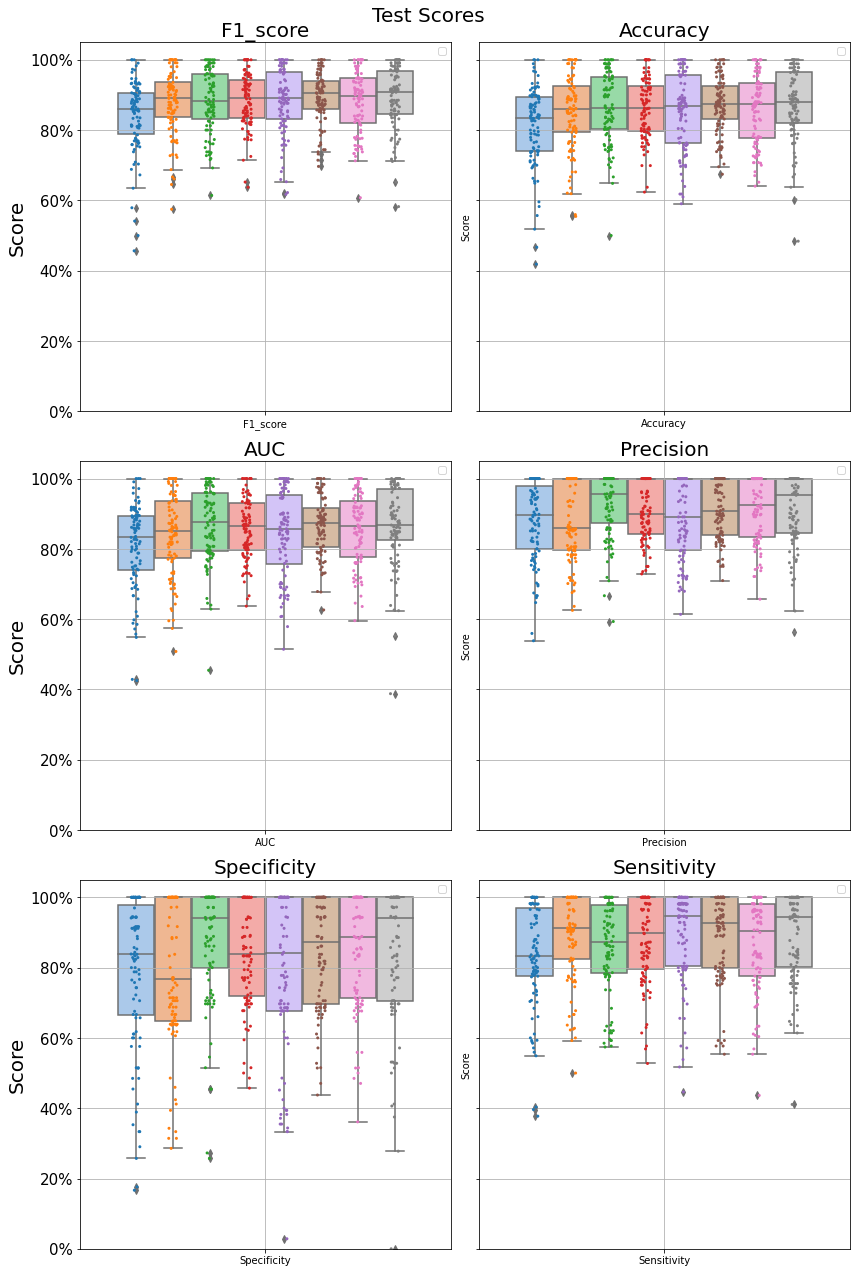

In [681]:
### with swarm plot train
# Plot swarmplot
melted = pd.read_csv('fv_test_4.csv')
fig, ax = plt.subplots(3, 2, figsize=(12,18), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision', 'Specificity','Sensitivity']
comp = [melted[melted.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    
    g = sns.stripplot(x="Metric", y="Score", hue='Model', dodge=True, data=comp[i], zorder=10, ax=ax[i//2, i%2], size = 3)
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[2,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, 0].set_ylabel('Score', fontsize=20)
    ax[i//2, i%2].set_ylim(0,1.05)
    ax[i//2, 0].set_yticklabels(ax[i//2, 0].get_yticklabels(),fontsize=15)
    ax[i//2, 0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    ax[i//2, i%2].set_xlabel('', fontsize=20)
    ax[i//2, i%2].set_title(met[i], fontsize=20)
    ax[i//2, i%2].grid(True)

plt.suptitle("Test Scores", fontsize=20)
plt.tight_layout()
plt.show()


#### testing repeat 

In [284]:

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix

# Empty lists to store scores
f1t = []
auct = []
acct = []
precisiont = []
recallt = []
specificityt = []
sensitivityt = []
mdl_namest = []

def confusion_matrix_scorer(clf, X, y):
       y_pred = clf.predict(X)
       cm = confusion_matrix(y, y_pred)
       return {'tn': cm[0, 0], 'fp': cm[0, 1],
              'fn': cm[1, 0], 'tp': cm[1, 1]}

for i in range(100):
    for k in range(len(names)):
        mdl = mdls[k]
        rs = np.random.randint(42,414120)
        X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,intervars,rs=rs)
        mdl.fit(X_train,y_train)
        y_pred = mdl.predict(X_test)

        f1t.append(f1_score(y_test, y_pred))
        auct.append(roc_auc_score(y_test, y_pred))
        acct.append(accuracy_score(y_test, y_pred))
        precisiont.append(precision_score(y_test, y_pred))
        recallt.append(recall_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)

        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        tp = cm[1, 1]
        mdl_namest.append(names[k])
    
        sensitivityt.append(tp / (tp + fn))
        specificityt.append(tn / (tn + fp))



# Create DataFrame
testdf = pd.DataFrame({'F1_score': f1t, 'Accuracy': acct, 'AUC': auct, 'Precision': precisiont, 'Recall': recallt, 'Specificity': specificityt, 'Sensitivity': sensitivityt, 'Model': mdl_namest})
meltedt = testdf.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
meltedt.to_csv('fv_test_4.csv')


<ipython-input-610-e689c022863f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-610-e689c022863f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order'] = df['Model'].map(mod_dict)
<ipython-input-610-e689c022863f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

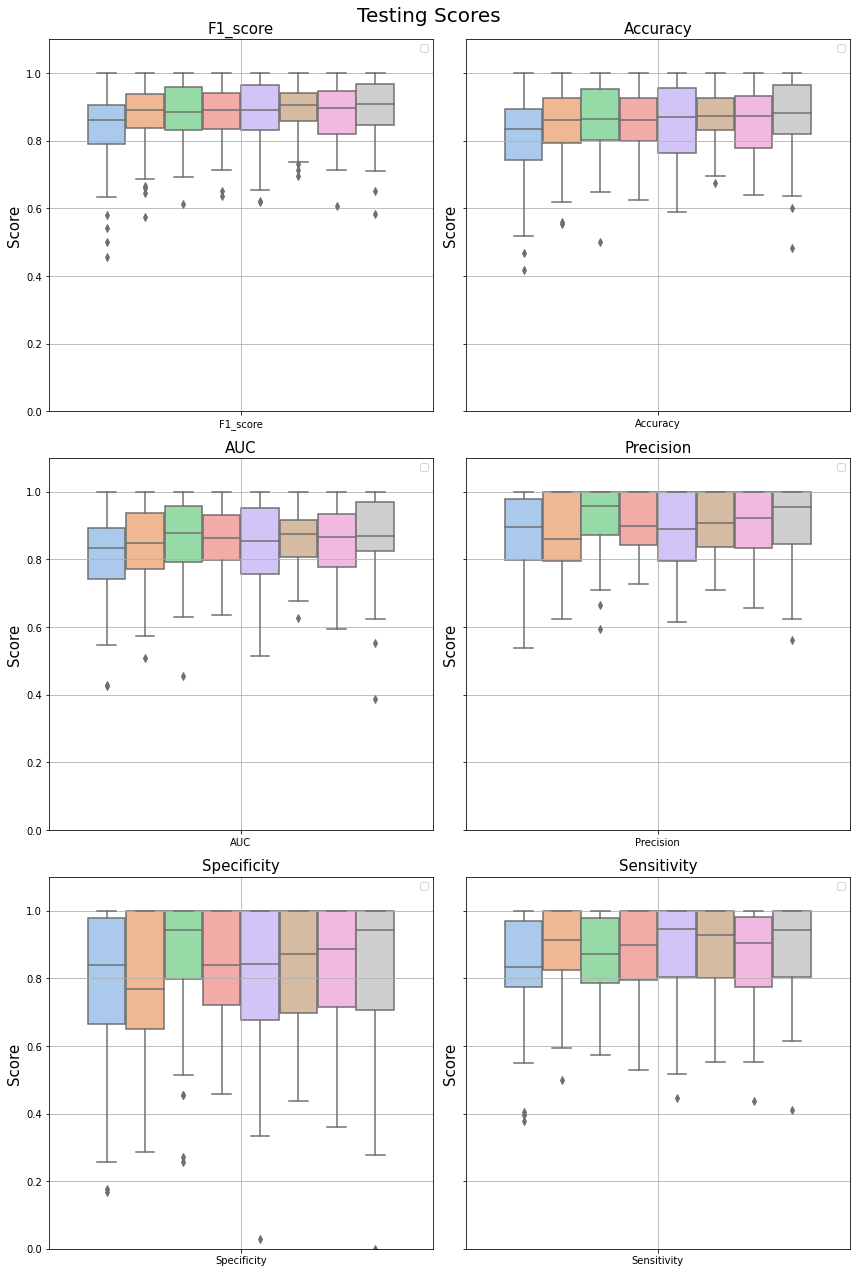

In [610]:
meltedt = pd.read_csv('fv_test_4.csv')
fig, ax = plt.subplots(3, 2, figsize=(12,18), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision','Specificity','Sensitivity']
comp = [meltedt[meltedt.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[2,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, i%2].set_ylabel('Score', fontsize=15)
    ax[i//2, i%2].set_xlabel('', fontsize=15)
    ax[i//2, i%2].set_title(met[i], fontsize=15)
    ax[i//2, i%2].set_ylim(0,1.1)
    ax[i//2, i%2].grid(True) 

plt.suptitle("Testing Scores", fontsize=20)
plt.tight_layout()
plt.show()


#### learning curve combo

In [310]:

from sklearn.model_selection import StratifiedGroupKFold,StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve


In [309]:
def accuracy_scorer(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [312]:
def plot_learning_curves(models, model_names, X, y,groups):
    plt.figure(figsize=(15,15))
    cmap = plt.get_cmap("tab10")  # Choose a colormap

    for i, (model, name) in enumerate(zip(models, model_names)):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_scorer), groups=groups)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        print(i)
        color = colors[i]
        
        plt.plot(train_sizes, train_scores_mean, label=f"{name} (Train)", marker='o', linestyle='--', color=color)
        plt.plot(train_sizes, test_scores_mean, label=f"{name} (Test)", marker='o', linestyle='-', color=color)

    plt.xlabel("Sample Size")
    plt.ylabel("Test Accuracy")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


In [ ]:
plot_learning_curves(mdls, names, X, y,groups=no_out.label.values)

<ipython-input-174-2f7f335f639b>:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=1,y=1,c=cmap(4))


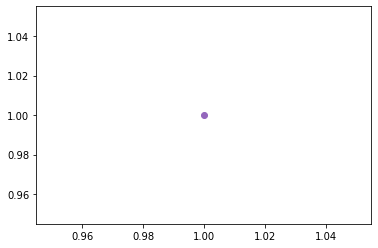

In [174]:
plt.scatter(x=1,y=1,c=cmap(4))

### cv examine

In [265]:
def evaluate_cv(model, X, y, groups, labels, n_repeats=50, n_splits=5):
    trainratios = []
    testratios = []
    scores = []

    for _ in range(n_repeats):
        skf = StratifiedGroupKFold(n_splits=n_splits)
        for train_index, test_index in skf.split(X, y, groups=groups):
            X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
            y_train, y_test = y[train_index], y[test_index]

            trainratios.append(sum(y_train) / (len(y_train) - sum(y_train)))
            testratios.append(sum(y_test) / (len(y_test) - sum(y_test)))

            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)

    return scores, trainratios,testratios


In [266]:
scores,trainratios,tesetratios = evaluate_cv(svc_opt, X, y, groups=list(no_out.dataset),labels=list(no_out.label))

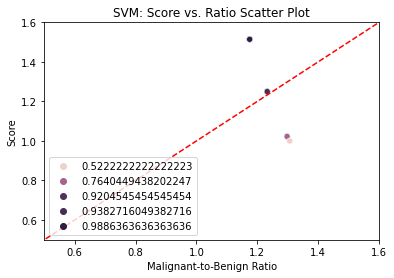

In [297]:
sns.scatterplot(x=trainratios,y=tesetratios,hue = scores)
plt.xlim(0.5,1.6)
plt.ylim(0.5,1.6)
plt.xlabel('Malignant-to-Benign Ratio')
plt.ylabel('Score')
plt.title('SVM: Score vs. Ratio Scatter Plot')
plt.plot(np.linspace(0, 1.6, 100), np.linspace(0, 1.6, 100), color='red', linestyle='--')
plt.legend(loc='lower left')
plt.show()

0
1
2
3
4
5
6


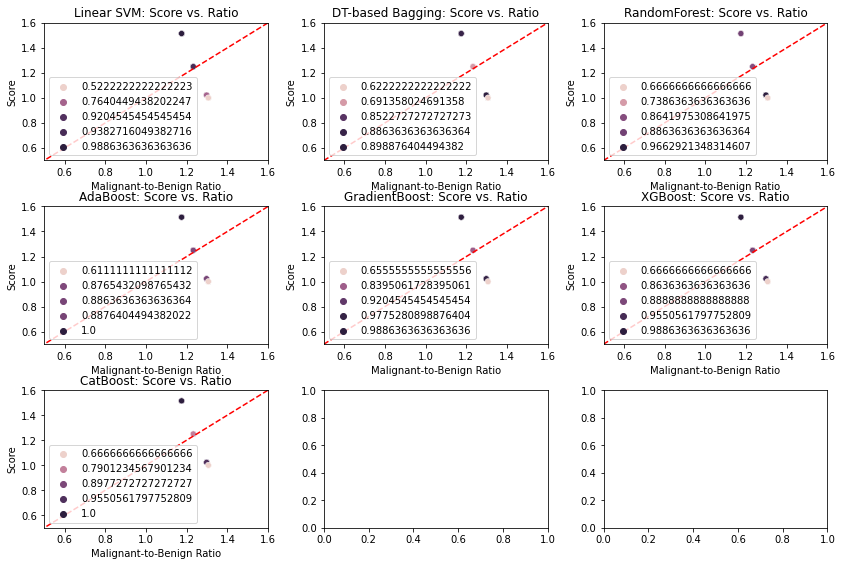

In [300]:
models = [svc_opt,bt_opt,rf_opt,ada_opt,glf_opt,xgb_opt,cat_opt]
model_names = ["Linear SVM","DT-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]

num_plots = len(models)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=2.5)  # Adjust the padding between subplots

for i, (model, model_name) in enumerate(zip(models, model_names)):
    print(i)
    row = i // num_cols
    col = i % num_cols
    scores,trainratios,tesetratios = evaluate_cv(model, X, y, groups=list(no_out.dataset),labels=list(no_out.label))
    sns.scatterplot(x=trainratios,y=tesetratios,hue = scores,ax=axes[row, col])
    axes[row, col].set_xlim(0.5,1.6)
    axes[row, col].set_ylim(0.5,1.6)
    axes[row, col].plot(np.linspace(0, 1.6, 100), np.linspace(0, 1.6, 100), color='red', linestyle='--')
    axes[row, col].legend(loc='lower left')
    axes[row, col].set_xlabel('Malignant-to-Benign Ratio')
    axes[row, col].set_ylabel('Score')
    axes[row, col].set_title(f'{model_name}: Score vs. Ratio')

plt.show()


### svm examine

#### equalize the number of variables

In [479]:
# Calculate the minimum number of voxels
min_voxels = no_out['voxel'].groupby(no_out['dataset']).count().min()
print(min_voxels)

8


In [484]:


# Define the desired number of voxels per dataset
desired_voxels = min_voxels

# Get the list of unique datasets
datasets = no_out['dataset'].unique().tolist()

# Initialize an empty list to store the filtered dataframes
filtered_dfs = []

# Iterate over each dataset
for dataset in datasets:
    # Filter the dataframe for the current dataset
    df = no_out.loc[no_out['dataset'] == dataset]
    
    # Exclude random samples until the desired number of voxels is reached
    filtered_df = df.sample(n=desired_voxels, random_state=42)
    
    # Append the filtered dataframe to the list
    filtered_dfs.append(filtered_df)

# Concatenate all the filtered dataframes back together
final_df = pd.concat(filtered_dfs)



Number of voxels per dataset: 8


In [489]:
print(len(final_df))
final_df.groupby(['dataset'])['voxel'].aggregate(len)


312


dataset
data005    8
data009    8
data012    8
data014    8
data015    8
data016    8
data018    8
data019    8
data022    8
data028    8
data032    8
data040    8
data044    8
dataAH     8
dataAM     8
dataAST    8
dataBJF    8
dataCJ     8
dataDM     8
dataEC     8
dataEP     8
dataFN     8
dataFS     8
dataGA     8
dataGS     8
dataHB     8
dataJH     8
dataKL     8
dataKM     8
dataLA     8
dataLK     8
dataLM     8
dataLN     8
dataLO     8
dataLW     8
dataMLT    8
dataMM     8
dataSM     8
dataStB    8
Name: voxel, dtype: int64

In [511]:

def equalizing(dat,min_voxels):
    # Define the desired number of voxels per dataset
    desired_voxels = min_voxels

    # Get the list of unique datasets
    datasets = dat['dataset'].unique().tolist()

    # Initialize an empty list to store the filtered dataframes
    filtered_dfs = []

    # Iterate over each dataset
    for dataset in datasets:
        # Filter the dataframe for the current dataset
        df = dat.loc[dat['dataset'] == dataset]
        
        # Exclude random samples until the desired number of voxels is reached
        filtered_df = df.sample(n=desired_voxels, random_state=np.random.RandomState())
        
        # Append the filtered dataframe to the list
        filtered_dfs.append(filtered_df)

    # Concatenate all the filtered dataframes back together
    final_df = pd.concat(filtered_dfs)
    return final_df



##### equalize cv

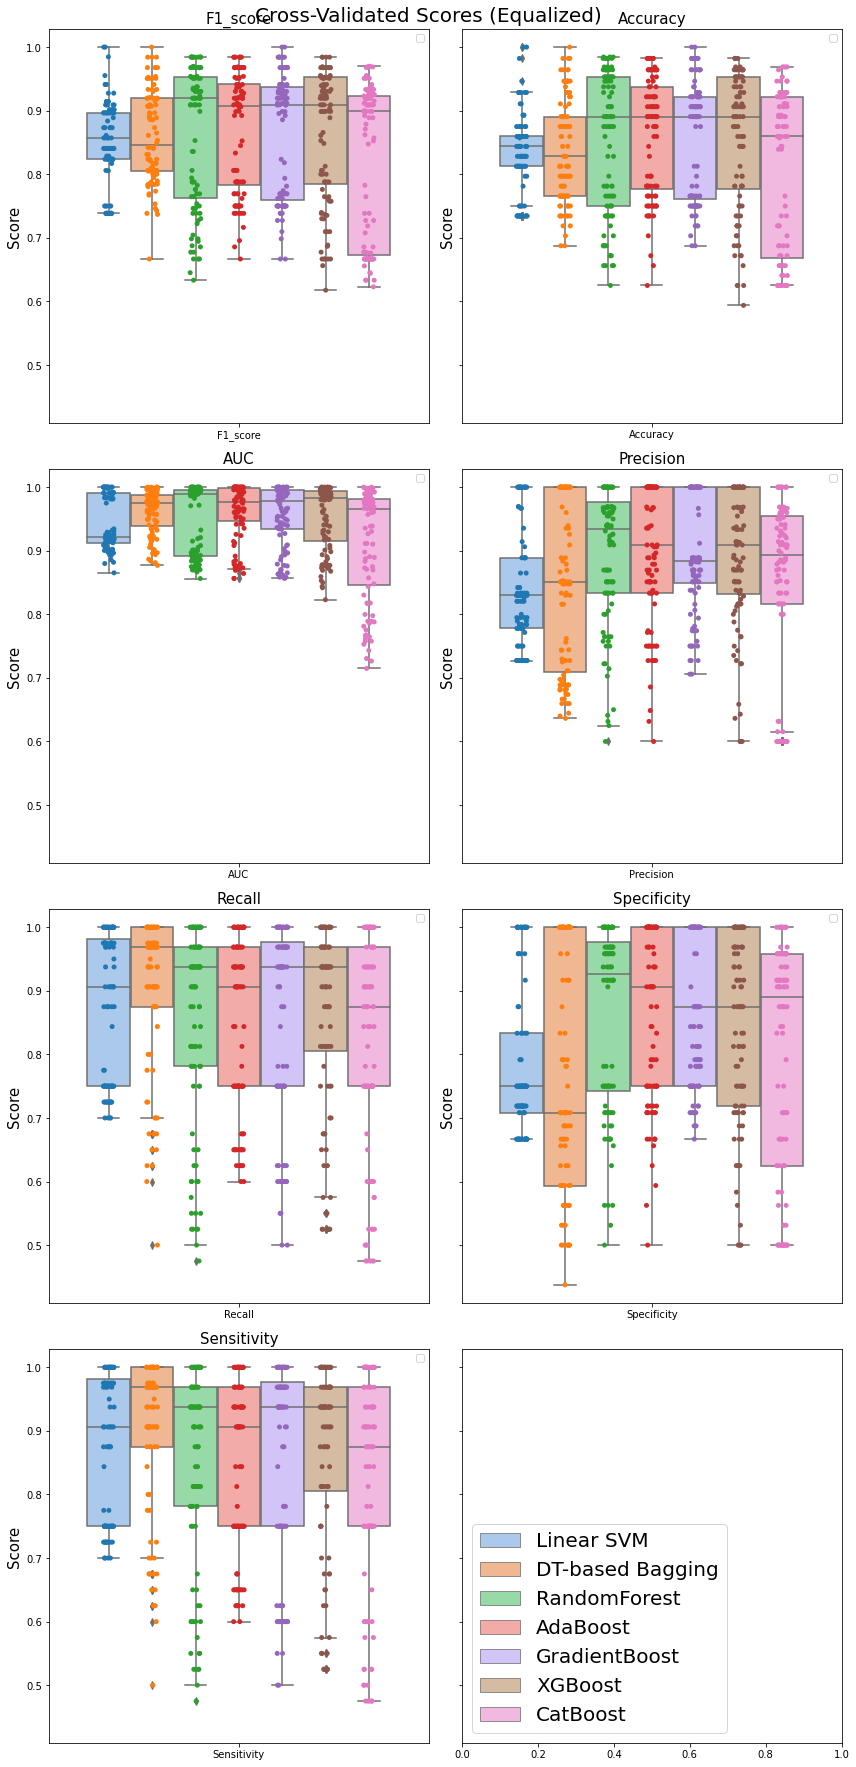

In [534]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.metrics import confusion_matrix

# Empty lists to store scores
f1 = []
auc = []
acc = []
precision = []
recall = []
specificity = []
sensitivity = []
mdl_names = []

def confusion_matrix_scorer(clf, X, y):
       y_pred = clf.predict(X)
       cm = confusion_matrix(y, y_pred)
       return {'tn': cm[0, 0], 'fp': cm[0, 1],
              'fn': cm[1, 0], 'tp': cm[1, 1]}

for i in range(20):
    final_df = equalizing(no_out,8)#This code is just run to get train and test set index
    X = final_df[finalvars].to_numpy()
    y = LabelEncoder().fit_transform(final_df.label)
    groups = final_df.dataset.to_numpy()

    for k in range(len(names)):
        mdl = mdls[k]
        if names[k] is not 'CatBoost':
            mdl.set_params(**{'random_state': np.random.randint(1000)})
        cvresult = cross_validate(mdl, X, y, groups=groups, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], cv=StratifiedGroupKFold(5), verbose=0)
        cm = cross_validate(mdl, X, y, groups=groups, scoring=confusion_matrix_scorer, cv=StratifiedGroupKFold(5), verbose=0)
       
        tn = cm['test_tn']
        fp = cm['test_fp']
        fn = cm['test_fn']
        tp = cm['test_tp']
        
    
        f1 += list(cvresult['test_f1'])
        acc += list(cvresult['test_accuracy'])
        auc += list(cvresult['test_roc_auc'])
        precision += list(cvresult['test_precision'])
        recall += list(cvresult['test_recall'])
        mdl_names += [names[k] for i in range(5)]
        sensitivity += list(tp / (tp + fn))
        specificity += list(tn / (tn + fp))

# Create DataFrame
cvdf = pd.DataFrame({'F1_score': f1, 'Accuracy': acc, 'AUC': auc, 'Precision': precision, 'Recall': recall, 'Specificity': specificity, 'Sensitivity': sensitivity, 'Model': mdl_names})
melted = cvdf.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot swarmplot
fig, ax = plt.subplots(4, 2, figsize=(12,25), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision', 'Recall', 'Specificity', 'Sensitivity']
comp = [melted[melted.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[3,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    g = sns.stripplot(x="Metric", y="Score", hue='Model', dodge=True, data=comp[i], zorder=10, ax=ax[i//2, i%2])
    
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, i%2].set_ylabel('Score', fontsize=15)
    ax[i//2, i%2].set_xlabel('', fontsize=15)
    ax[i//2, i%2].set_title(met[i], fontsize=15)

plt.suptitle("Cross-Validated Scores (Equalized)", fontsize=20)
plt.tight_layout()
plt.show()


##### equalize test

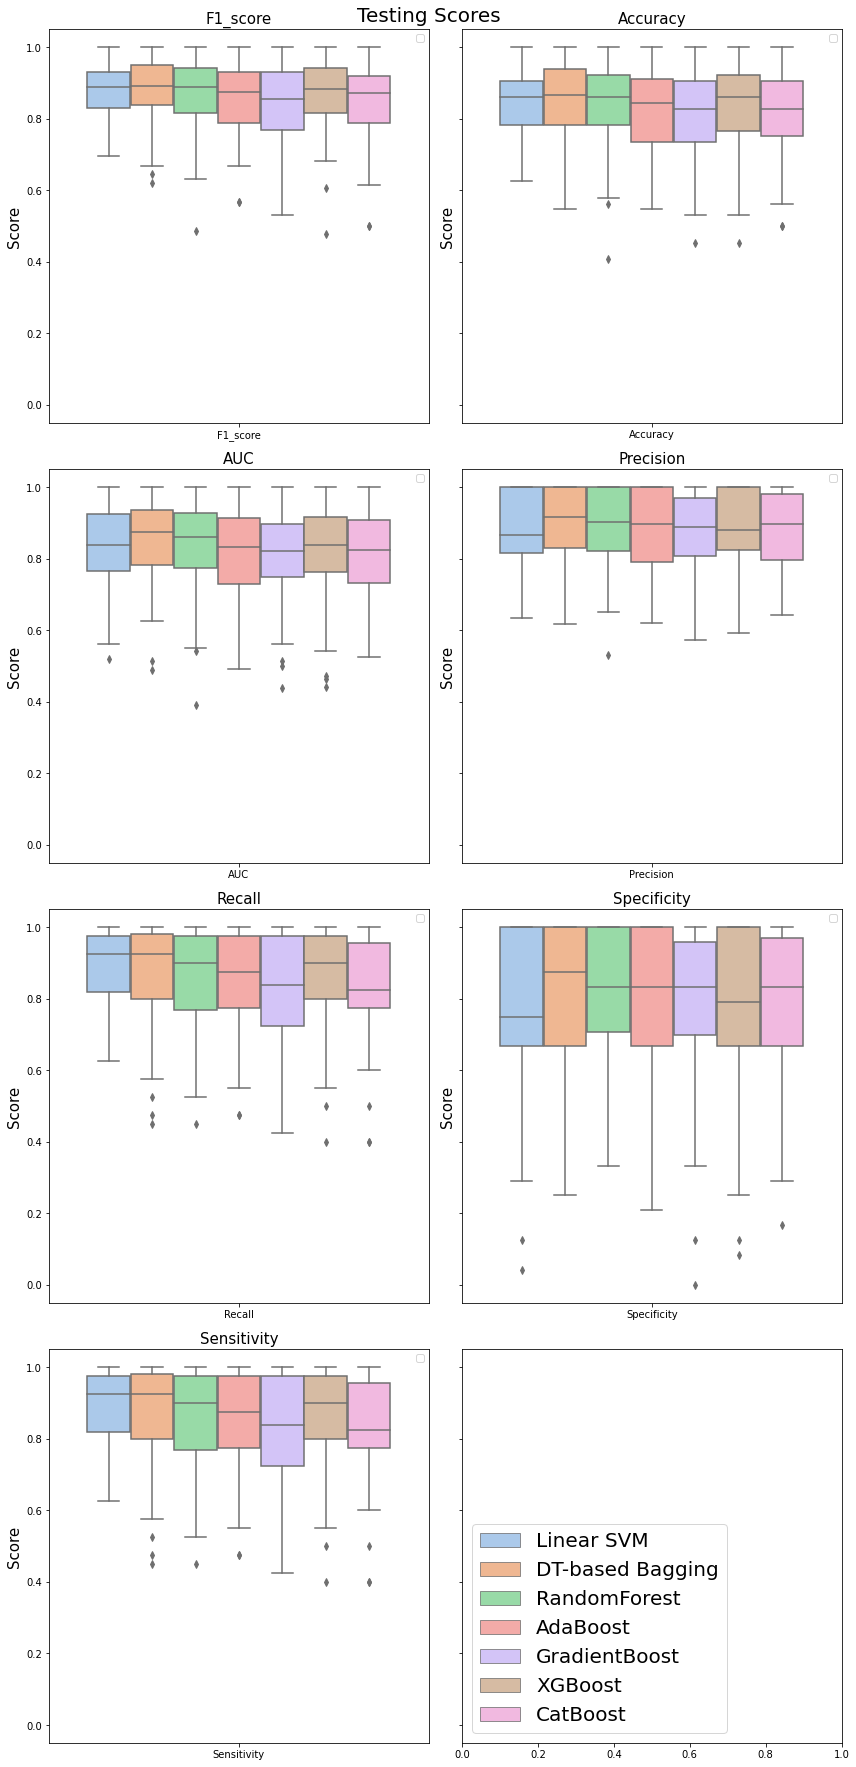

In [535]:

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix

# Empty lists to store scores
f1t = []
auct = []
acct = []
precisiont = []
recallt = []
specificityt = []
sensitivityt = []
mdl_namest = []

def confusion_matrix_scorer(clf, X, y):
       y_pred = clf.predict(X)
       cm = confusion_matrix(y, y_pred)
       return {'tn': cm[0, 0], 'fp': cm[0, 1],
              'fn': cm[1, 0], 'tp': cm[1, 1]}

for i in range(100):
    final_df = equalizing(no_out,8)#This code is just run to get train and test set index
    X = final_df[finalvars].to_numpy()
    y = LabelEncoder().fit_transform(final_df.label)
    groups = final_df.dataset.to_numpy()
    for k in range(len(names)):
        mdl = mdls[k]
        rs = np.random.randint(42,414120)
        X_train,X_test,y_train,y_test,g_train,g_test = tts(final_df,finalvars,rs=rs)
        mdl.fit(X_train,y_train)
        y_pred = mdl.predict(X_test)

        f1t.append(f1_score(y_test, y_pred))
        auct.append(roc_auc_score(y_test, y_pred))
        acct.append(accuracy_score(y_test, y_pred))
        precisiont.append(precision_score(y_test, y_pred))
        recallt.append(recall_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)

        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        tp = cm[1, 1]
        mdl_namest.append(names[k])
    
        sensitivityt.append(tp / (tp + fn))
        specificityt.append(tn / (tn + fp))



# Create DataFrame
testdf = pd.DataFrame({'F1_score': f1t, 'Accuracy': acct, 'AUC': auct, 'Precision': precisiont, 'Recall': recallt, 'Specificity': specificityt, 'Sensitivity': sensitivityt, 'Model': mdl_namest})
meltedt = testdf.melt(id_vars=['Model'], var_name='Metric', value_name='Score')


# Plot swarmplot
fig, ax = plt.subplots(4, 2, figsize=(12,25), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision', 'Recall', 'Specificity', 'Sensitivity']
comp = [meltedt[meltedt.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[3,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, i%2].set_ylabel('Score', fontsize=15)
    ax[i//2, i%2].set_xlabel('', fontsize=15)
    ax[i//2, i%2].set_title(met[i], fontsize=15)

plt.suptitle("Testing Scores", fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.metrics import confusion_matrix

# Empty lists to store scores
f1 = []
auc = []
acc = []
precision = []
recall = []
specificity = []
sensitivity = []
mdl_names = []

def confusion_matrix_scorer(clf, X, y):
       y_pred = clf.predict(X)
       cm = confusion_matrix(y, y_pred)
       return {'tn': cm[0, 0], 'fp': cm[0, 1],
              'fn': cm[1, 0], 'tp': cm[1, 1]}

for i in range(20):
    for k in range(len(names)):
        mdl = mdls[k]
        if names[k] is not 'CatBoost':
            mdl.set_params(**{'random_state': np.random.randint(1000)})
        cvresult = cross_validate(mdl, X, y, groups=groups, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], cv=StratifiedGroupKFold(5), verbose=0)
        cm = cross_validate(mdl, X, y, groups=groups, scoring=confusion_matrix_scorer, cv=StratifiedGroupKFold(5), verbose=0)
       
        tn = cm['test_tn']
        fp = cm['test_fp']
        fn = cm['test_fn']
        tp = cm['test_tp']
        
    
        f1 += list(cvresult['test_f1'])
        acc += list(cvresult['test_accuracy'])
        auc += list(cvresult['test_roc_auc'])
        precision += list(cvresult['test_precision'])
        recall += list(cvresult['test_recall'])
        mdl_names += [names[k] for i in range(5)]
        sensitivity += list(tp / (tp + fn))
        specificity += list(tn / (tn + fp))

# Create DataFrame
cvdf = pd.DataFrame({'F1_score': f1, 'Accuracy': acc, 'AUC': auc, 'Precision': precision, 'Recall': recall, 'Specificity': specificity, 'Sensitivity': sensitivity, 'Model': mdl_names})
melted = cvdf.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot swarmplot
fig, ax = plt.subplots(4, 2, figsize=(12,25), sharey=True)
met = ['F1_score', 'Accuracy', 'AUC', 'Precision', 'Recall', 'Specificity', 'Sensitivity']
comp = [melted[melted.Metric == metric] for metric in met]
for i in range(len(comp)):
    df = comp[i]
    df['order'] = df['Model'].map(mod_dict)
    df.sort_values('order')
    g = sns.boxplot(x="Metric", y="Score", hue='Model', palette=sns.color_palette("pastel"), data=comp[i], ax=ax[i//2, i%2])
    if i == 0:
        handles, labels = ax[0,0].get_legend_handles_labels()
        ax[3,1].legend(
            handles,
            labels,
            loc='lower left',
            prop={'size': 20}
        )
    g = sns.stripplot(x="Metric", y="Score", hue='Model', dodge=True, data=comp[i], zorder=10, ax=ax[i//2, i%2])
    
    # Add legend only in the last subplot
    ax[i//2, i%2].legend('')
    ax[i//2, i%2].set_ylabel('Score', fontsize=15)
    ax[i//2, i%2].set_xlabel('', fontsize=15)
    ax[i//2, i%2].set_title(met[i], fontsize=15)

plt.suptitle("Cross-Validated Scores (Equalized)", fontsize=20)
plt.tight_layout()
plt.show()


##### different train test m2b ratios

In [498]:
X.shape
y.shape

(312,)

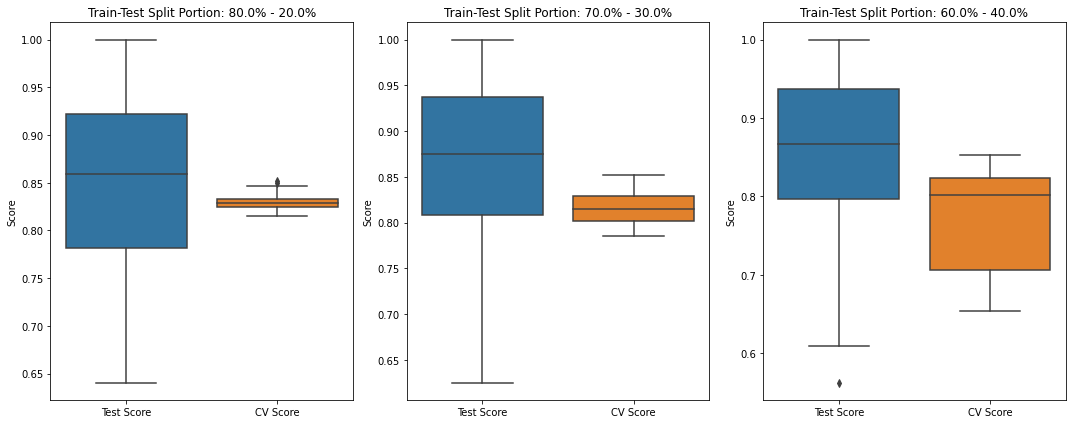

In [536]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedGroupKFold
from sklearn.svm import SVC

# Define the portions for train-test split
portions = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Define the number of iterations
train_iter = 100
cv_iter = 20

# Initialize lists to store test and CV scores
test_scores = []
cv_scores = []
mdl = svc3

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Iterate over each portion
for i, (train_portion, test_portion) in enumerate(portions):
    portion_test_scores = []
    portion_cv_scores = []
    
    # Perform train-test split iterations
    for _ in range(train_iter):
        final_df = equalizing(no_out,8)#This code is just run to get train and test set index
        X = final_df[finalvars].to_numpy()
        y = LabelEncoder().fit_transform(final_df.label)
        
        rs = np.random.randint(42,414120)
        X_train,X_test,y_train,y_test,g_train,g_test = tts(final_df,finalvars,rs=rs)
        mdl.fit(X_train,y_train)
        test_scores.append(mdl.score(X_test,y_test))

    # Perform cross-validation iterations
    for _ in range(cv_iter):
        final_df = equalizing(no_out,8)#This code is just run to get train and test set index
        X = final_df[finalvars].to_numpy()
        y = LabelEncoder().fit_transform(final_df.label)
        groups = final_df.dataset.to_numpy()
        group_kfold = StratifiedGroupKFold(n_splits=int(1 / test_portion))
        cv_scores.append(np.mean(cross_val_score(mdl, X, y, groups=groups,cv=group_kfold)))

     # Plot boxplots in the corresponding subplot using seaborn
    data = {'Score Type': ['Test Score'] * len(test_scores) + ['CV Score'] * len(cv_scores),
            'Score': test_scores + cv_scores}
    sns.boxplot(x='Score Type', y='Score', data=data, ax=axes[i])
    axes[i].set_title(f'Train-Test Split Portion: {train_portion*100}% - {test_portion*100}%')
    axes[i].set_ylabel('Score')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### averaging features

In [325]:
len(intervars)

9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of models
models = [glf4,cat4,ada4,xgb4]
# Empty dictionary to store feature importance values
feature_importance = {}
features = intervars
num_iterations = 100

# Iterate over the models
for model in models:
    # Initialize an empty list to store importance values for each iteration
    iteration_importance_values = []
    
    # Perform feature importance calculation for each iteration
    for _ in range(num_iterations):
        X_train, X_test, y_train, y_test, g_train, g_test = tts(no_out, intervars, rs=np.random.RandomState())
        model.fit(X_train, y_train)
        importance_values = model.feature_importances_ / sum(model.feature_importances_)
        iteration_importance_values.append(importance_values)
    
    # Transpose the list to have importance values for each feature
    iteration_importance_values = np.array(iteration_importance_values).T
    
    # Add the importance values to the corresponding feature
    for feature, importance_values in zip(features, iteration_importance_values):
        if feature not in feature_importance:
            feature_importance[feature] = []
        feature_importance[feature].extend(importance_values)

# Calculate average and standard deviation of feature importance for each feature
average_importance = {feature: np.mean(importance_values) for feature, importance_values in feature_importance.items()}
std_importance = {feature: np.std(importance_values) for feature, importance_values in feature_importance.items()}

# Sort the feature importance dictionary based on average importance values
sorted_importance = sorted(average_importance.items(), key=lambda x: x[1], reverse=True)

# Extract sorted features and importance values
sorted_features = [feature for feature, _ in sorted_importance]
sorted_importance_values = [importance for _, importance in sorted_importance]

# Calculate error bars
y_err = [std_importance[feature] for feature in sorted_features]



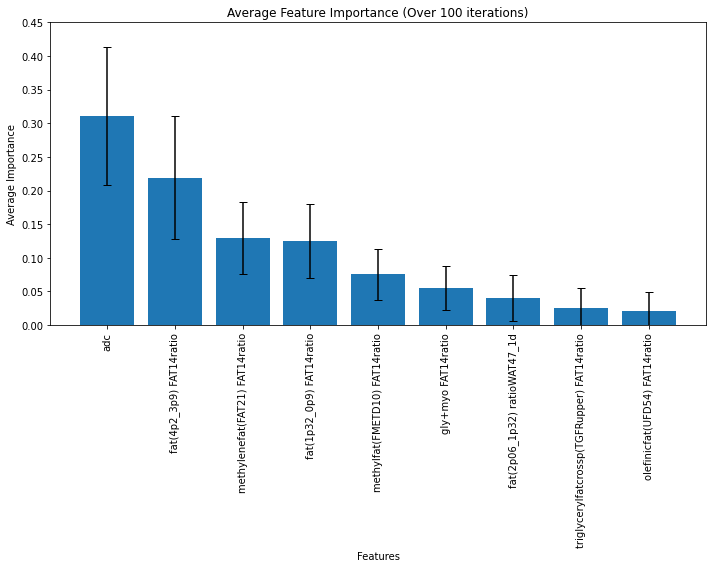

In [338]:
# Plot the average feature importance with error bars
plt.figure(figsize=(10, 8))
plt.bar(sorted_features, sorted_importance_values, yerr=y_err, capsize=4)
plt.xlabel('Features')
plt.ylabel('Average Importance')
plt.ylim(0.0,0.45)
plt.title('Average Feature Importance (Over {} iterations)'.format(num_iterations))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### reduced feature models

In [449]:
sorted_features = ['adc',
 'fat(4p2_3p9) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'methylfat(FMETD10) FAT14ratio',
 'gly+myo FAT14ratio',
 'fat(2p06_1p32) ratioWAT47_1d',
 'triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio']

In [486]:
model = glf4
y = LabelEncoder().fit_transform(no_out.label)
ranked_features = sorted_features
# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        ############################################
        rs = np.random.randint(1, 40000)
        model.set_params(random_state = rs)
        print(model)
        ############################################
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)


GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=36664)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=14676)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=38891)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=27454)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=34944)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=2047)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=0.1, random_state=17638)
GradientBoostingClassifier(max_depth=2, min_samples_leaf=0.1,
               

KeyboardInterrupt: 

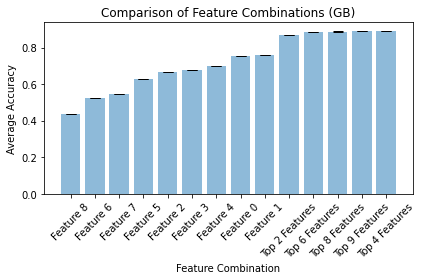

In [483]:

sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots()
x_pos = np.arange(len(mean_values))

plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45)
plt.xlabel('Feature Combination')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Feature Combinations (GB)')

plt.tight_layout()
plt.show()


In [484]:
df

Top 2 Features  Top 4 Features  Top 6 Features  Top 8 Features  \
0         0.868898        0.893479        0.886617        0.886567   
1         0.868898        0.893479        0.886617        0.886567   
2         0.868898        0.893479        0.884370        0.888814   
3         0.868898        0.893479        0.886617        0.886567   
4         0.868898        0.893479        0.886617        0.886567   
..             ...             ...             ...             ...   
95        0.868898        0.893479        0.886617        0.886567   
96        0.868898        0.893479        0.884370        0.888814   
97        0.868898        0.893479        0.886617        0.886567   
98        0.868898        0.893479        0.886617        0.888814   
99        0.868898        0.893479        0.884370        0.886567   

    Top 9 Features  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0         0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
1         0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
2         0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
3         0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
4         0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
..             ...        ...        ...        ...        ...        ...   
95        0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
96        0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
97        0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
98        0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   
99        0.893333   0.755144   0.758738   0.665384   0.677051   0.697302   

    Feature 5  Feature 6  Feature 7  Feature 8  
0    0.628975   0.526475   0.545966   0.437694  
1    0.628975   0.526475   0.545966   0.437694  
2    0.628975   0.526475   0.545966   0.437694  
3    0.628975   0.526475   0.545966   0.437694  
4    0.628975   0.526475   0.545966   0.437694  
..        ...        ...        ...        ...  
95   0.628975   0.526475   0.545966   0.437694  
96   0.628975   0.526475   0.545966   0.437694  
97   0.628975   0.526475   0.545966   0.437694  
98   0.628975   0.526475   0.545966   0.437694  
99   0.628975   0.526475   0.545966   0.437694  

[100 rows x 14 columns]

In [454]:
df.to_csv('reducedgb.csv')

In [447]:
model = cat4
y = LabelEncoder().fit_transform(no_out.label)

# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)


KeyError: "None of [Index([('ADC', -0.6922922146104389), ('CP8/FAT14', -0.6276451309598495)], dtype='object')] are in the [columns]"

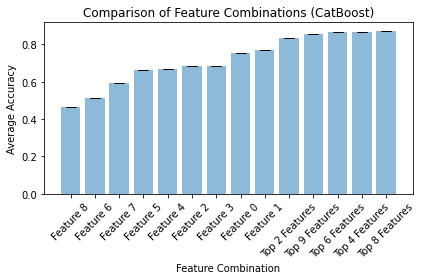

In [373]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots()
x_pos = np.arange(len(mean_values))

plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45)
plt.xlabel('Feature Combination')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Feature Combinations (CatBoost)')

plt.tight_layout()
plt.show()
df.to_csv('reducedcat.csv')

In [374]:
model = ada4
y = LabelEncoder().fit_transform(no_out.label)
# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6,8, len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)


    Top 2 Features  Top 4 Features  Top 6 Features  Top 8 Features  \
0         0.885567         0.91037         0.86812         0.86313   
1         0.885567         0.91037         0.86812         0.86313   
2         0.885567         0.91037         0.86812         0.86313   
3         0.885567         0.91037         0.86812         0.86313   
4         0.885567         0.91037         0.86812         0.86313   
..             ...             ...             ...             ...   
95        0.885567         0.91037         0.86812         0.86313   
96        0.885567         0.91037         0.86812         0.86313   
97        0.885567         0.91037         0.86812         0.86313   
98        0.885567         0.91037         0.86812         0.86313   
99        0.885567         0.91037         0.86812         0.86313   

    Top 9 Features  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0         0.870811   0.755144   0.694775   0.630726   0.640822   0.573147   
1    

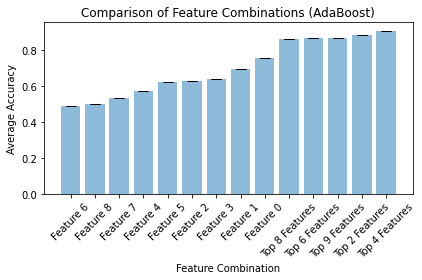

In [375]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots()
x_pos = np.arange(len(mean_values))

plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45)
plt.xlabel('Feature Combination')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Feature Combinations (AdaBoost)')

plt.tight_layout()
plt.show()
df.to_csv('reducedada.csv')

In [502]:
pd.read_csv('reducedcat.csv')

Unnamed: 0  Top 2 Features  Top 4 Features  Top 6 Features  \
0            0        0.834326        0.864068        0.863675   
1            1        0.834326        0.864068        0.863675   
2            2        0.834326        0.864068        0.863675   
3            3        0.834326        0.864068        0.863675   
4            4        0.834326        0.864068        0.863675   
..         ...             ...             ...             ...   
95          95        0.834326        0.864068        0.863675   
96          96        0.834326        0.864068        0.863675   
97          97        0.834326        0.864068        0.863675   
98          98        0.834326        0.864068        0.863675   
99          99        0.834326        0.864068        0.863675   

    Top 8 Features  Top 9 Features  Feature 0  Feature 1  Feature 2  \
0         0.873995        0.854882   0.755144   0.768272   0.681533   
1         0.873995        0.854882   0.755144   0.768272   0.681533   
2         0.873995        0.854882   0.755144   0.768272   0.681533   
3         0.873995        0.854882   0.755144   0.768272   0.681533   
4         0.873995        0.854882   0.755144   0.768272   0.681533   
..             ...             ...        ...        ...        ...   
95        0.873995        0.854882   0.755144   0.768272   0.681533   
96        0.873995        0.854882   0.755144   0.768272   0.681533   
97        0.873995        0.854882   0.755144   0.768272   0.681533   
98        0.873995        0.854882   0.755144   0.768272   0.681533   
99        0.873995        0.854882   0.755144   0.768272   0.681533   

    Feature 3  Feature 4  Feature 5  Feature 6  Feature 7  Feature 8  
0    0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
1    0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
2    0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
3    0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
4    0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
..        ...        ...        ...        ...        ...        ...  
95   0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
96   0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
97   0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
98   0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  
99   0.685946    0.66614   0.660344   0.513222    0.59069   0.462414  

[100 rows x 15 columns]

In [376]:
model = xgb4
y = LabelEncoder().fit_transform(no_out.label)

# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)

df.to_csv('reducedxgb.csv')

    Top 2 Features  Top 4 Features  Top 6 Features  Top 8 Features  \
0          0.84193        0.887181        0.875108        0.872861   
1          0.84193        0.887181        0.875108        0.872861   
2          0.84193        0.887181        0.875108        0.872861   
3          0.84193        0.887181        0.875108        0.872861   
4          0.84193        0.887181        0.875108        0.872861   
..             ...             ...             ...             ...   
95         0.84193        0.887181        0.875108        0.872861   
96         0.84193        0.887181        0.875108        0.872861   
97         0.84193        0.887181        0.875108        0.872861   
98         0.84193        0.887181        0.875108        0.872861   
99         0.84193        0.887181        0.875108        0.872861   

    Top 9 Features  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0         0.877799   0.755144   0.738437   0.658472   0.660826   0.652181   
1    

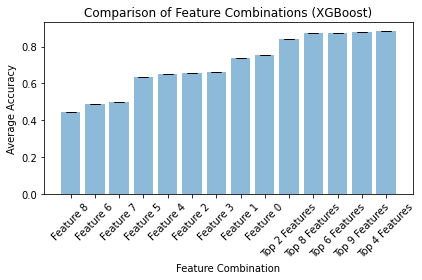

In [377]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots()
x_pos = np.arange(len(mean_values))

plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45)
plt.xlabel('Feature Combination')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Feature Combinations (XGBoost)')

plt.tight_layout()
plt.show()


In [684]:
model = svm4
y = LabelEncoder().fit_transform(no_out.label)

# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5,shuffle=True,random_state = np.random.RandomState()),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5,shuffle=True,random_state = np.random.RandomState()),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)

df.to_csv('reducedsvm.csv')

    Top 2 Features  Top 4 Features  Top 6 Features  Top 8 Features  \
0         0.748201        0.671820        0.840298        0.796658   
1         0.732154        0.715947        0.853511        0.750296   
2         0.742531        0.748480        0.841297        0.806581   
3         0.739359        0.755116        0.845727        0.782531   
4         0.789365        0.784551        0.820693        0.811213   
..             ...             ...             ...             ...   
95        0.749577        0.772517        0.840931        0.787152   
96        0.711805        0.796053        0.844200        0.789927   
97        0.714482        0.760421        0.831497        0.829481   
98        0.713639        0.729458        0.855514        0.785687   
99        0.720811        0.736461        0.845075        0.840444   

    Top 9 Features  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0         0.799759   0.738104   0.551425   0.444140   0.407582   0.603681   
1    

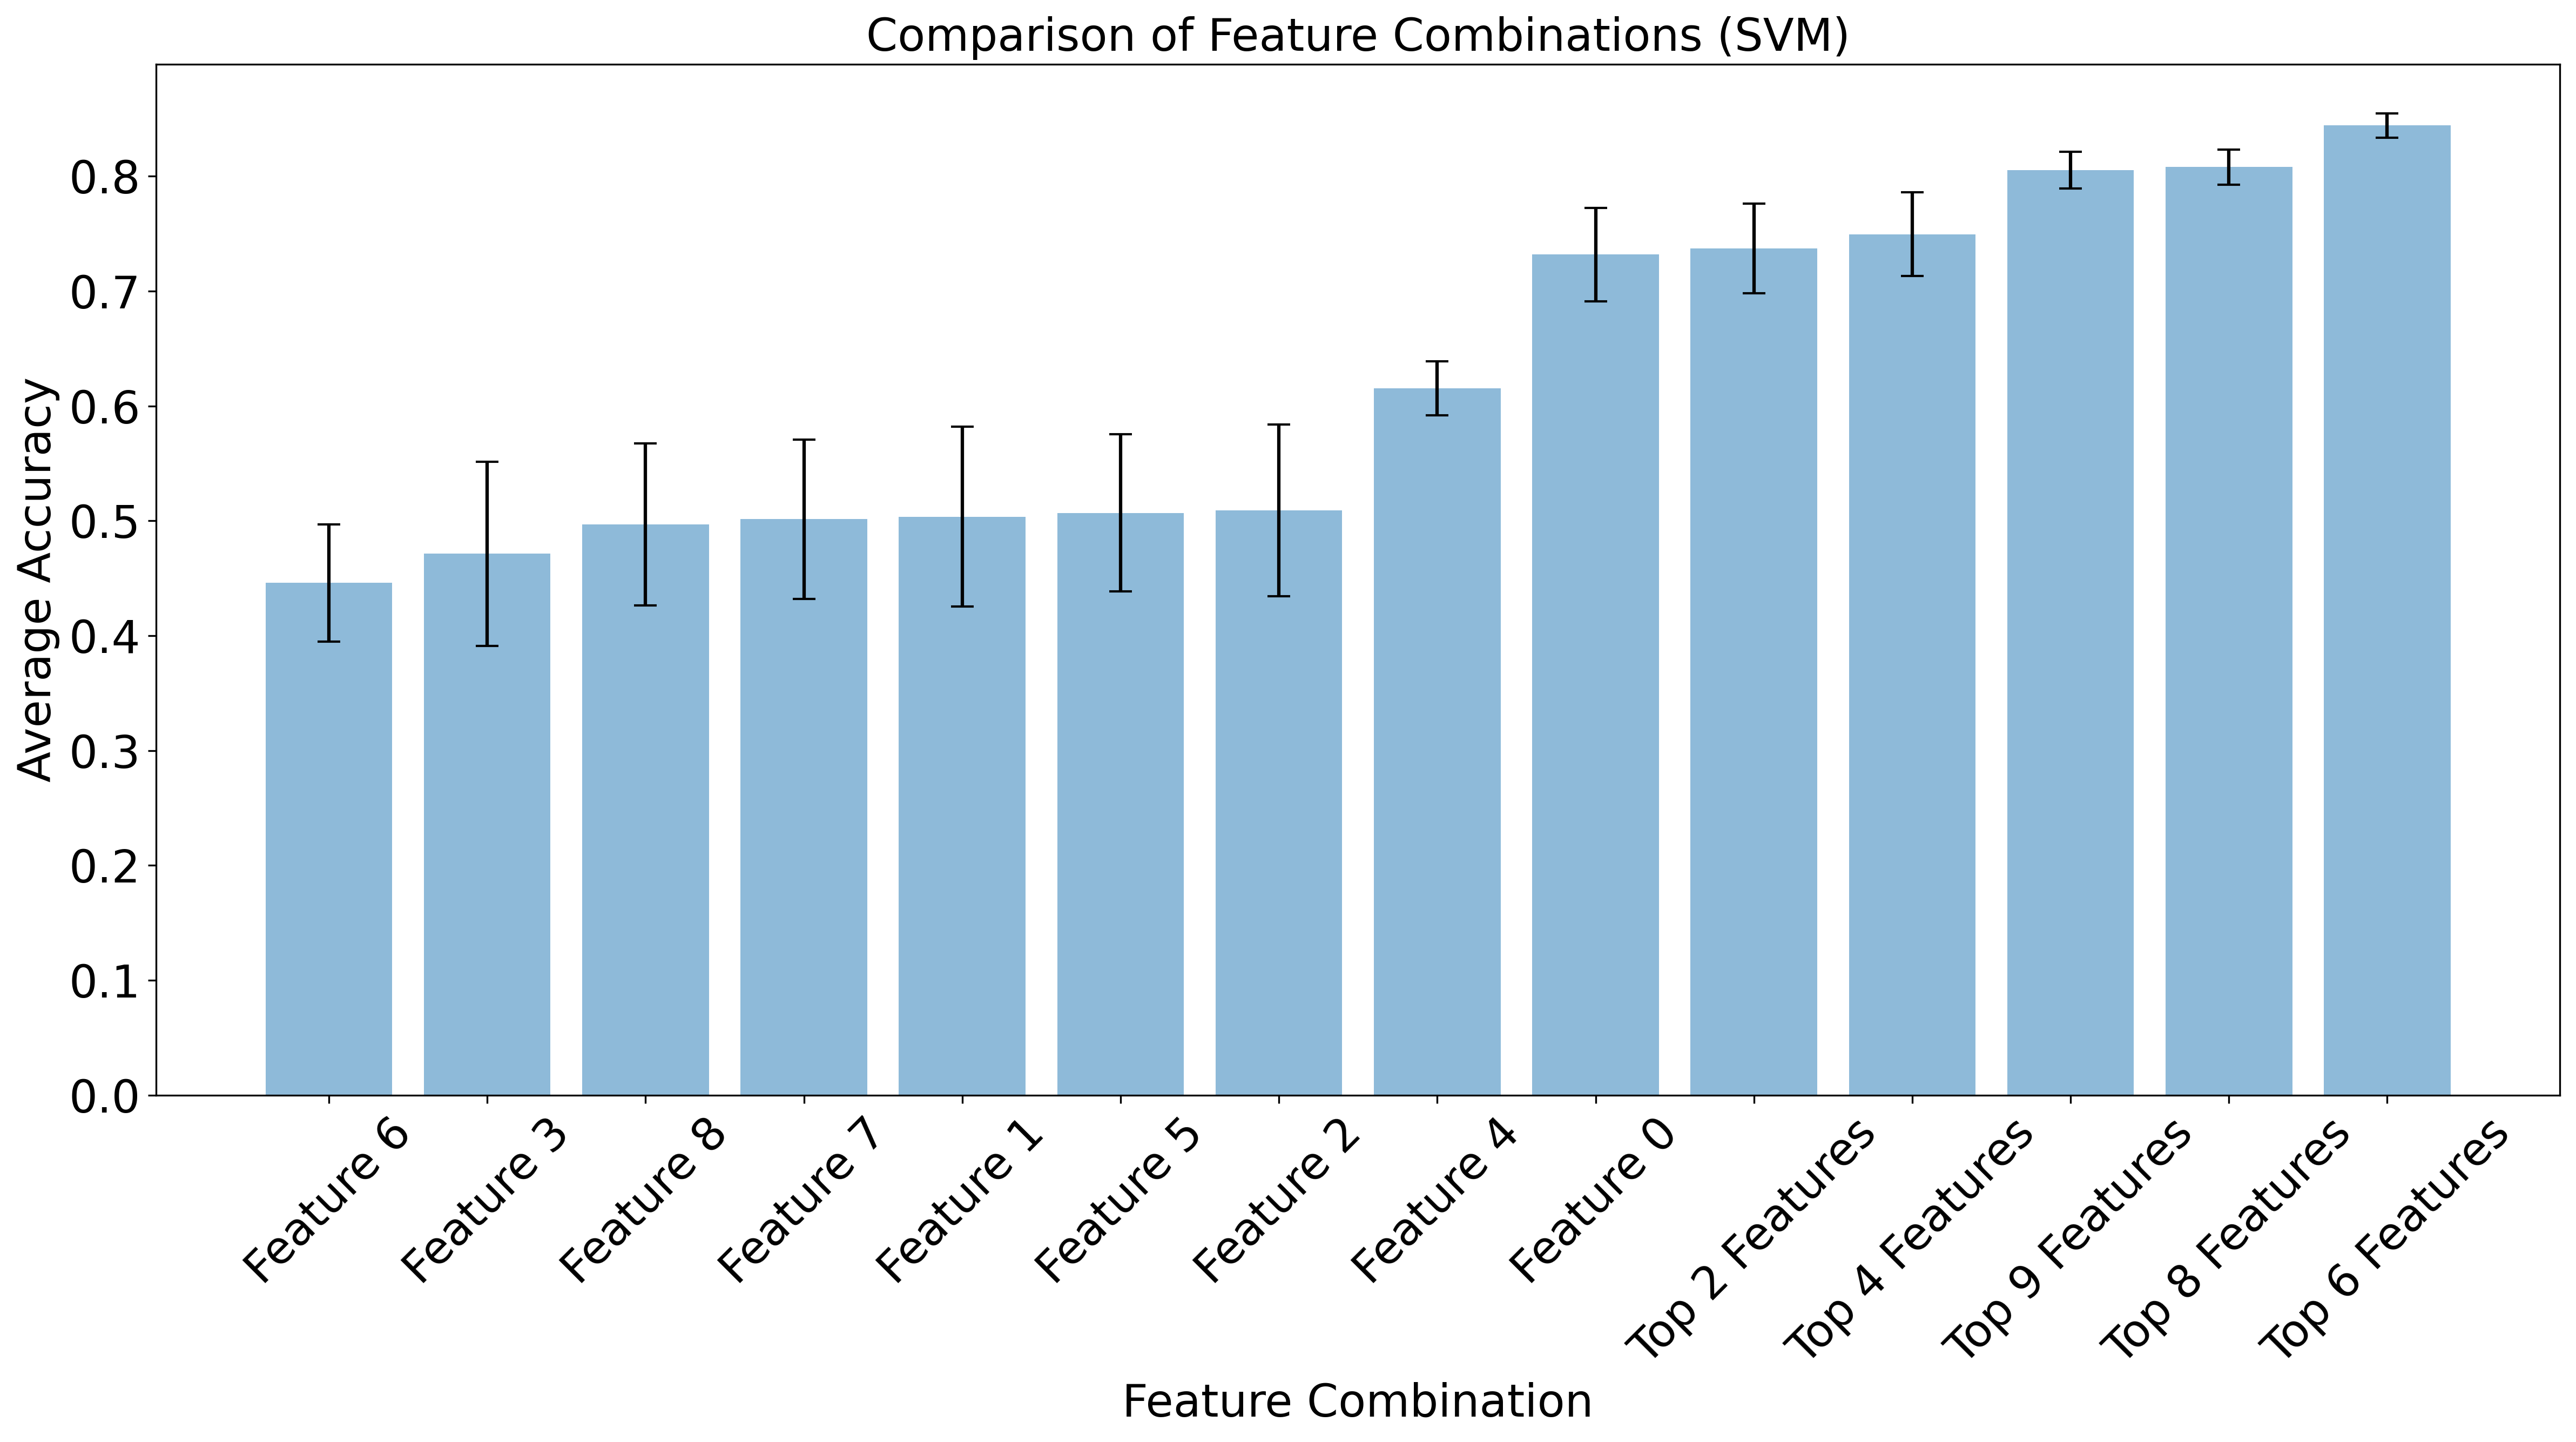

In [685]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
x_pos = np.arange(len(mean_values))
plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Feature Combination',fontsize=20)
plt.ylabel('Average Accuracy',fontsize=20)
plt.title('Comparison of Feature Combinations (SVM)',fontsize=20)

plt.tight_layout()
plt.show()


In [690]:
def randlog():
    return LogisticRegression(random_state=np.random.RandomState())
model = randlog()
y = LabelEncoder().fit_transform(no_out.label)

# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(100))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5,shuffle=True,random_state = np.random.RandomState()),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(100):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5,shuffle=True,random_state = np.random.RandomState()),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)

df.to_csv('reducedlog.csv')

    Top 2 Features  Top 4 Features  Top 6 Features  Top 8 Features  \
0         0.791627        0.738821        0.803870        0.793714   
1         0.743053        0.722954        0.829267        0.806867   
2         0.743606        0.740333        0.818359        0.794599   
3         0.681692        0.782750        0.809096        0.814929   
4         0.728198        0.797917        0.855497        0.807465   
..             ...             ...             ...             ...   
95        0.747565        0.749742        0.846464        0.801527   
96        0.719925        0.736105        0.843458        0.790598   
97        0.755894        0.708513        0.850597        0.795732   
98        0.768701        0.728646        0.810847        0.794756   
99        0.752009        0.763745        0.833079        0.811858   

    Top 9 Features  Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  \
0         0.791220   0.738202   0.555732   0.502441   0.525551   0.632537   
1    

In [429]:
svm4


SVC(C=0.5, kernel='linear', probability=True, random_state=725)

In [422]:
X.shape

(436, 9)

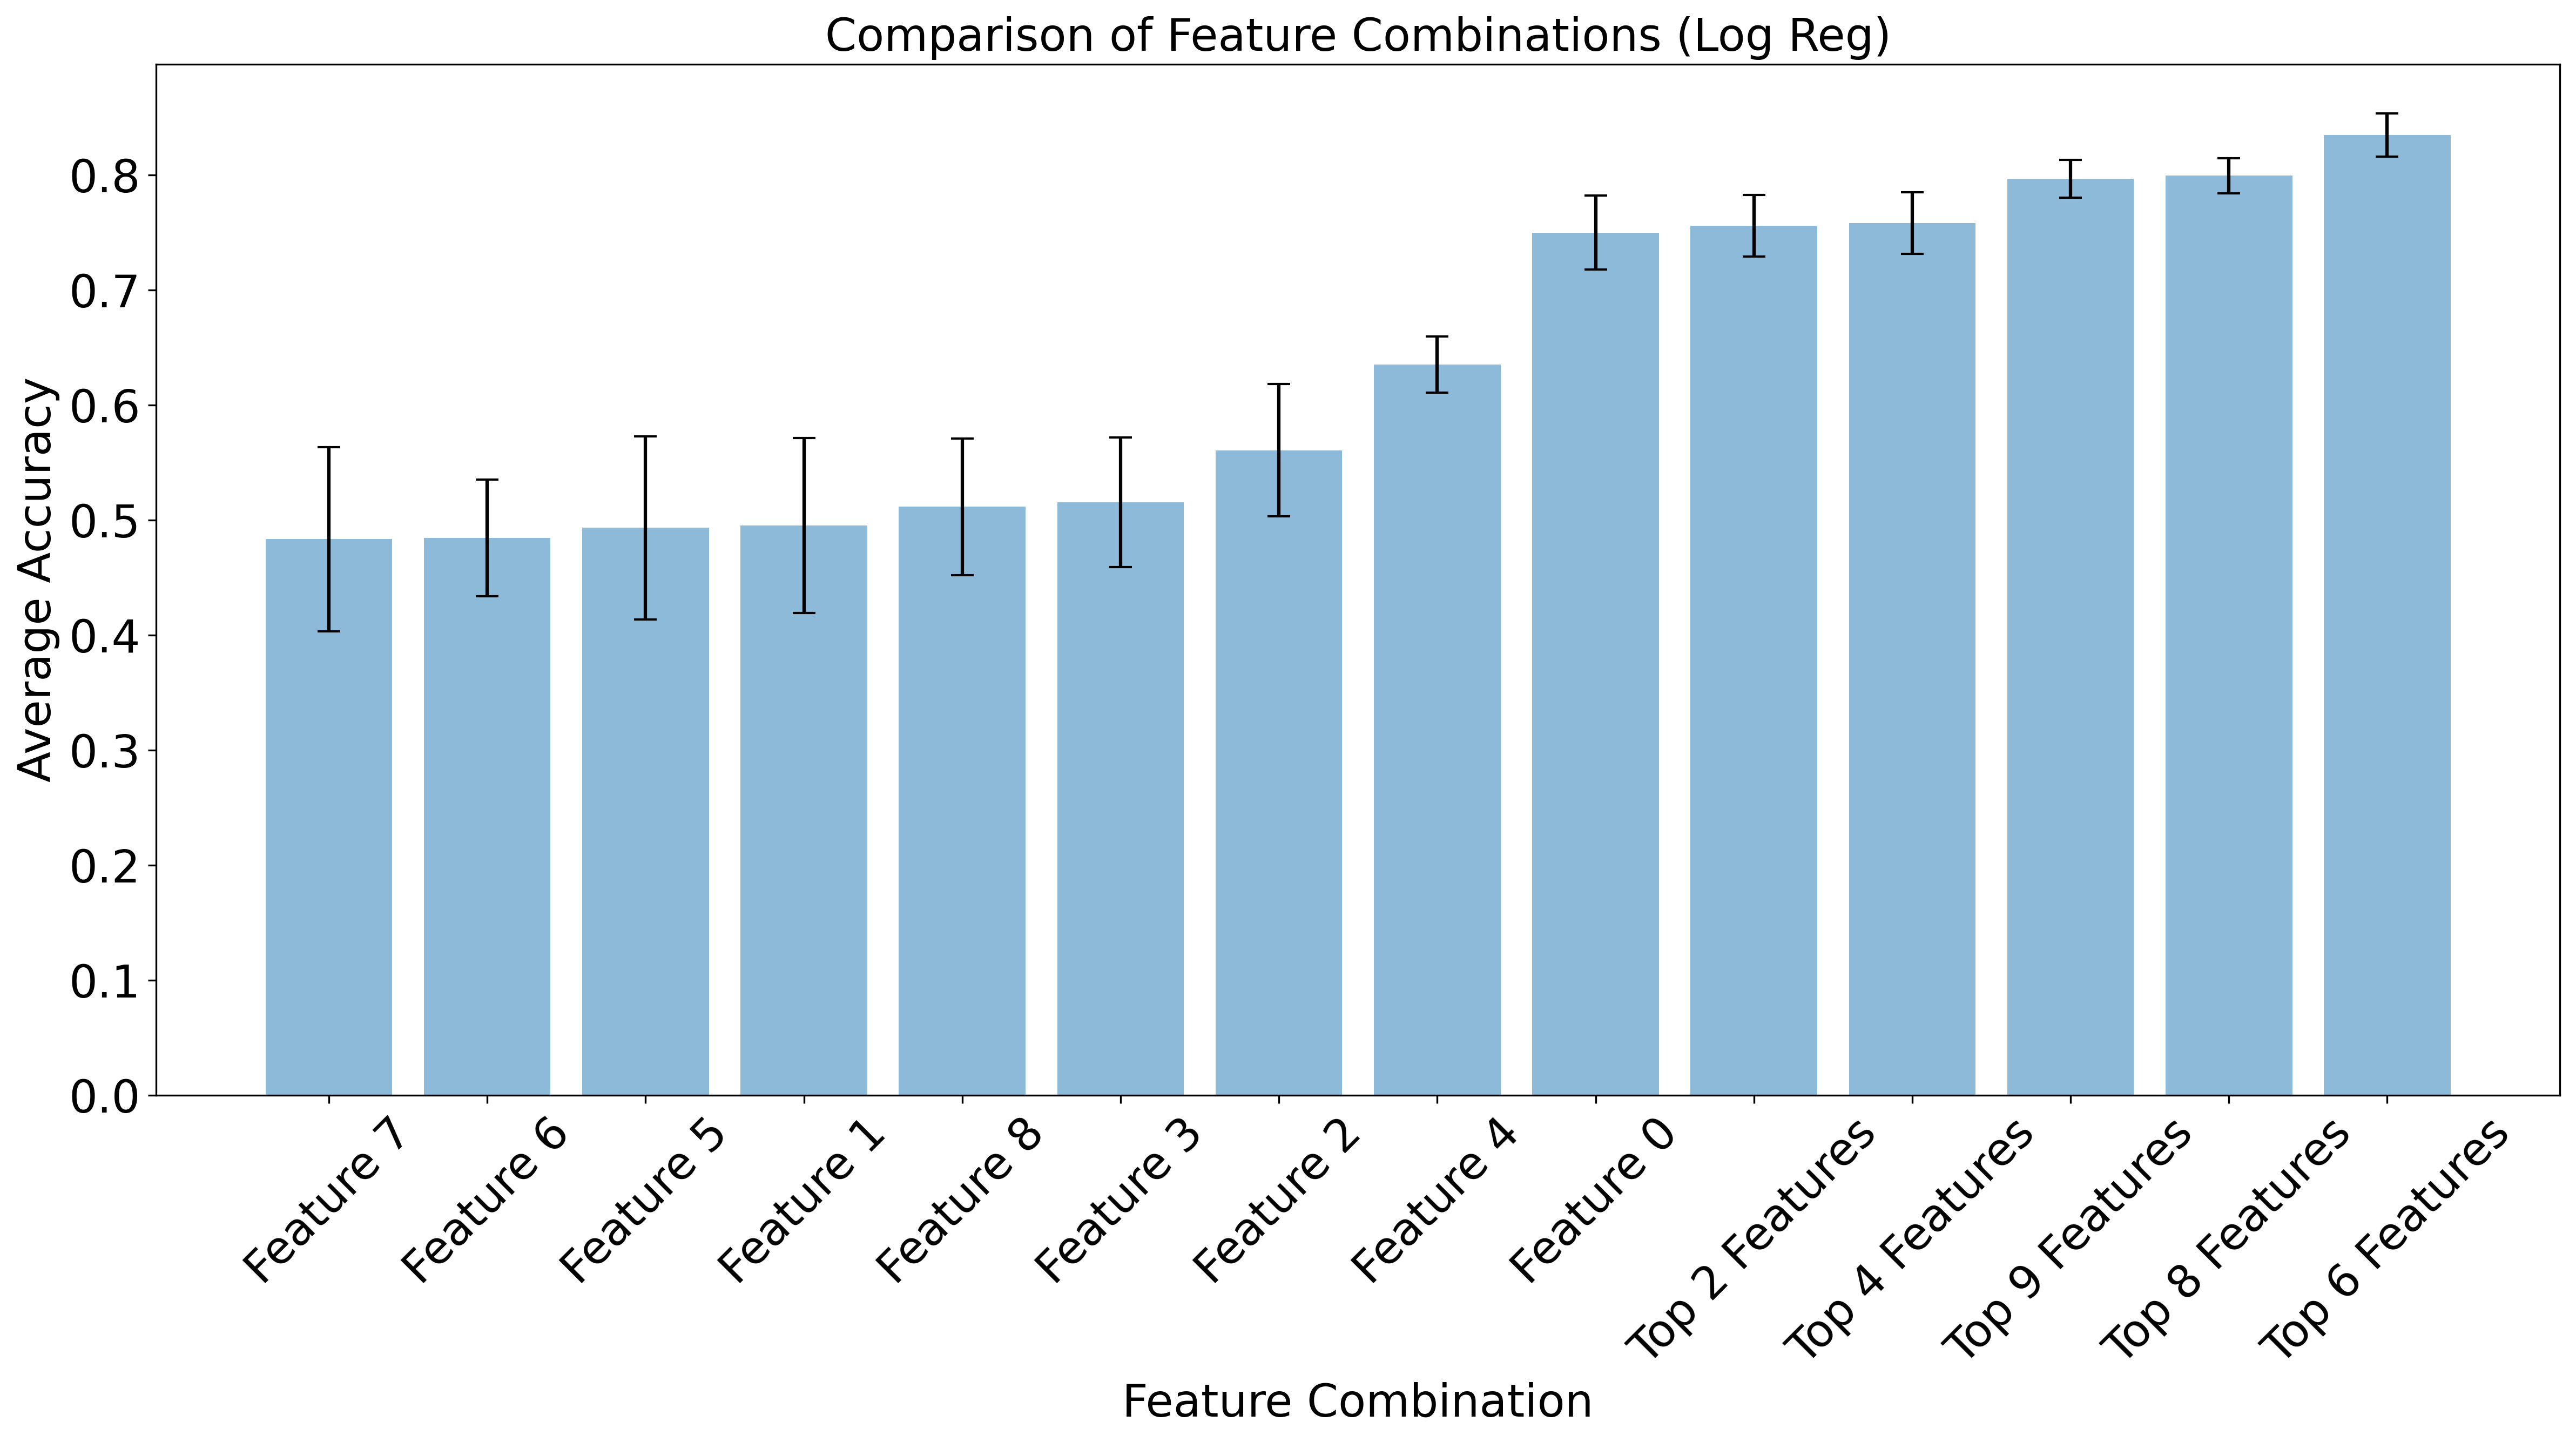

In [691]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
x_pos = np.arange(len(mean_values))
plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Feature Combination',fontsize=20)
plt.ylabel('Average Accuracy',fontsize=20)
plt.title('Comparison of Feature Combinations (Log Reg)',fontsize=20)

plt.tight_layout()
plt.show()


### Model statistics 

In [314]:
test = pd.read_csv('fv_test_4.csv')
print(test.iloc[:,1:].groupby(['Model','Metric']).agg([np.mean,np.std]))


                                 Score          
                                  mean       std
Model            Metric                         
AdaBoost         AUC          0.842374  0.122577
                 Accuracy     0.853776  0.109686
                 F1_score     0.881693  0.092368
                 Precision    0.887370  0.112273
                 Recall       0.894374  0.129626
                 Sensitivity  0.894374  0.129626
                 Specificity  0.790373  0.229588
CatBoost         AUC          0.864019  0.111423
                 Accuracy     0.869923  0.101348
                 F1_score     0.892341  0.085225
                 Precision    0.912076  0.098421
                 Recall       0.887534  0.120207
                 Sensitivity  0.887534  0.120207
                 Specificity  0.840504  0.197316
DT-based Bagging AUC          0.866547  0.103477
                 Accuracy     0.864099  0.100932
                 F1_score     0.883051  0.088883
                 Pre

## Combined feature 

https://docs.google.com/spreadsheets/d/1iRTqbjdoQE6DCXg2S7eUaPKnN76pP5r2lFYtdE55MMU/edit?usp=sharing 

In [505]:
one_mdls = [randlog(), randcat(),randcat(),randcat(),glf4,randcat(),randsvc(0.5),randcat(),randsvc(0.5)]
len(one_mdls)

9

In [592]:
ranked_features = ['adc', 'fat(4p2_3p9) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'methylfat(FMETD10) FAT14ratio', 'gly+myo FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'triglycerylfatcrossp(TGFRupper) FAT14ratio', 'olefinicfat(UFD54) FAT14ratio']

In [595]:
def reduced(nums,mod=randsvc()):
    # make train
    results = []
    rs = np.random.randint(1,424324)
    for feature, model in zip(ranked_features[:nums], one_mdls[:nums]):
        # Fit the model on the feature and make predictions
        X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,[feature],rs=rs)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_train)
        results.append(y_pred)
    data_dict = {}
    for i, array in enumerate(results):
        column_name = f"Feature_{i}"
        data_dict[column_name] = array
    classdf = pd.DataFrame(data_dict)

    # make linear combination model (svc)
    tot = mod
    tot.fit(classdf,y_train)

    # make test
    testresults = []
    for feature, model in zip(ranked_features[:nums], one_mdls[:nums]):
        # Fit the model on the feature and make predictions
        y_pred = model.predict(X_test)
        testresults.append(y_pred)
    data_dict = {}
    for i, array in enumerate(testresults):
        column_name = f"Feature_{i}"
        data_dict[column_name] = array
    classdf_test = pd.DataFrame(data_dict)
    
    return tot.score(classdf_test,y_test)


In [ ]:
def reduced(nums,mod=randsvc(0.5)):
    # make train
    results = []
     # make test
    testresults = []
    rs = np.random.randint(1,424324)
    for feature, model in zip(ranked_features[:nums], one_mdls[:nums]):
        # Fit the model on the feature and make predictions
        print(feature)
        print(model)
        X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,[feature],rs=rs)
        model.fit(X_train,y_train)
        results.append(model.predict(X_train))
        testresults.append(model.predict(X_test))
    data_dict = {}
    for i, array in enumerate(results):
        column_name = f"Feature_{i}"
        data_dict[column_name] = array
    classdf = pd.DataFrame(data_dict)
    reduced_data_dict = {}
    for i, array in enumerate(testresults):
        column_name = f"Feature_{i}"
        data_dict[column_name] = array
    classdf_test = pd.DataFrame(data_dict)
    # make linear combination model (svc)
    tot = mod
    tot.fit(classdf,y_train)
    return tot.score(classdf_test,y_test)


In [596]:
reduced_result = []
nl = [2,4,6,8,9]
for n in nl:
    ascore = []
    for i in range(100):
        ascore.append(reduced(n))
    reduced_result.append(ascore)
 
reduced_data_dict = {}
for i, array in enumerate(reduced_result):
    column_name = f"Top_{nl[i]}_features"
    reduced_data_dict[column_name] = array
reduced_result_Df = pd.DataFrame(reduced_data_dict)


adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio


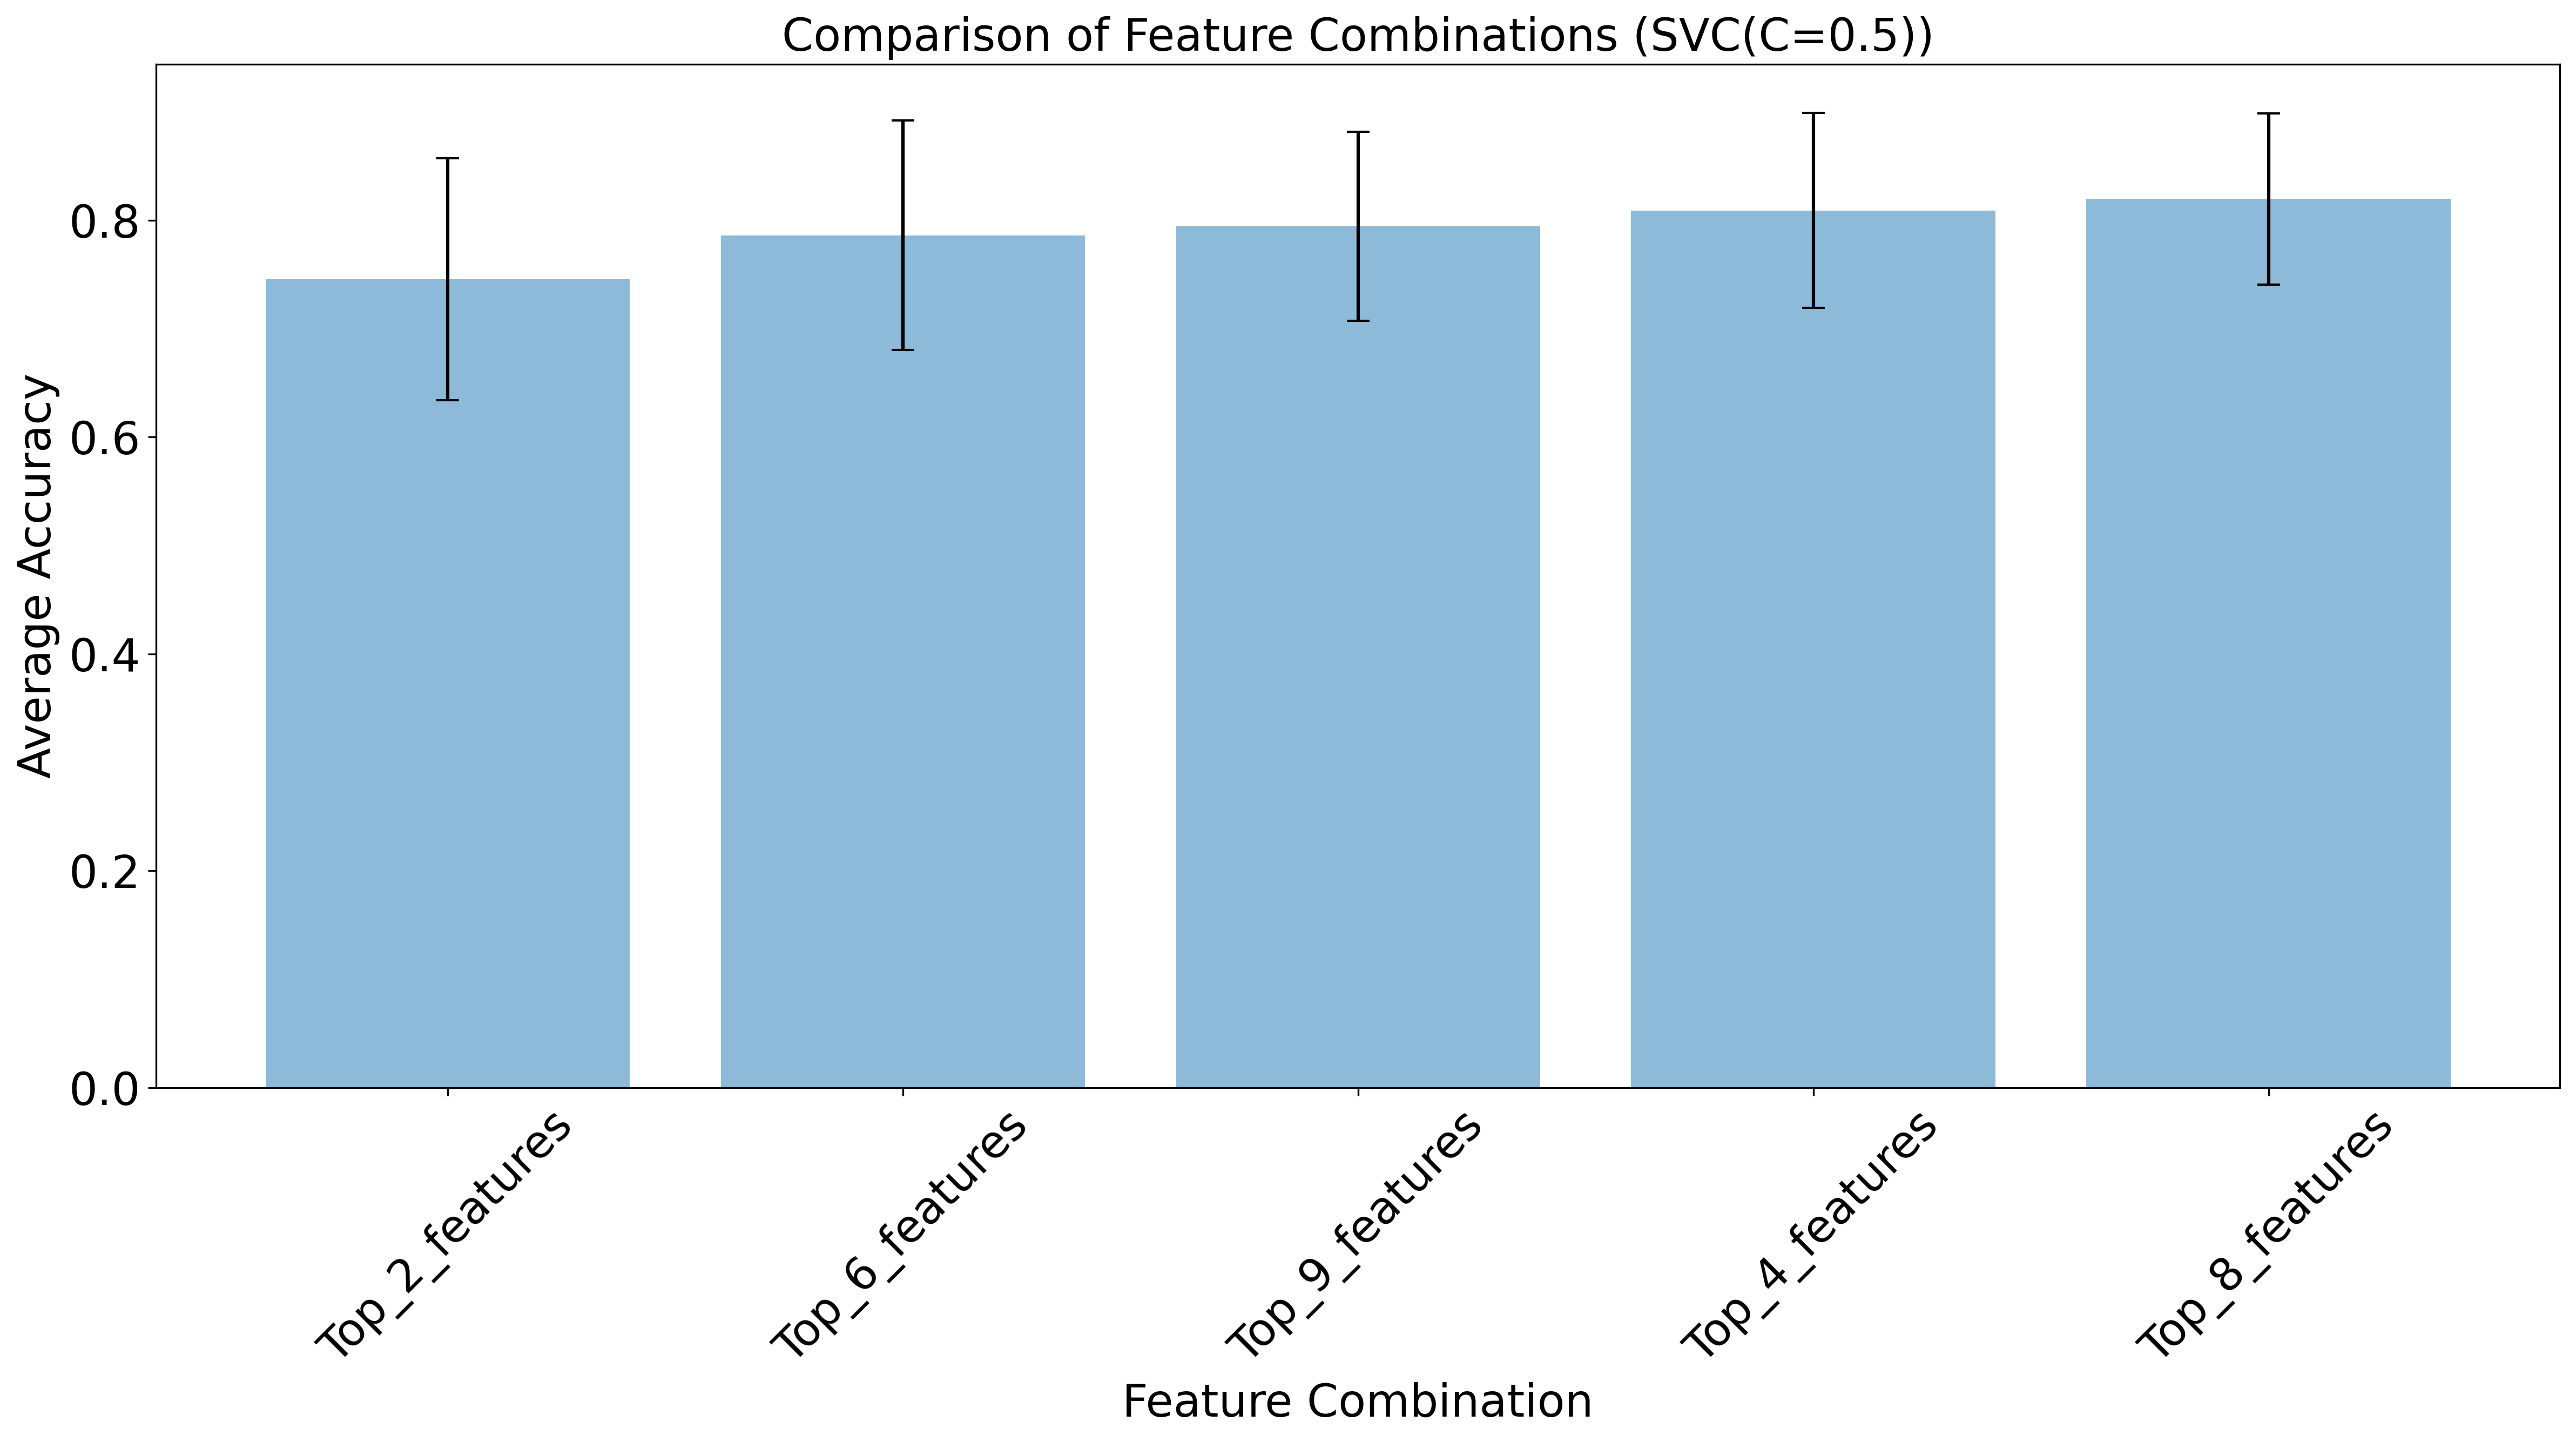

In [598]:
df = reduced_result_Df
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
x_pos = np.arange(len(mean_values))
plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Feature Combination',fontsize=20)
plt.ylabel('Average Accuracy',fontsize=20)
plt.title('Comparison of Feature Combinations (SVC(C=0.5))',fontsize=20)

plt.tight_layout()
plt.show()


In [599]:
reduced_result = []
nl = [2,4,6,8,9]
for n in nl:
    ascore = []
    for i in range(100):
        ascore.append(reduced(n,randlog()))
    reduced_result.append(ascore)
 
reduced_data_dict = {}
for i, array in enumerate(reduced_result):
    column_name = f"Top_{nl[i]}_features"
    reduced_data_dict[column_name] = array
reduced_result_Df = pd.DataFrame(reduced_data_dict)
df = reduced_result_Df
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()


adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio
adc
LogisticRegression(random_state=RandomState(MT19937) at 0x7FBDF129C440)
fat(4p2_3p9) FAT14ratio


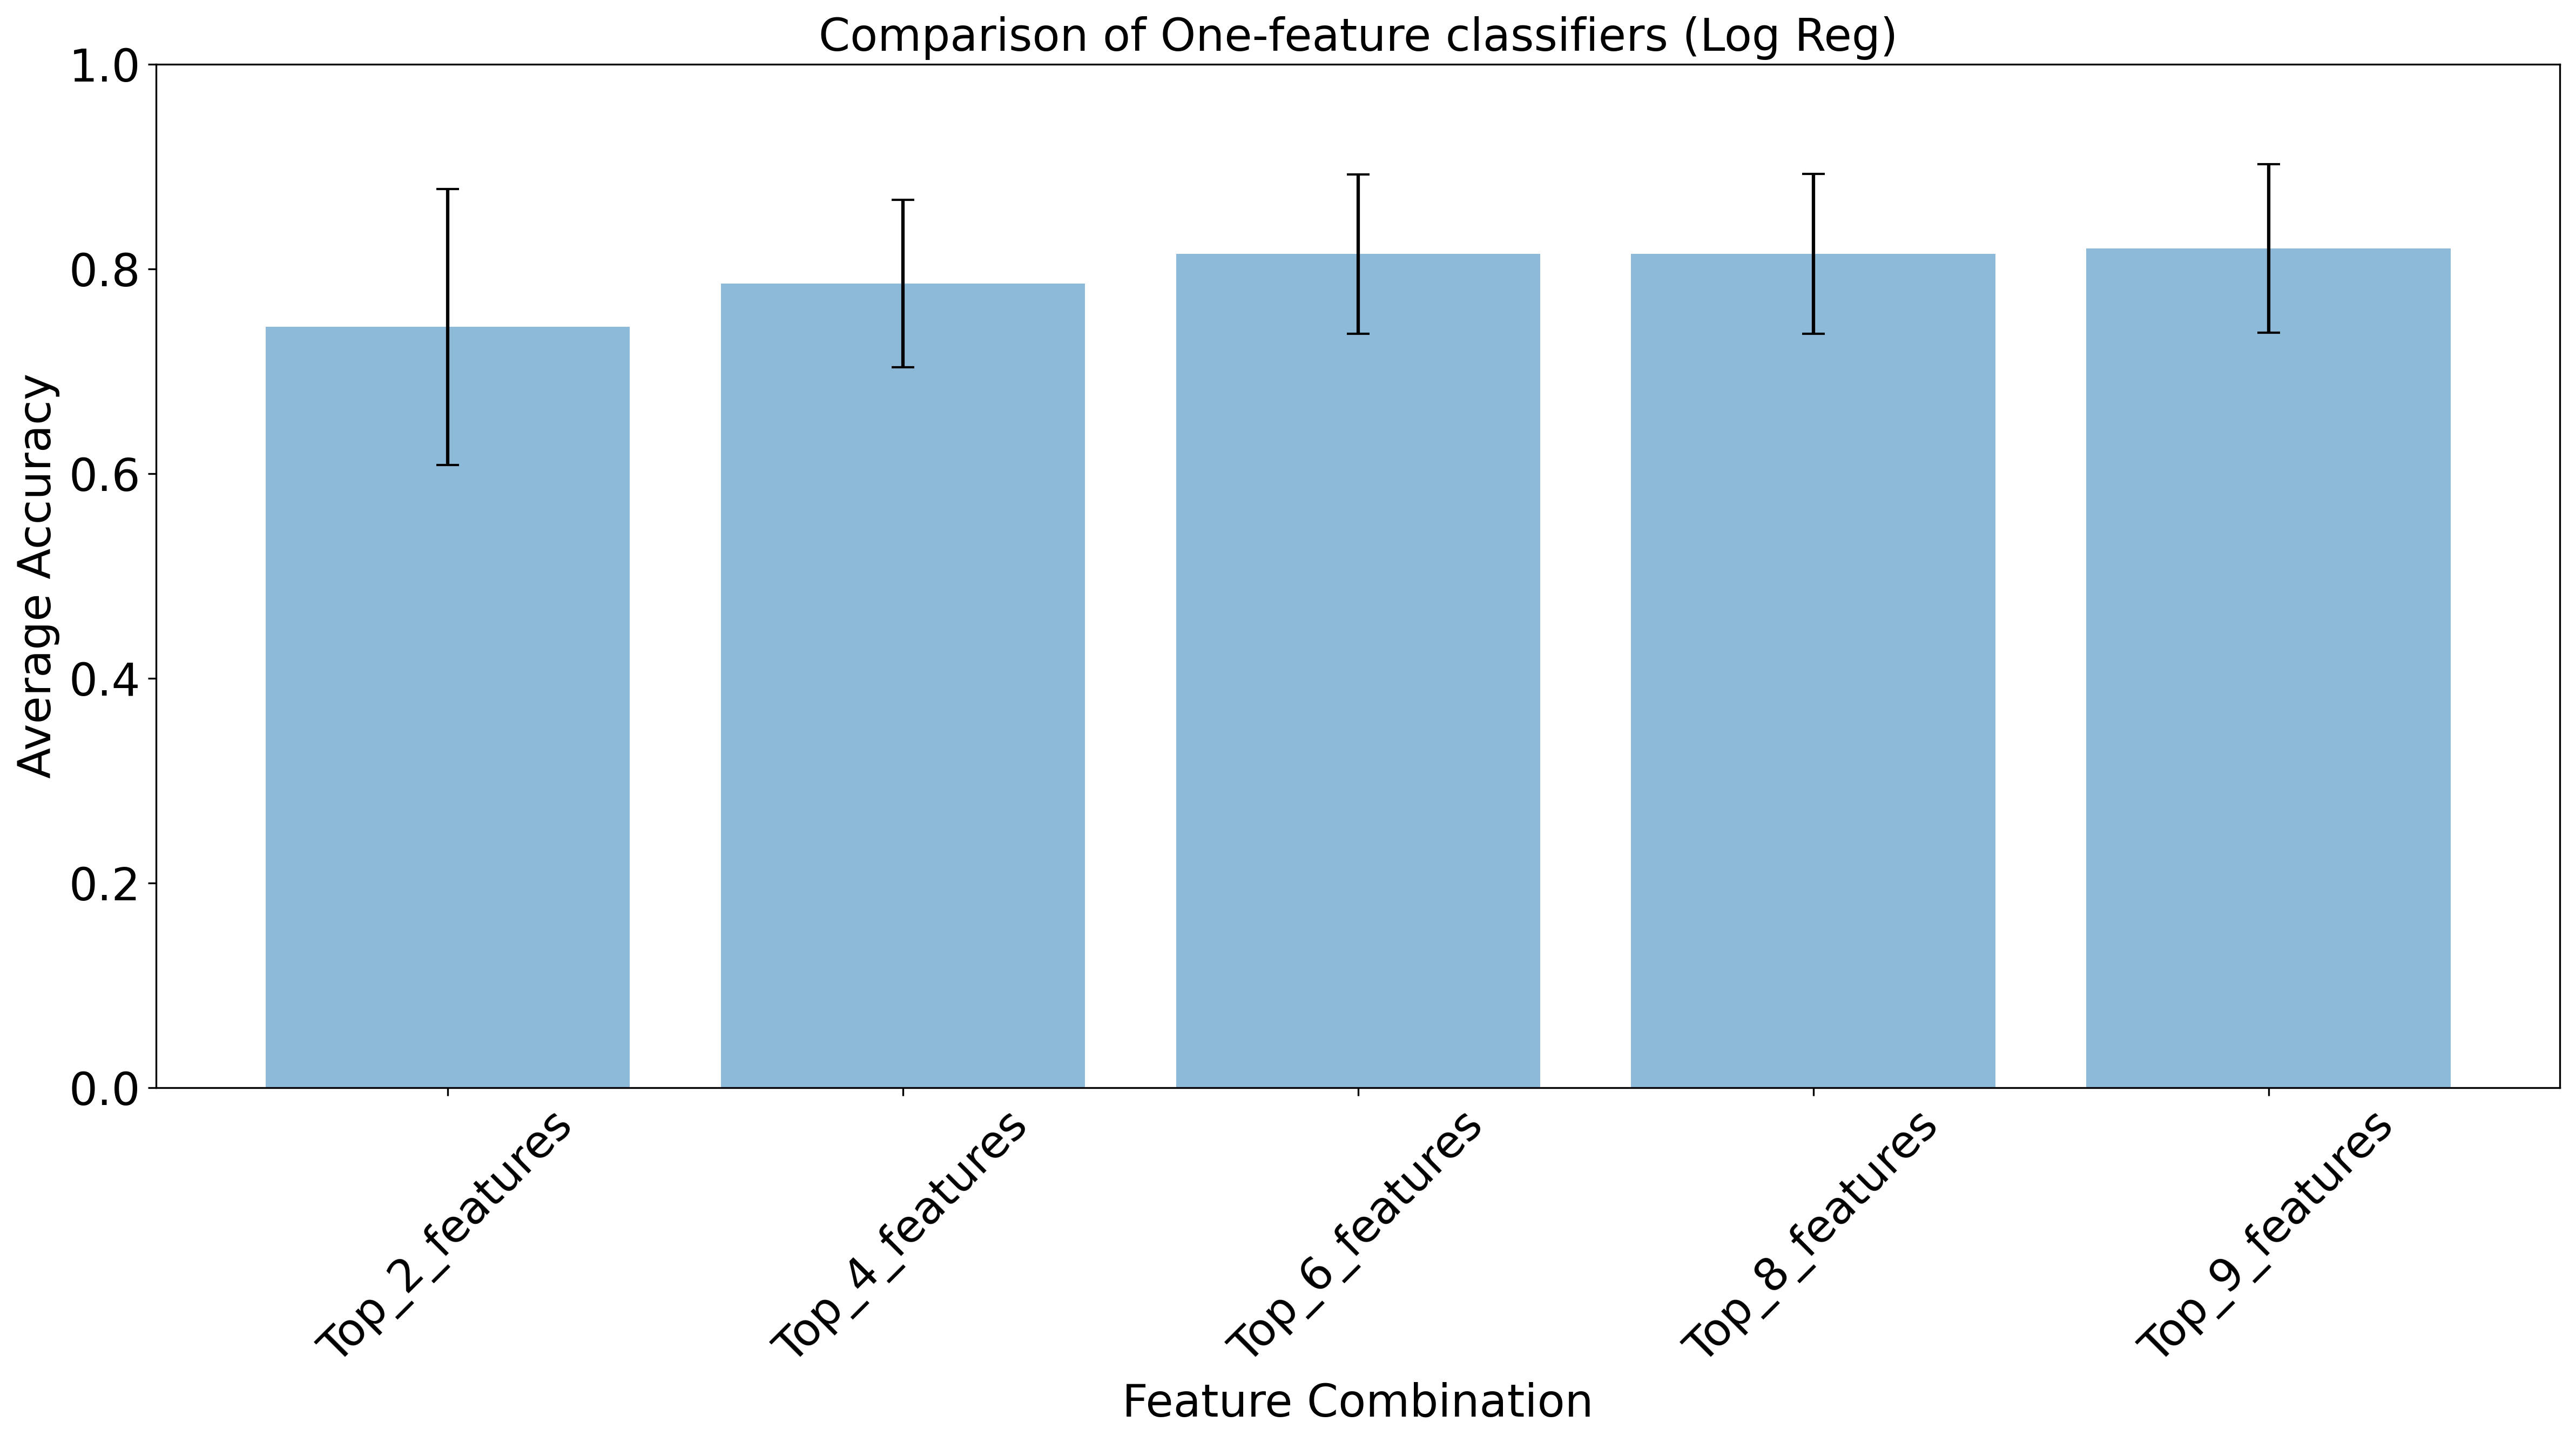

In [600]:

# Plot the histogram with error bars
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
x_pos = np.arange(len(mean_values))
plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,1.0)
plt.xlabel('Feature Combination',fontsize=20)
plt.ylabel('Average Accuracy',fontsize=20)
plt.title('Comparison of One-feature classifiers (Log Reg)',fontsize=20)

plt.tight_layout()
plt.show()


## Reduced stacking classifiers 

In [488]:
from sklearn.ensemble import StackingClassifier

In [491]:
ests = [('glf', glf4),
        ('ada',ada4),
        ('xgb',xgb4),
        ('rf',rf4)
        ] #tuple(name,model)
stc = StackingClassifier(estimators=ests, final_estimator=randlog())


In [494]:

y = LabelEncoder().fit_transform(no_out.label)

# Initialize the DataFrame
df = pd.DataFrame(index=np.arange(50))

# Iterate over different feature combinations
for num_features in [2, 4,6, 8,len(intervars)]:
    # Select the top features based on correlation rank
    selected_features = ranked_features[:num_features]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(50):
        model = stc
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features], y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
        # Add accuracies to the DataFrame
    df[f"Top {num_features} Features"] = accuracies

for idx in range(len(intervars)):
    # Select the top features based on correlation rank
    selected_features = ranked_features[idx]

    # Calculate accuracies for each iteration
    accuracies = []
    for _ in range(50):
        # Train the model and calculate accuracy
        accuracy = np.mean(cross_val_score(model,no_out[selected_features].values.reshape(-1, 1), y,cv=StratifiedGroupKFold(5),verbose=0,groups=list(no_out.dataset.values)))
        accuracies.append(accuracy)
    df[f"Feature {idx}"] = accuracies

# Display the DataFrame
print(df)

df.to_csv('reducedlogstc.csv')

KeyboardInterrupt: 

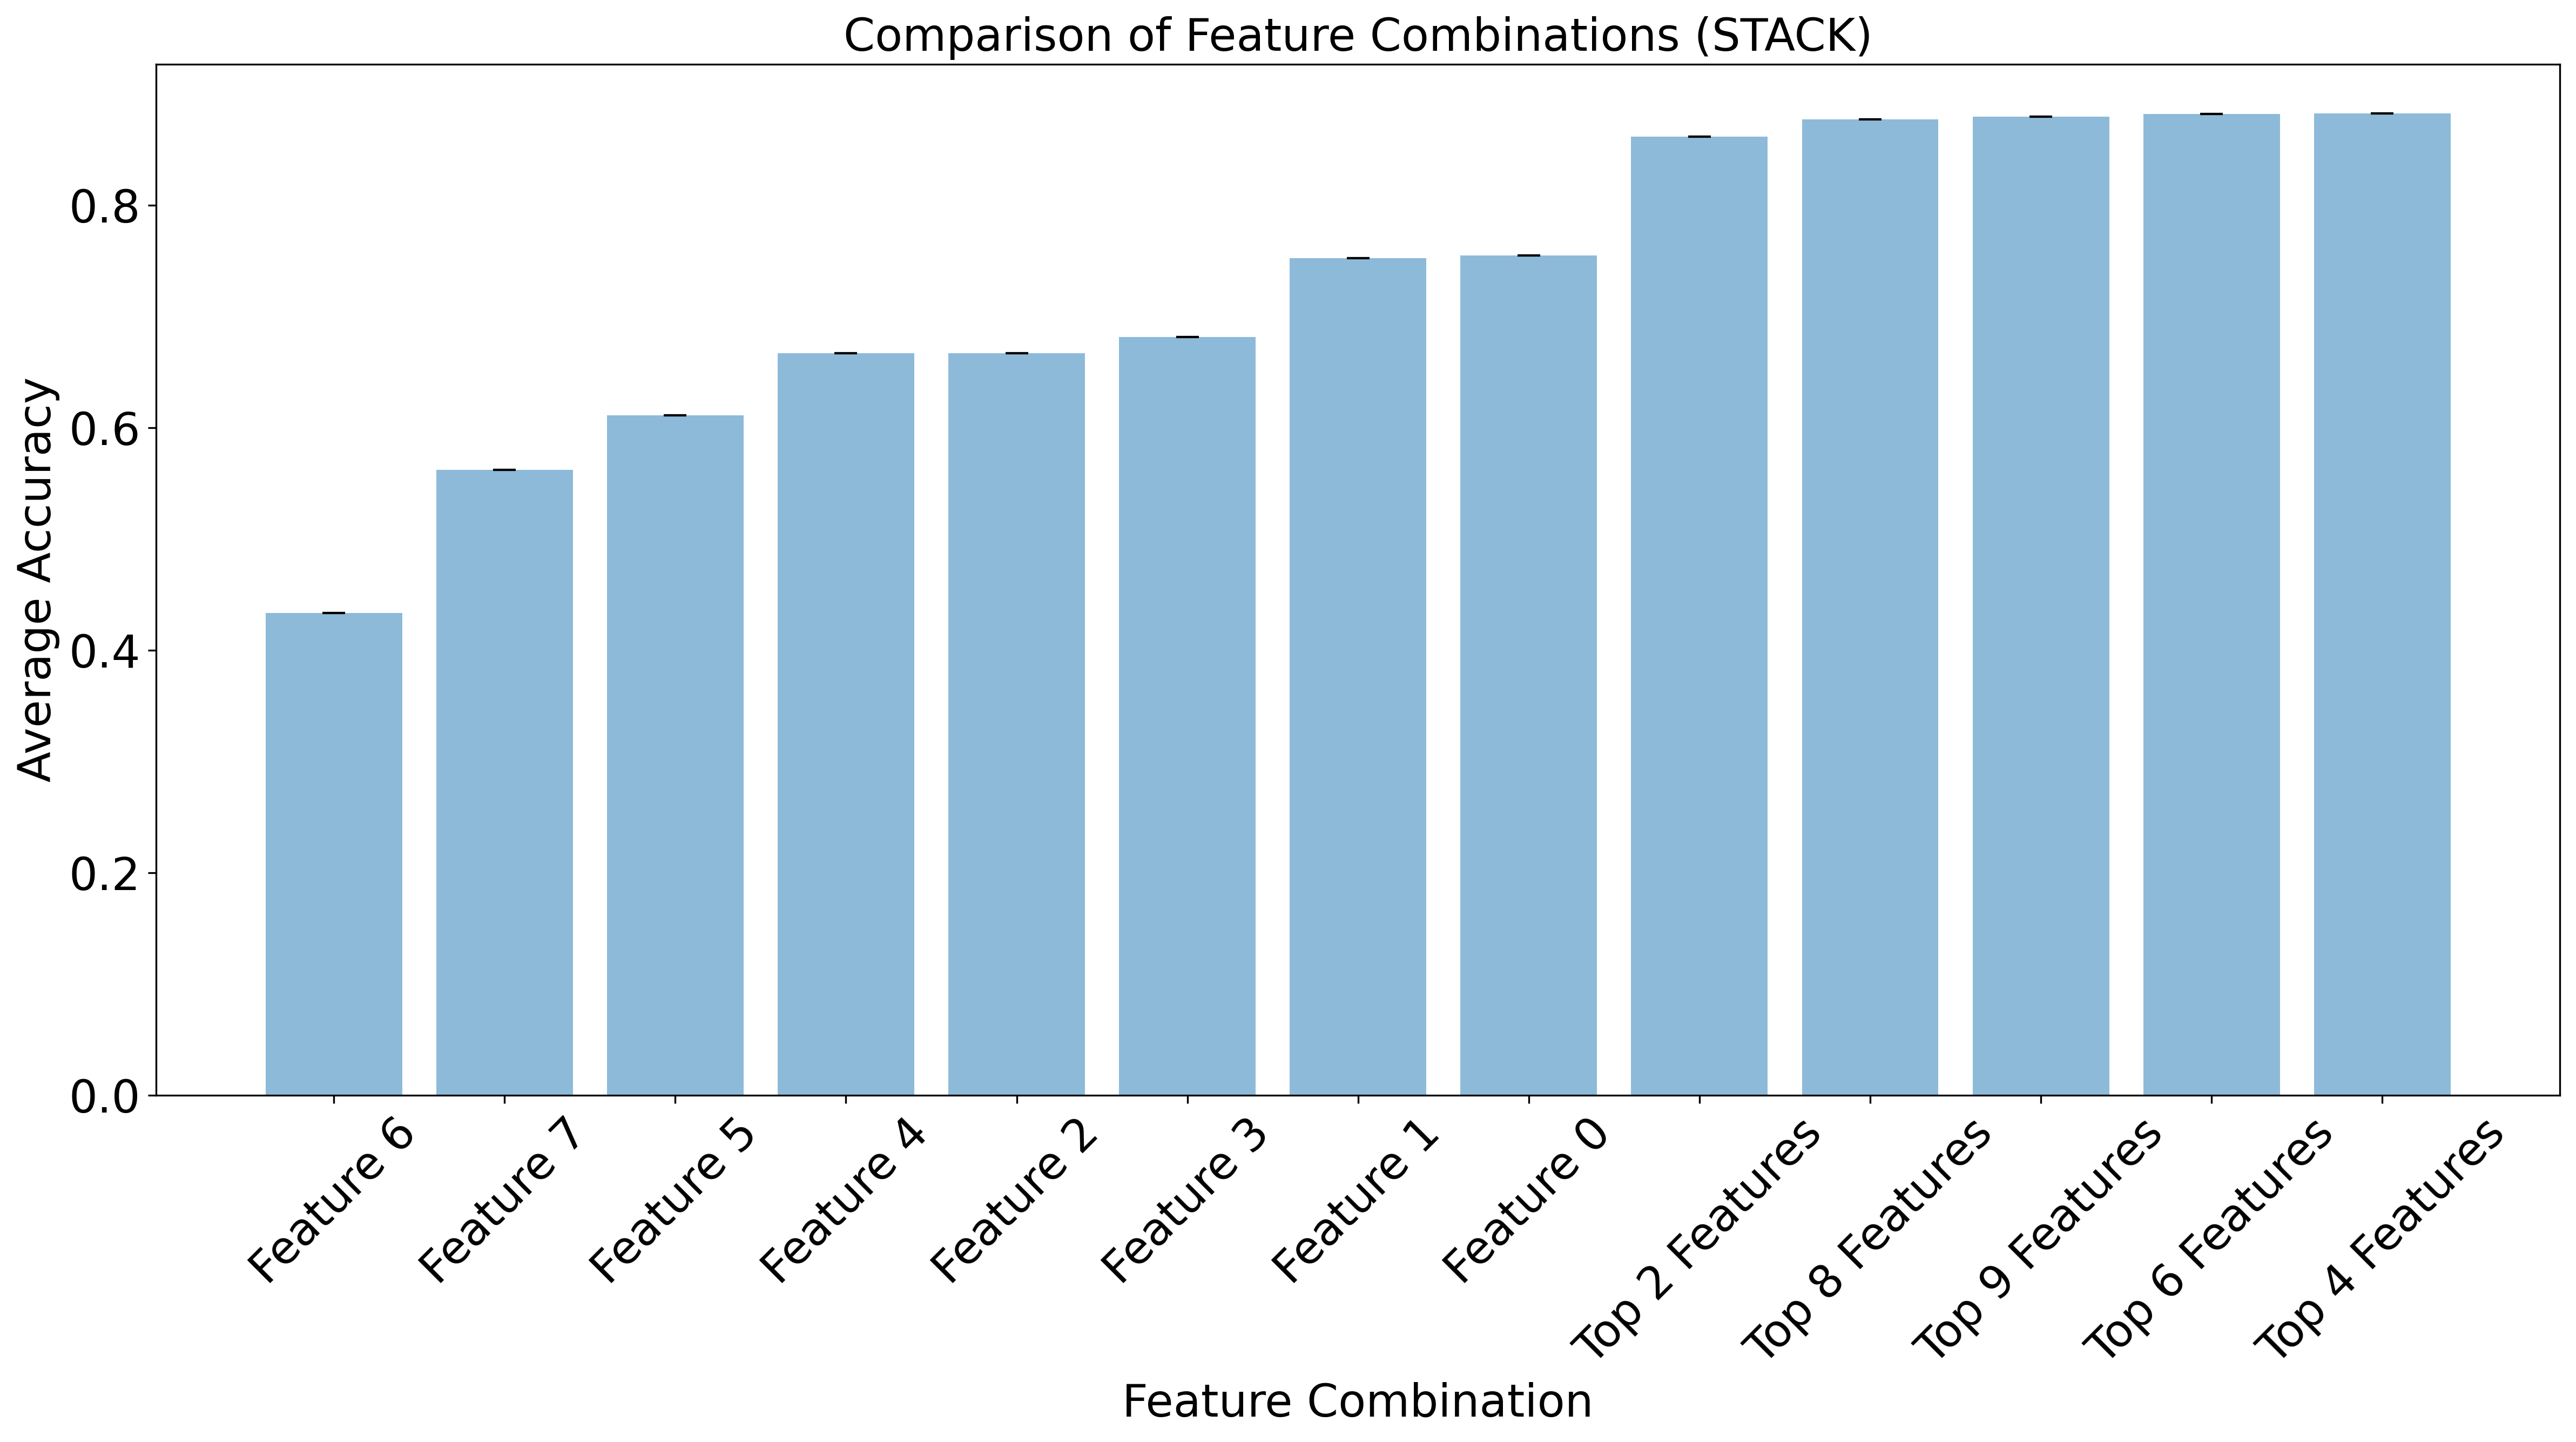

In [495]:
sorted_df =  df[df.mean().sort_values().index]
# Calculate the mean and standard deviation of each feature combination
mean_values = sorted_df.mean()
std_values = sorted_df.std()

# Plot the histogram with error bars
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
x_pos = np.arange(len(mean_values))
plt.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, capsize=5)
plt.xticks(x_pos, mean_values.index, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Feature Combination',fontsize=20)
plt.ylabel('Average Accuracy',fontsize=20)
plt.title('Comparison of Feature Combinations (STACK)',fontsize=20)

plt.tight_layout()
plt.show()


In [497]:
df.to_csv('stackreduced.csv')

In [315]:
cv = pd.read_csv('fv_cv_4.csv')
cv.iloc[:,1:].groupby(['Model','Metric']).agg([np.mean,np.std]).to_clipboard()


In [692]:
cv.Model.unique()
orders = []

array(['Linear SVM', 'DT-based Bagging', 'RandomForest', 'AdaBoost',
       'GradientBoost', 'XGBoost', 'CatBoost'], dtype=object)

In [268]:
cv = pd.read_csv('fv_cv_1.csv')

print(cv.iloc[:,1:].groupby(['Model','Metric']).agg([np.mean,np.std]))


                                 Score          
                                  mean       std
Model            Metric                         
AdaBoost         AUC          0.934531  0.087537
                 Accuracy     0.875276  0.123613
                 F1_score     0.889481  0.114792
                 Precision    0.879793  0.148333
                 Recall       0.908075  0.104801
                 Sensitivity  0.908075  0.104801
                 Specificity  0.838434  0.203860
CatBoost         AUC          0.939596  0.103245
                 Accuracy     0.863211  0.118776
                 F1_score     0.875388  0.109588
                 Precision    0.879541  0.152803
                 Recall       0.883002  0.104484
                 Sensitivity  0.883002  0.104484
                 Specificity  0.839667  0.199002
DT-based Bagging AUC          0.887746  0.147301
                 Accuracy     0.772575  0.129575
                 F1_score     0.793908  0.112643
                 Pre

In [269]:
cv = pd.read_csv('fv_cv_2.csv')

print(cv.iloc[:,1:].groupby(['Model','Metric']).agg([np.mean,np.std]))


                                 Score          
                                  mean       std
Model            Metric                         
AdaBoost         AUC          0.947751  0.079120
                 Accuracy     0.892687  0.117018
                 F1_score     0.901925  0.110958
                 Precision    0.889169  0.134941
                 Recall       0.919522  0.099803
                 Sensitivity  0.919522  0.099803
                 Specificity  0.861636  0.164631
CatBoost         AUC          0.935751  0.117231
                 Accuracy     0.860051  0.120662
                 F1_score     0.871956  0.111630
                 Precision    0.880120  0.154463
                 Recall       0.875564  0.107081
                 Sensitivity  0.875564  0.107081
                 Specificity  0.842667  0.196721
DT-based Bagging AUC          0.929437  0.119590
                 Accuracy     0.837849  0.111476
                 F1_score     0.848979  0.109850
                 Pre

### (SKIP) Ablation repetitions

In [285]:
ori_var = ['methylenefat(FAT21) ratioFAT54_1d',
 'methylfat(FMETD10) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'methylenefat(FAT23) FAT14ratio',
 'triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'fat(2p06_1p32) FAT14ratio',
 'fat(4p2_3p9) FAT14ratio']

In [284]:
var_test = [['adc'],['nws_ffrac','nws_wfrac','nws_wfratio'],['tcholine(CHO32) FAT14ratio', 'gly+myo FAT14ratio']]

In [69]:
from itertools import combinations
@ignore_warnings(category = ConvergenceWarning)
def find_feature(data, model, ori, var_test,rs=42):
    '''
    Finds the best feature combo with the additional var_test list of variables
    with the given model
    and the ori list of original variable
    n_combo: number of variables selected from the var_test list each time
    '''
    
     #Get all combinations of 
    fl = []
    for i in range(len(var_test)):
        comb = combinations(var_test,i+1)
        fl = fl + [list(o) for o in comb]
    for i in range(len(fl)):
        fl[i] = [val for sublist in fl[i] for val in sublist]

 
    # Print the obtained combinations
    mdl = model
    X_train,X_test,y_train,y_test,g_train,g_test = biutils.tts(data,ori,rs = rs)
    mdl.fit(X_train,y_train)
    ori_score = mdl.score(X_test,y_test)
    ori_auc = roc_auc_score(y_test,mdl.predict_proba(X_test)[:, 1])
    scl = []
    aucl = []
    best_combo = []
    best_score = 0
    for ll in fl:
        mdl = model
        varl = ll + ori
        
        X_train,X_test,y_train,y_test,g_train,g_test = biutils.tts(data,varl,rs = rs)
        mdl.fit(X_train,y_train)
        sc = mdl.score(X_test,y_test)
        if sc > best_score:
            best_score = sc
            best_combo = ll
        scl.append(sc)
        aucl.append(f1_score(y_test,mdl.predict(X_test)))
    return fl,scl,aucl,ori_score,ori_auc

#find_feature(glf_opt,glf_var,var_test)

NameError: name 'ignore_warnings' is not defined

In [328]:
f1df = pd.DataFrame()
oris = []
oriauc = []
for i in range(100):
    rs = np.random.randint(42,414120)
    fl,scl,aucl,ori_score,ori_auc = find_feature(no_out,xgb_opt,ori_var,var_test,rs=rs)
    if i == 0:
        ndf = pd.DataFrame({'feature':fl})
        f1df = pd.DataFrame({'feature':fl})
    else:
        sdf = pd.DataFrame({i:scl})
        qsdf = pd.DataFrame({i:aucl})
        ndf = pd.concat([ndf, sdf], axis=1)
        f1df = pd.concat([f1df, qsdf], axis=1)
    oris.append(ori_score)
    oriauc.append(ori_auc)
ndf = pd.concat([ndf, pd.DataFrame({'original':oris}).T])
f1df = pd.concat([f1df, pd.DataFrame({'original':oriauc}).T])
    


In [330]:
f1df.to_csv('xgb100f1.csv')

In [331]:
f1df['mean']=f1df.mean(axis=1)
f1df['std']=f1df.std(axis=1)
f1df[['mean','std','feature']]

<ipython-input-331-c4880a76be5f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f1df['mean']=f1df.mean(axis=1)
<ipython-input-331-c4880a76be5f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f1df['std']=f1df.std(axis=1)


mean       std  \
0         0.874030  0.099556   
1         0.874352  0.078102   
2         0.859658  0.079651   
3         0.873415  0.096237   
4         0.859933  0.092567   
5         0.855668  0.083155   
6         0.856926  0.095668   
original  0.928590  0.074442   

                                                    feature  
0                                                     [adc]  
1                       [nws_ffrac, nws_wfrac, nws_wfratio]  
2          [tcholine(CHO32) FAT14ratio, gly+myo FAT14ratio]  
3                  [adc, nws_ffrac, nws_wfrac, nws_wfratio]  
4         [adc, tcholine(CHO32) FAT14ratio, gly+myo FAT1...  
5         [nws_ffrac, nws_wfrac, nws_wfratio, tcholine(C...  
6         [adc, nws_ffrac, nws_wfrac, nws_wfratio, tchol...  
original                                                NaN

### Ablation Comparison

In [280]:
xgbabl = pd.read_csv('xgb100abl.csv')
xgbabl.index = list(xgbabl['feature'][:-1]) + ['original']
xgbabl = xgbabl.iloc[:,2:]
xgbabl = xgbabl.dropna(axis=1)

In [861]:
from pingouin import ttest
original = xgbabl.loc['original',:]
dftt = pd.DataFrame()
for choice in list(xgbabl.index[:-1]):
    add = xgbabl.loc[choice,:]
    tt = ttest(original, add, paired=True).round(2)
    tt['add'] = choice
    if not dftt.empty:
        dftt = pd.concat([dftt,tt],ignore_index=True)
    else:
        dftt = tt
dftt['diffrent']  = dftt['p-val'] < 0.05
dftt[['T','p-val','CI95%', 'cohen-d', 'BF10', 'power',
       'add', 'diffrent']]

T  p-val         CI95%  cohen-d     BF10  power  \
0 -1.77   0.08  [-0.02, 0.0]     0.13    0.493   0.24   
1  1.96   0.05  [-0.0, 0.01]     0.07    0.696   0.11   
2  3.43   0.00  [0.01, 0.03]     0.23   25.113   0.62   
3 -1.39   0.17  [-0.02, 0.0]     0.10    0.282   0.16   
4  1.68   0.10  [-0.0, 0.03]     0.17    0.426   0.37   
5  4.28   0.00  [0.01, 0.04]     0.31  406.593   0.87   
6  1.45   0.15  [-0.0, 0.03]     0.13    0.304   0.24   

                                                 add  diffrent  
0                                            ['adc']     False  
1          ['nws_ffrac', 'nws_wfrac', 'nws_wfratio']     False  
2  ['tcholine(CHO32) FAT14ratio', 'gly+myo FAT14r...      True  
3   ['adc', 'nws_ffrac', 'nws_wfrac', 'nws_wfratio']     False  
4  ['adc', 'tcholine(CHO32) FAT14ratio', 'gly+myo...     False  
5  ['nws_ffrac', 'nws_wfrac', 'nws_wfratio', 'tch...      True  
6  ['adc', 'nws_ffrac', 'nws_wfrac', 'nws_wfratio...     False

## ROC Curves

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
for m in range(len(mdls)):
        tprs = []
        base_fpr = np.linspace(0, 1, 101)
        for i in range(100):
                mdl = mdls[m]
                rs = np.random.randint(42,414120)
                X_train,X_test,y_train,y_test,g_train,g_test = biutils.tts(no_out,evars,rs=rs)
                mdl.fit(X_train,y_train)
                y_score = mdl.predict_proba(X_test)
                fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
                
                tpr = np.interp(base_fpr, fpr, tpr)
                tpr[0] = 0.0
                tprs.append(tpr)

        tprs = np.array(tprs)
        mean_tprs = tprs.mean(axis=0)
        std = tprs.std(axis=0)/np.sqrt(len(no_out))
        tprs_upper = np.minimum(mean_tprs + std, 1)
        tprs_lower = mean_tprs - std
        plt.plot(base_fpr, mean_tprs, colors[m],label=names[m])
        plt.fill_between(base_fpr, tprs_lower, tprs_upper, color = colors[m], alpha=0.3)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.legend()

plt.title("Receiver Operating Characteristic Curve",fontsize=25)
plt.show()


## Classification accuracy

In [316]:
X.shape

(436, 9)

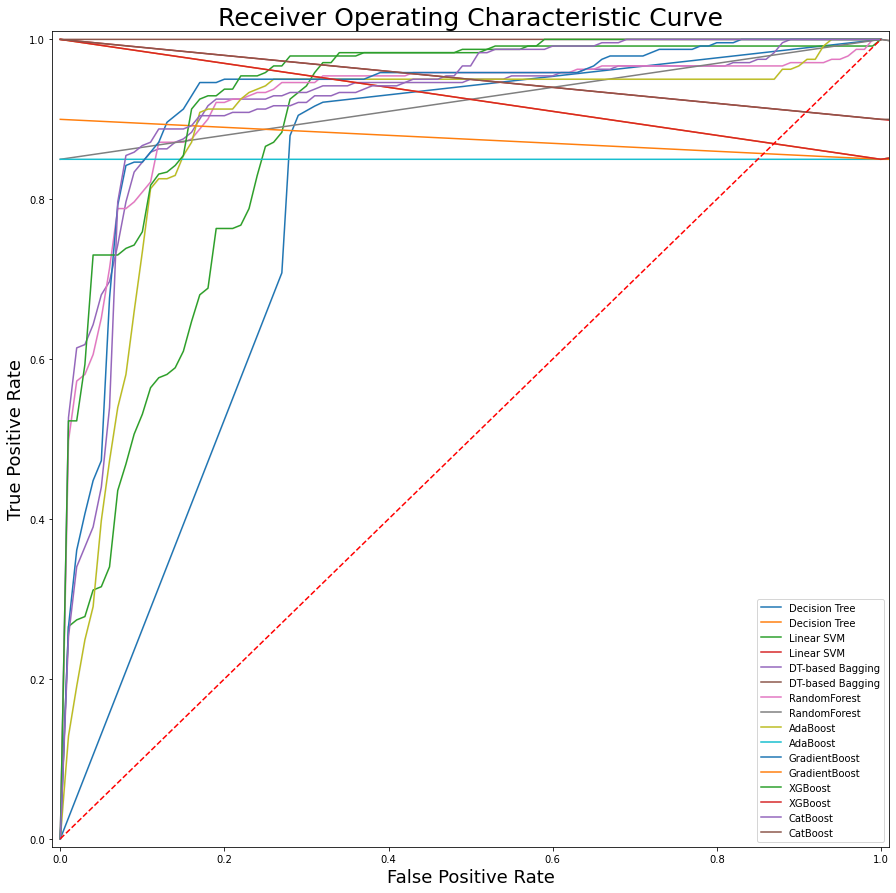

In [320]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 15))
cvp = StratifiedGroupKFold(5)
# Iterate over the models
for m in range(len(mdls)):
        tprs = []
        base_fpr = np.linspace(0, 1, 101)
        for i in range(100):
                mdl = mdls[m]
                 # Perform cross-validation and obtain the predicted probabilities
                y_pred = cross_val_predict(mdl, X, y, cv=cvp.split(X,y,list(no_out.dataset)), method='predict_proba')
                # Compute the false positive rate, true positive rate, and thresholds
                fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
                tpr = np.interp(base_fpr, fpr, tpr)
                tpr[0] = 0.0
                tprs.append(tpr)
        tprs = np.array(tprs)
        mean_tprs = tprs.mean(axis=0)
        std = tprs.std(axis=0)/np.sqrt(len(no_out))
        tprs_upper = np.minimum(mean_tprs + std, 1)
        tprs_lower = mean_tprs - std
        plt.plot(base_fpr, mean_tprs, colors[m],label=names[m])
        plt.fill_between(base_fpr, tprs_lower, tprs_upper, color = colors[m], alpha=0.3)
   
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.legend()

plt.title("Receiver Operating Characteristic Curve",fontsize=25)
plt.show()


In [420]:
#This code is just run to get train and test set index
X = renamed.loc[:,evarsname].to_numpy()
y = LabelEncoder().fit_transform(renamed.label)
groups = no_out.dataset.to_numpy()

gss = GroupShuffleSplit(n_splits=2, train_size=.8,random_state = 42)
gss.get_n_splits()
for i, (train_index, test_index) in enumerate(gss.split(X, y, groups)):
    train = renamed.iloc[train_index,:]
    test = renamed.iloc[test_index,:]
    #doing the pipeline with vars from the mwu tests

X_train = train.loc[:,evarsname]
X_test = test.loc[:,evarsname]
y_train = y[train_index]
y_test = y[test_index]
g_train = list(no_out.dataset.iloc[train_index])
g_test = list(no_out.dataset.iloc[test_index])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [337]:
from sklearn.metrics import classification_report
from sklearn import metrics 

In [422]:
svc_opt = SVC(kernel="linear", C = 1,random_state = 42,probability=True)
bt_opt = BaggingClassifier(DecisionTreeClassifier(max_depth=5),
                  bootstrap_features=True, max_samples=0.6, n_estimators=5,random_state = 42)
rf_opt = RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=10, random_state = 42)
ada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_features=0.6),
                   learning_rate=0.01, n_estimators=10, random_state = 42)
glf_opt = GradientBoostingClassifier(n_estimators=100, random_state = 42,warm_start=False, min_samples_leaf=0.1,
                           min_samples_split=1.0)
xgb_opt = xgb.XGBClassifier(objective="binary:logistic",booster='gbtree', learning_rate=1,  max_depth=5,
              min_child_weight=2, 
              n_estimators=100,  random_state = 42)
cat_opt = CatBoostClassifier(**{'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},verbose=0,random_state = 42)

In [371]:
rfc = rf_opt
rfc.fit(X_train,y_train)

rfpred = rfc.predict(X_test)
print(classification_report(y_test, rfpred))
print(metrics.accuracy_score(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        46
           1       0.76      0.88      0.82        43

    accuracy                           0.81        89
   macro avg       0.82      0.81      0.81        89
weighted avg       0.82      0.81      0.81        89

0.8089887640449438


In [372]:
xfc = xgb_opt
xfc.fit(X_train,y_train)

xpred = xfc.predict(X_test)
print(classification_report(y_test, xpred))
print(metrics.accuracy_score(y_test, xpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        43

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0


In [373]:
cat = cat_opt
cat.fit(X_train,y_train)

cpred = cat.predict(X_test)
print(classification_report(y_test, cpred))
print(metrics.accuracy_score(y_test, cpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        43

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0


In [374]:
gbc = glf_opt
gbc.fit(X_train,y_train)

gpred = gbc.predict(X_test)
print(classification_report(y_test, gpred))
print(metrics.accuracy_score(y_test, gpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        43

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0


## Overfitting check

In [375]:
model = xgb_opt
model_name = "XGBoost"
ppl = Pipeline([('scaler', StandardScaler()),
                      ('mdl',model)])


Text(0.5, 1.0, 'Learning curve for XGBoost')

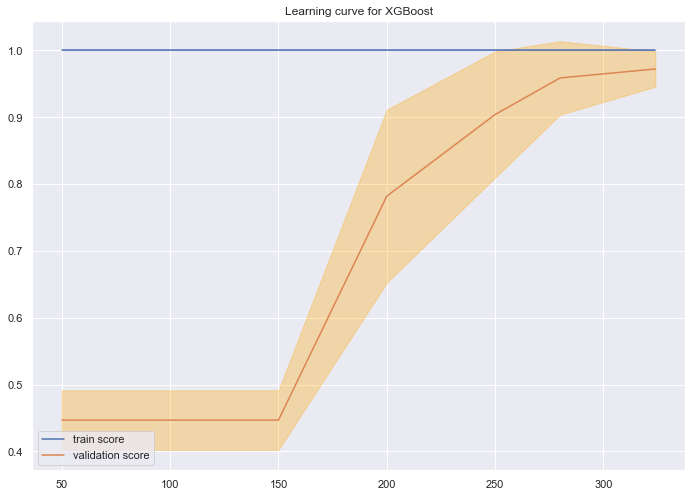

In [376]:
train_sizes, train_scores, valid_scores = learning_curve(ppl, X, y, groups = list(no_out.dataset),train_sizes=[50,100,150,200,250,280,324], cv=StratifiedGroupKFold(5))
plt.plot(train_sizes,[np.mean(i) for i in train_scores],label="train score")
plt.plot(train_sizes,[np.mean(i) for i in valid_scores],label="validation score")
plt.legend()
ax = plt.gca()
ax.fill_between(
        train_sizes,
        valid_scores.mean(axis=1) - valid_scores.std(axis=1),
        valid_scores.mean(axis=1) + valid_scores.std(axis=1),
        alpha=0.3,
        color = 'orange'
    )
ax.fill_between(
        train_sizes,
        train_scores.mean(axis=1) - train_scores.std(axis=1),
        train_scores.mean(axis=1) + train_scores.std(axis=1),
        alpha = 0.3,
        color = 'blue'
    )
plt.title("Learning curve for "+model_name)

## Feature Importance

In [434]:
model = xgb_opt
model_name = "XGBoost"


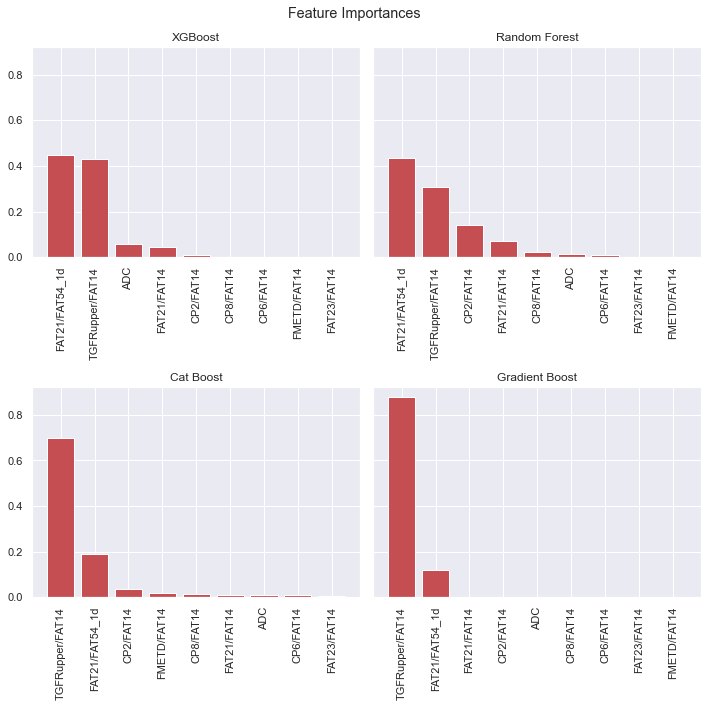

In [440]:
fig,ax = plt.subplots(2,2,sharey=True,figsize=(10,10))
names = ['XGBoost','Random Forest','Cat Boost','Gradient Boost']
ct = 0
for mdl in [xgb_opt,rf_opt,cat_opt,glf_opt]:
    r,c = divmod(ct,2)
    scaler = StandardScaler()
    stdX = StandardScaler().fit_transform(X)
    mdl.fit(stdX,y)
    features = evarsname
    importances = mdl.feature_importances_/sum(mdl.feature_importances_)
    #for name, importance in zip(evarsname,importances):
     # print(name, "=", importance)
    indices = np.argsort(importances)
    indices = indices[::-1]
    ax[r,c].bar(range(len(indices)), importances[indices], color='r', align='center')
    ax[r,c].set_xticks(range(len(indices)), [features[i] for i in indices],rotation=90)
    ax[r,c].set_title(names[ct])
    ct = ct+1

fig.suptitle('Feature Importances')
fig.tight_layout()
plt.show()

<Axes: title={'center': 'XGBoost Classifier Feature Importance'}>

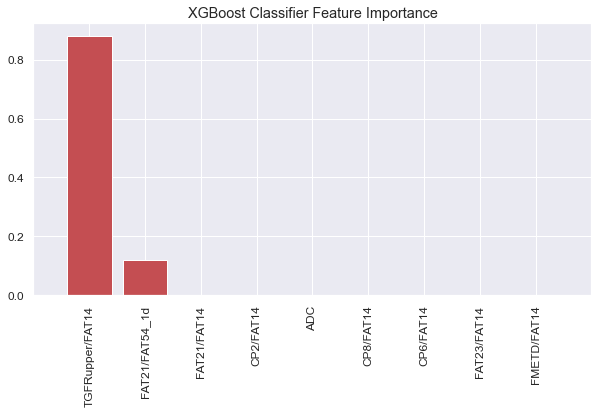

In [439]:

model.fit(X,y)
skplt.estimators.plot_feature_importances(model, feature_names=evarsname,
                                         title=model_name +" Classifier Feature Importance",
                                         x_tick_rotation=90,figsize=(10,5))


## Confusion Matrix

In [366]:
model = xgb_opt
model_name = "XGBoost"


<Axes: title={'center': 'XGBoost Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

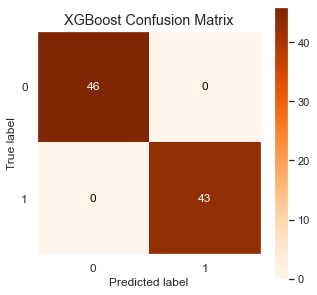

In [367]:
model.fit(X_train,y_train)
model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, model.predict(X_test),
                                    title=model_name+" Confusion Matrix",
                                    cmap="Oranges",figsize=(5,5))
                                    

## Final Stacking

In [368]:
svc_opt = SVC(kernel="linear", C = 1,random_state = None,probability=True)
bt_opt = BaggingClassifier(DecisionTreeClassifier(max_depth=5),
                  bootstrap_features=True, max_samples=0.6, n_estimators=5,random_state=np.random.RandomState())
rf_opt = RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=30, random_state=np.random.RandomState())

ada_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_features=0.6),
                   learning_rate=0.01, n_estimators=10, random_state=np.random.RandomState())
glf_opt = GradientBoostingClassifier(n_estimators=100, random_state=np.random.RandomState(),warm_start=False,max_depth=2, min_samples_leaf=0.1,
                           min_samples_split=1.0)
xgb_opt = xgb.XGBClassifier(objective="binary:logistic",booster='gbtree', learning_rate=1,  max_depth=5,
              min_child_weight=2, 
              n_estimators=100,  random_state=np.random.RandomState())
cat_opt = CatBoostClassifier(**{'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1},verbose=0)


mdls = [svc_opt,bt_opt,rf_opt,ada_opt,glf_opt,xgb_opt,cat_opt]
names = ["Linear SVM","Linear SVM-based Bagging","RandomForest","AdaBoost","GradientBoost","XGBoost","CatBoost"]
ests = [('xgb', xgb_opt),
        ('svc',svc_opt),
        ('gb',glf_opt),
        ('cat',cat_opt)] #tuple(name,model)
stc = StackingClassifier(estimators=ests, final_estimator=svc_opt)
stc.fit(X_train,y_train)
stc.score(X_test,y_test)

1.0